In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from matplotlib.ticker import FuncFormatter

In [ ]:
drive.mount('/content/drive')
path_data = '/content/drive/My Drive/MSIB/Project_Kelompok/dataset/'
os.listdir(path_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['dataset.csv',
 'dataset.gsheet',
 'dataset_kurir.csv',
 'data_feature.gsheet',
 'dataset_case5.gsheet',
 'dataset_case5.csv',
 'temp_data',
 'Data_Feature.csv']

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv(path_data + 'Data_Feature.csv', parse_dates=['Waktu Pembaruan','Sinkronisasi Terakhir', 'Waktu Pembayaran', 'Waktu Pengiriman', 'Waktu Penyelesaian'])

In [ ]:
df.tail(10)

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
3302 2024-03-05 07:13:00   2024-03-06 01:24:00  02-03-2024 09:45   
3303 2024-03-25 16:27:00   2024-03-25 16:27:00  18-03-2024 19:57   
3304 2024-04-20 20:36:00   2024-04-20 20:45:00  17-04-2024 21:59   
3305 2024-02-18 18:35:00   2024-02-24 16:09:00  15-02-2024 21:52   
3306 2024-03-14 21:05:00   2024-03-15 05:54:00  13-03-2024 11:41   
3307 2024-04-06 16:42:00   2024-04-06 16:52:00  04-04-2024 17:12   
3308 2024-03-14 20:40:00   2024-03-14 20:40:00  10-03-2024 14:08   
3309 2024-05-14 20:52:00   2024-05-14 20:56:00  12-05-2024 08:21   
3310 2024-04-06 12:38:00   2024-04-06 12:38:00  05-04-2024 05:30   
3311 2024-04-13 15:47:00   2024-04-06 08:36:00  05-04-2024 15:29   

       Jenis Pesanan    Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
3302  Pesanan Normal   Toko Ijo    Toko 3  Online Payment 2024-03-02 09:45:00   
3303  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet 2024-03-18 19:57:00   
3304  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet 2024-04-17 21:59:00   
3305  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-02-16 09:50:00   
3306  Pesanan Normal   Toko Ijo    Toko 1          Bank 6 2024-03-13 11:41:00   
3307  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet 2024-04-04 17:12:00   
3308  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-03-10 14:08:00   
3309  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-05-12 08:31:00   
3310  Pesanan Normal   Toko Ijo    Toko 1          Kredit 2024-04-05 05:31:00   
3311  Pesanan Normal  Toko Biru    Toko 2          Kredit 2024-04-05 15:29:00   

        Waktu Pengiriman  Waktu Penyelesaian  \
3302 2024-03-16 01:39:00 2024-03-21 04:20:00   
3303 2024-03-20 14:35:00 2024-03-25 16:27:00   
3304 2024-04-18 15:41:00 2024-04-20 20:36:00   
3305 2024-03-16 01:39:00 2024-02-21 16:26:00   
3306 2024-03-14 16:18:00 2024-03-14 21:05:00   
3307 2024-04-05 16:05:00 2024-04-06 16:42:00   
3308 2024-03-21 06:00:00 2024-03-14 20:40:00   
3309 2024-05-14 11:58:00 2024-05-14 20:52:00   
3310 2024-04-05 17:40:00 2024-04-06 12:38:00   
3311 2024-04-08 08:55:00 2024-04-14 04:06:00   

                                         Variant Produk  Harga Awal Produk  \
3302                                          2pcs 2pcs          2199800.0   
3303                             3pcs Pack @12patch 1pc           110600.0   
3304                               1pc Unit + Aksesoris           269800.0   
3305                                   1pc 3pcs 1pc 1pc          1284500.0   
3306                                      1pc FREE GIFT           209900.0   
3307                  Vanilla,1pc 1pc 1pc Pack @12patch            96700.0   
3308                               1pc Box @84patch 1pc           159800.0   
3309  Unit + Aksesoris Chamomile,1pc Vanilla,+Refill...           320600.0   
3310                           1pc Mix,3pcs + Pipet 1pc           220500.0   
3311  1PC 1 pcs 1PCS Vanilla/1 pcs Chamomile/1 pcs 1...           499050.0   

      Total Berat(g)   Subtotal                               Kota     Total  \
3302           850.0  1103816.0                        KOTA KEDIRI  994360.0   
3303           210.0   107558.0                      KAB. SIDOARJO   94322.0   
3304          1150.0   266780.0                 KOTA JAKARTA UTARA  230369.0   
3305          2610.0  1144049.0                         KAB. TUBAN  993348.0   
3306           750.0   209900.0                 KOTA JAKARTA UTARA  173990.0   
3307           450.0    88720.0                      KAB. SIDOARJO   68469.0   
3308           210.0   159800.0                       KAB. BANDUNG  141444.0   
3309           700.0   303736.0                     KOTA TANGERANG  251731.0   
3310           560.0   198450.0                 KOTA JAKARTA UTARA  171688.0   
3311          1100.0   570870.0  Kota Administrasi Jakarta Selatan  585670.0   

      Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  \
3302               0.0         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Waktu Pembaruan                 3312 non-null   datetime64[ns]
 1   Sinkronisasi Terakhir           3312 non-null   datetime64[ns]
 2   Tanggal Pembuatan               3312 non-null   object        
 3   Jenis Pesanan                   3312 non-null   object        
 4   Channel                         3312 non-null   object        
 5   Nama Toko                       3312 non-null   object        
 6   Pembayaran                      3312 non-null   object        
 7   Waktu Pembayaran                3312 non-null   datetime64[ns]
 8   Waktu Pengiriman                3310 non-null   datetime64[ns]
 9   Waktu Penyelesaian              3312 non-null   datetime64[ns]
 10  Variant Produk                  3312 non-null   object        
 11  Harg

In [ ]:
df.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     2
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

In [ ]:
df.describe()

Waktu Pembaruan          Sinkronisasi Terakhir  \
count                           3312                           3312   
mean   2024-04-03 17:47:03.605072384  2024-04-03 20:40:36.268115712   
min              2024-02-15 21:57:00            2024-02-15 15:08:00   
25%              2024-03-16 20:37:00            2024-03-17 03:54:00   
50%              2024-04-03 15:14:00            2024-04-03 18:25:00   
75%              2024-04-23 10:28:00            2024-04-21 20:35:00   
max              2024-05-15 13:09:00            2024-05-15 12:46:00   
std                              NaN                            NaN   

                    Waktu Pembayaran               Waktu Pengiriman  \
count                           3312                           3310   
mean   2024-03-29 17:24:08.931159296  2024-04-04 05:07:25.250755328   
min              2024-02-15 02:37:00            2024-03-14 15:53:00   
25%              2024-03-11 00:31:15            2024-03-20 14:35:00   
50%              2024-03-29 08:32:00            2024-03-30 15:27:30   
75%              2024-04-18 10:15:00            2024-04-19 15:39:00   
max              2024-05-14 11:52:00            2024-05-14 13:40:00   
std                              NaN                            NaN   

                  Waktu Penyelesaian  Harga Awal Produk  Total Berat(g)  \
count                           3312       3.312000e+03     3312.000000   
mean   2024-04-04 23:33:17.282608896       3.444204e+05      690.570350   
min              2024-02-20 15:25:00       1.490000e+03        1.000000   
25%              2024-03-20 02:16:00       9.990000e+04      250.000000   
50%              2024-04-03 15:58:00       1.570790e+05      450.000000   
75%              2024-04-23 13:22:00       2.999000e+05      850.000000   
max              2024-05-15 12:35:00       5.499999e+06    10575.000000   
std                              NaN       5.567594e+05      942.898524   

           Subtotal         Total  Biaya Pengiriman  \
count  3.312000e+03  3.312000e+03       3312.000000   
mean   2.995986e+05  2.690407e+05       4166.125302   
min    6.900000e+03 -5.180000e+04     -35000.000000   
25%    8.991000e+04  8.109900e+04          0.000000   
50%    1.656000e+05  1.414440e+05          0.000000   
75%    3.085300e+05  2.667502e+05          0.000000   
max    5.499999e+06  5.506999e+06     130800.000000   
std    4.717736e+05  4.586806e+05      11291.118279   

       Biaya Kirim Ditanggung Pembeli      Asuransi  Total Diskon  \
count                     3312.000000   3312.000000  3.312000e+03   
mean                      1986.790761    307.608696  2.001975e+04   
min                          0.000000      0.000000  0.000000e+00   
25%                          0.000000      0.000000  0.000000e+00   
50%                          0.000000      0.000000  8.000000e+03   
75%                          0.000000      0.000000  1.472850e+04   
max                     175000.000000  23200.000000  1.980000e+06   
std                       7732.291009   1463.205034  9.708864e+04   

        Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
count    3312.000000    3312.000000            3312.000000   
mean   -11705.947464   -8665.690821           -2031.444444   
min   -193135.000000  -95346.000000         -175000.000000   
25%    -14240.000000  -11768.500000               0.000000   
50%     -5526.500000   -5794.000000               0.000000   
75%     -1436.000000   -1771.500000               0.000000   
max         0.000000       0.000000               0.000000   
std     18486.404609   10260.866271            7805.711082   

       Potongan Biaya Pengiriman           Koin  Voucher Channel  \
count                3312.000000    3312.000000      3312.000000   
mean                16871.062802    2854.043176      8340.477657   
min                     0.000000       0.000000         0.000000   
25%                  9000.000000       0.000000         0.000000   
50%                 14000.000000       0.000000 

## HANDLING MISSING VALUE

### Waktu Pengiriman

In [ ]:
fill_Waktu_Pengiriman  = '14-05-2024 13:40'
df['Waktu Pengiriman'].fillna(fill_Waktu_Pengiriman, inplace =True)

In [ ]:
df.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan   Jenis Pesanan  \
0 2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29  Pesanan Normal   
1 2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19  Pesanan Normal   
2 2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16  Pesanan Normal   
3 2024-05-15 11:22:00   2024-05-15 11:27:00  14-05-2024 07:34  Pesanan Normal   
4 2024-05-14 14:03:00   2024-05-14 14:09:00  13-05-2024 12:44  Pesanan Normal   

     Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
0   Toko Ijo    Toko 1  Online Payment 2024-05-14 11:52:00   
1  Toko Biru    Toko 2          Bank 1 2024-05-14 10:19:00   
2   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 08:16:00   
3   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 07:34:00   
4   Toko Ijo    Toko 1  Digital Wallet 2024-05-13 12:45:00   

     Waktu Pengiriman  Waktu Penyelesaian       Variant Produk  \
0 2024-05-14 13:40:00 2024-05-15 09:32:00  COMBO (500ML+330ML)   
1 2024-05-14 13:40:00 2024-05-15 09:32:00                  1PC   
2 2024-05-14 13:40:00 2024-05-15 06:05:00                  1pc   
3 2024-05-14 13:40:00 2024-05-15 11:22:00                  1pc   
4 2024-05-13 16:39:00 2024-05-14 14:03:00        100ML + 300ML   

   Harga Awal Produk  Total Berat(g)  Subtotal  \
0           989800.0           650.0  890820.0   
1            99900.0           250.0   99900.0   
2            39900.0           250.0   39900.0   
3            99900.0           250.0   99900.0   
4           139800.0           500.0  128616.0   

                                Kota     Total  Biaya Pengiriman  \
0                         KOTA DEPOK  829152.0               0.0   
1  Kota Administrasi Jakarta Selatan  135800.0           35000.0   
2                      KOTA SURABAYA   35431.0               0.0   
3                      KOTA SURABAYA   88711.0               0.0   
4                     KOTA TANGERANG  110224.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  Biaya Komisi  \
0                         29500.0       0.0           0.0      -35633.0   
1                             0.0     900.0       23993.0           0.0   
2                             0.0       0.0           0.0       -1596.0   
3                             0.0       0.0           0.0       -3996.0   
4                             0.0       0.0           0.0      -10932.0   

   Biaya Layanan  Ongkir Dibayar Sistem  Potongan Biaya Pengiriman  Koin  \
0       -26035.0               -29500.0                    20000.0   0.0   
1            0.0                    0.0                    17000.0   0.0   
2        -2873.0                    0.0                     9000.0   0.0   
3        -7193.0                    0.0                     6500.0   0.0   
4        -7460.0                    0.0                     9000.0   0.0   

   Voucher Channel  Diskon Penjual Alasan Pembatalan  SKU_1  SKU_2  SKU_3  \
0          89082.0             0.0               NaN  103.0  105.0    NaN   
1           6993.0             0.0               NaN   61.0    NaN    NaN   
2              0.0             0.0               NaN   62.0    NaN    NaN   
3              0.0             0.0               NaN   61.0    NaN    NaN   
4          19293.0             0.0               NaN  137.0  139.0    NaN   

   SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
0    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

                                   ID Pesanan Hashed is_diskon  
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...        Ya  
1  d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...     Tidak  
2  e1749e58062288683656be54ff11cf2ac8212c9ad8e

In [ ]:
df.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     0
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

### Alasan Pembatalan

In [ ]:
df['Alasan Pembatalan'].value_counts()

Alasan Pembatalan
Others / change of mind                                         1815
Modify existing order (colour, size, address, voucher, etc.)    1415
Name: count, dtype: int64

In [ ]:
mode_value = df['Alasan Pembatalan'].mode()[0]
df['Alasan Pembatalan'].fillna(mode_value, inplace=True)

In [ ]:
df.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan   Jenis Pesanan  \
0 2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29  Pesanan Normal   
1 2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19  Pesanan Normal   
2 2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16  Pesanan Normal   
3 2024-05-15 11:22:00   2024-05-15 11:27:00  14-05-2024 07:34  Pesanan Normal   
4 2024-05-14 14:03:00   2024-05-14 14:09:00  13-05-2024 12:44  Pesanan Normal   

     Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
0   Toko Ijo    Toko 1  Online Payment 2024-05-14 11:52:00   
1  Toko Biru    Toko 2          Bank 1 2024-05-14 10:19:00   
2   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 08:16:00   
3   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 07:34:00   
4   Toko Ijo    Toko 1  Digital Wallet 2024-05-13 12:45:00   

     Waktu Pengiriman  Waktu Penyelesaian       Variant Produk  \
0 2024-05-14 13:40:00 2024-05-15 09:32:00  COMBO (500ML+330ML)   
1 2024-05-14 13:40:00 2024-05-15 09:32:00                  1PC   
2 2024-05-14 13:40:00 2024-05-15 06:05:00                  1pc   
3 2024-05-14 13:40:00 2024-05-15 11:22:00                  1pc   
4 2024-05-13 16:39:00 2024-05-14 14:03:00        100ML + 300ML   

   Harga Awal Produk  Total Berat(g)  Subtotal  \
0           989800.0           650.0  890820.0   
1            99900.0           250.0   99900.0   
2            39900.0           250.0   39900.0   
3            99900.0           250.0   99900.0   
4           139800.0           500.0  128616.0   

                                Kota     Total  Biaya Pengiriman  \
0                         KOTA DEPOK  829152.0               0.0   
1  Kota Administrasi Jakarta Selatan  135800.0           35000.0   
2                      KOTA SURABAYA   35431.0               0.0   
3                      KOTA SURABAYA   88711.0               0.0   
4                     KOTA TANGERANG  110224.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  Biaya Komisi  \
0                         29500.0       0.0           0.0      -35633.0   
1                             0.0     900.0       23993.0           0.0   
2                             0.0       0.0           0.0       -1596.0   
3                             0.0       0.0           0.0       -3996.0   
4                             0.0       0.0           0.0      -10932.0   

   Biaya Layanan  Ongkir Dibayar Sistem  Potongan Biaya Pengiriman  Koin  \
0       -26035.0               -29500.0                    20000.0   0.0   
1            0.0                    0.0                    17000.0   0.0   
2        -2873.0                    0.0                     9000.0   0.0   
3        -7193.0                    0.0                     6500.0   0.0   
4        -7460.0                    0.0                     9000.0   0.0   

   Voucher Channel  Diskon Penjual        Alasan Pembatalan  SKU_1  SKU_2  \
0          89082.0             0.0  Others / change of mind  103.0  105.0   
1           6993.0             0.0  Others / change of mind   61.0    NaN   
2              0.0             0.0  Others / change of mind   62.0    NaN   
3              0.0             0.0  Others / change of mind   61.0    NaN   
4          19293.0             0.0  Others / change of mind  137.0  139.0   

   SKU_3  SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

                                   ID Pesanan Hashed is_diskon  
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...        Ya  
1  d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...     Tidak  
2  e

In [ ]:
df.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     0
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

## FEATURE ENGINEERING

In [ ]:
sku_columns = [f'SKU_{i}' for i in range(1, 13)]
df['Jumlah_SKU'] = df[sku_columns].notna().sum(axis=1)

In [ ]:
df.tail(10)

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
3302 2024-03-05 07:13:00   2024-03-06 01:24:00  02-03-2024 09:45   
3303 2024-03-25 16:27:00   2024-03-25 16:27:00  18-03-2024 19:57   
3304 2024-04-20 20:36:00   2024-04-20 20:45:00  17-04-2024 21:59   
3305 2024-02-18 18:35:00   2024-02-24 16:09:00  15-02-2024 21:52   
3306 2024-03-14 21:05:00   2024-03-15 05:54:00  13-03-2024 11:41   
3307 2024-04-06 16:42:00   2024-04-06 16:52:00  04-04-2024 17:12   
3308 2024-03-14 20:40:00   2024-03-14 20:40:00  10-03-2024 14:08   
3309 2024-05-14 20:52:00   2024-05-14 20:56:00  12-05-2024 08:21   
3310 2024-04-06 12:38:00   2024-04-06 12:38:00  05-04-2024 05:30   
3311 2024-04-13 15:47:00   2024-04-06 08:36:00  05-04-2024 15:29   

       Jenis Pesanan    Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
3302  Pesanan Normal   Toko Ijo    Toko 3  Online Payment 2024-03-02 09:45:00   
3303  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet 2024-03-18 19:57:00   
3304  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet 2024-04-17 21:59:00   
3305  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-02-16 09:50:00   
3306  Pesanan Normal   Toko Ijo    Toko 1          Bank 6 2024-03-13 11:41:00   
3307  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet 2024-04-04 17:12:00   
3308  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-03-10 14:08:00   
3309  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-05-12 08:31:00   
3310  Pesanan Normal   Toko Ijo    Toko 1          Kredit 2024-04-05 05:31:00   
3311  Pesanan Normal  Toko Biru    Toko 2          Kredit 2024-04-05 15:29:00   

        Waktu Pengiriman  Waktu Penyelesaian  \
3302 2024-03-16 01:39:00 2024-03-21 04:20:00   
3303 2024-03-20 14:35:00 2024-03-25 16:27:00   
3304 2024-04-18 15:41:00 2024-04-20 20:36:00   
3305 2024-03-16 01:39:00 2024-02-21 16:26:00   
3306 2024-03-14 16:18:00 2024-03-14 21:05:00   
3307 2024-04-05 16:05:00 2024-04-06 16:42:00   
3308 2024-03-21 06:00:00 2024-03-14 20:40:00   
3309 2024-05-14 11:58:00 2024-05-14 20:52:00   
3310 2024-04-05 17:40:00 2024-04-06 12:38:00   
3311 2024-04-08 08:55:00 2024-04-14 04:06:00   

                                         Variant Produk  Harga Awal Produk  \
3302                                          2pcs 2pcs          2199800.0   
3303                             3pcs Pack @12patch 1pc           110600.0   
3304                               1pc Unit + Aksesoris           269800.0   
3305                                   1pc 3pcs 1pc 1pc          1284500.0   
3306                                      1pc FREE GIFT           209900.0   
3307                  Vanilla,1pc 1pc 1pc Pack @12patch            96700.0   
3308                               1pc Box @84patch 1pc           159800.0   
3309  Unit + Aksesoris Chamomile,1pc Vanilla,+Refill...           320600.0   
3310                           1pc Mix,3pcs + Pipet 1pc           220500.0   
3311  1PC 1 pcs 1PCS Vanilla/1 pcs Chamomile/1 pcs 1...           499050.0   

      Total Berat(g)   Subtotal                               Kota     Total  \
3302           850.0  1103816.0                        KOTA KEDIRI  994360.0   
3303           210.0   107558.0                      KAB. SIDOARJO   94322.0   
3304          1150.0   266780.0                 KOTA JAKARTA UTARA  230369.0   
3305          2610.0  1144049.0                         KAB. TUBAN  993348.0   
3306           750.0   209900.0                 KOTA JAKARTA UTARA  173990.0   
3307           450.0    88720.0                      KAB. SIDOARJO   68469.0   
3308           210.0   159800.0                       KAB. BANDUNG  141444.0   
3309           700.0   303736.0                     KOTA TANGERANG  251731.0   
3310           560.0   198450.0                 KOTA JAKARTA UTARA  171688.0   
3311          1100.0   570870.0  Kota Administrasi Jakarta Selatan  585670.0   

      Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  \
3302               0.0         

In [ ]:
df['Waktu Pembayaran'].describe()

count                             3312
mean     2024-03-29 17:24:08.931159296
min                2024-02-15 02:37:00
25%                2024-03-11 00:31:15
50%                2024-03-29 08:32:00
75%                2024-04-18 10:15:00
max                2024-05-14 11:52:00
Name: Waktu Pembayaran, dtype: object

In [ ]:
# Menambahkan kolom 'Year' dan 'Month'
df['Year'] = df['Waktu Pembayaran'].dt.year
df['Month'] = df['Waktu Pembayaran'].dt.month
# Menambahkan kolom 'Week' yang menunjukkan minggu keberapa dalam tahun tersebut
df['WeekOfYear'] = df['Waktu Pembayaran'].dt.isocalendar().week

In [ ]:
# Mendefinisikan fungsi untuk menghitung minggu ke berapa dalam bulan tersebut
def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(np.ceil(adjusted_dom / 7.0))


In [ ]:
# Menambahkan kolom 'WeekOfMonth'
df['WeekOfMonth'] = df['Waktu Pembayaran'].apply(week_of_month)

# Menambahkan kolom 'MonthWeekLabel' untuk menunjukkan bulan dan minggu
df['MonthWeekLabel'] = df['Year'].astype(str) + '-M' + df['Month'].astype(str) + '-W' + df['WeekOfMonth'].astype(str)


In [ ]:
# Menambahkan kolom 'Day' untuk mengekstrak tanggal dari 'Waktu Pembayaran'
df['Day'] = df['Waktu Pembayaran'].dt.date

# Menambahkan kolom 'Hour' untuk mengekstrak jam dari 'Waktu Pembayaran'
df['Hour'] = df['Waktu Pembayaran'].dt.hour

# Mengelompokkan data berdasarkan 'Channel', 'MonthWeekLabel', dan 'Day' untuk menghitung penjualan per hari per minggu per channel
weekly_daily_sales = df.groupby(['Channel', 'MonthWeekLabel', 'Day'])['Total'].sum().reset_index()

In [ ]:
# Menambahkan kolom 'Hour' untuk mengekstrak Menit dari 'Waktu Pembayaran'
df['Minute'] = df['Waktu Pembayaran'].dt.minute

# Menambahkan kolom 'Hour' untuk mengekstrak jam dari 'Waktu Pembayaran'
df['Hour'] = df['Waktu Pembayaran'].dt.hour

# Menambahkan kolom 'Day' untuk mengekstrak tanggal dari 'Waktu Pembayaran'
df['Day'] = df['Waktu Pembayaran'].dt.date


# Mengelompokkan data berdasarkan 'Channel', 'MonthWeekLabel', dan 'Day' untuk menghitung penjualan per hari per minggu per channel
weekly_daily_sales = df.groupby(['Channel', 'MonthWeekLabel', 'Day'])['Total'].sum().reset_index()

In [ ]:
# NAMBAH KOLOM NAMA HARI
# Konversi kolom 'Day' ke tipe datetime
df['Day'] = pd.to_datetime(df['Day'], format='%d/%m/%Y')

# Tambahkan kolom 'Nama_hari' dengan nama hari dalam bahasa Indonesia
df['Nama_hari'] = df['Day'].dt.strftime('%A')

# Mapping nama hari ke dalam bahasa Indonesia
hari_mapping = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}

# Mengganti nama hari dengan bahasa Indonesia
df['Nama_hari'] = df['Nama_hari'].map(hari_mapping)

In [ ]:
df.tail()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
3307 2024-04-06 16:42:00   2024-04-06 16:52:00  04-04-2024 17:12   
3308 2024-03-14 20:40:00   2024-03-14 20:40:00  10-03-2024 14:08   
3309 2024-05-14 20:52:00   2024-05-14 20:56:00  12-05-2024 08:21   
3310 2024-04-06 12:38:00   2024-04-06 12:38:00  05-04-2024 05:30   
3311 2024-04-13 15:47:00   2024-04-06 08:36:00  05-04-2024 15:29   

       Jenis Pesanan    Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
3307  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet 2024-04-04 17:12:00   
3308  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-03-10 14:08:00   
3309  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-05-12 08:31:00   
3310  Pesanan Normal   Toko Ijo    Toko 1          Kredit 2024-04-05 05:31:00   
3311  Pesanan Normal  Toko Biru    Toko 2          Kredit 2024-04-05 15:29:00   

        Waktu Pengiriman  Waktu Penyelesaian  \
3307 2024-04-05 16:05:00 2024-04-06 16:42:00   
3308 2024-03-21 06:00:00 2024-03-14 20:40:00   
3309 2024-05-14 11:58:00 2024-05-14 20:52:00   
3310 2024-04-05 17:40:00 2024-04-06 12:38:00   
3311 2024-04-08 08:55:00 2024-04-14 04:06:00   

                                         Variant Produk  Harga Awal Produk  \
3307                  Vanilla,1pc 1pc 1pc Pack @12patch            96700.0   
3308                               1pc Box @84patch 1pc           159800.0   
3309  Unit + Aksesoris Chamomile,1pc Vanilla,+Refill...           320600.0   
3310                           1pc Mix,3pcs + Pipet 1pc           220500.0   
3311  1PC 1 pcs 1PCS Vanilla/1 pcs Chamomile/1 pcs 1...           499050.0   

      Total Berat(g)  Subtotal                               Kota     Total  \
3307           450.0   88720.0                      KAB. SIDOARJO   68469.0   
3308           210.0  159800.0                       KAB. BANDUNG  141444.0   
3309           700.0  303736.0                     KOTA TANGERANG  251731.0   
3310           560.0  198450.0                 KOTA JAKARTA UTARA  171688.0   
3311          1100.0  570870.0  Kota Administrasi Jakarta Selatan  585670.0   

      Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  \
3307               0.0                             0.0       0.0   
3308               0.0                             0.0       0.0   
3309               0.0                             0.0       0.0   
3310               0.0                             0.0       0.0   
3311           11500.0                             0.0    3300.0   

      Total Diskon  Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
3307       10000.0       -4583.0        -5668.0                    0.0   
3308           0.0       -9088.0        -9268.0                    0.0   
3309       10000.0      -24968.0       -17037.0                    0.0   
3310           0.0      -15252.0       -11510.0                    0.0   
3311       65143.0           0.0            0.0                    0.0   

      Potongan Biaya Pengiriman     Koin  Voucher Channel  Diskon Penjual  \
3307                     8000.0      0.0          10000.0         10000.0   
3308                    15000.0      0.0              0.0             0.0   
3309                     9000.0  23525.0          29374.0         10000.0   
3310                     9000.0      0.0          10000.0             0.0   
3311                    11500.0      0.0          53643.0             0.0   

                                      Alasan Pembatalan  SKU_1  SKU_2  SKU_3  \
3307  Modify existing order (colour, size, address, ...   60.0   62.0  106.0   
3308                            Others / change of mind  107.0   63.0    NaN   
3309                            Others / change of mind  114.0  144.0  112.0   
3310  Modify existing order (colour, size, address, ...   62.0   57.0   60.0   
3311  Modify existing order (colour, size, address, ...   52.0   56.0   63.0   

      SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
3307    

In [ ]:
df['WeekOfYear'].value_counts()

WeekOfYear
14    526
13    465
12    295
9     294
18    279
10    250
17    230
16    223
11    222
19    185
8     170
7     112
15     48
20     13
Name: count, dtype: Int64

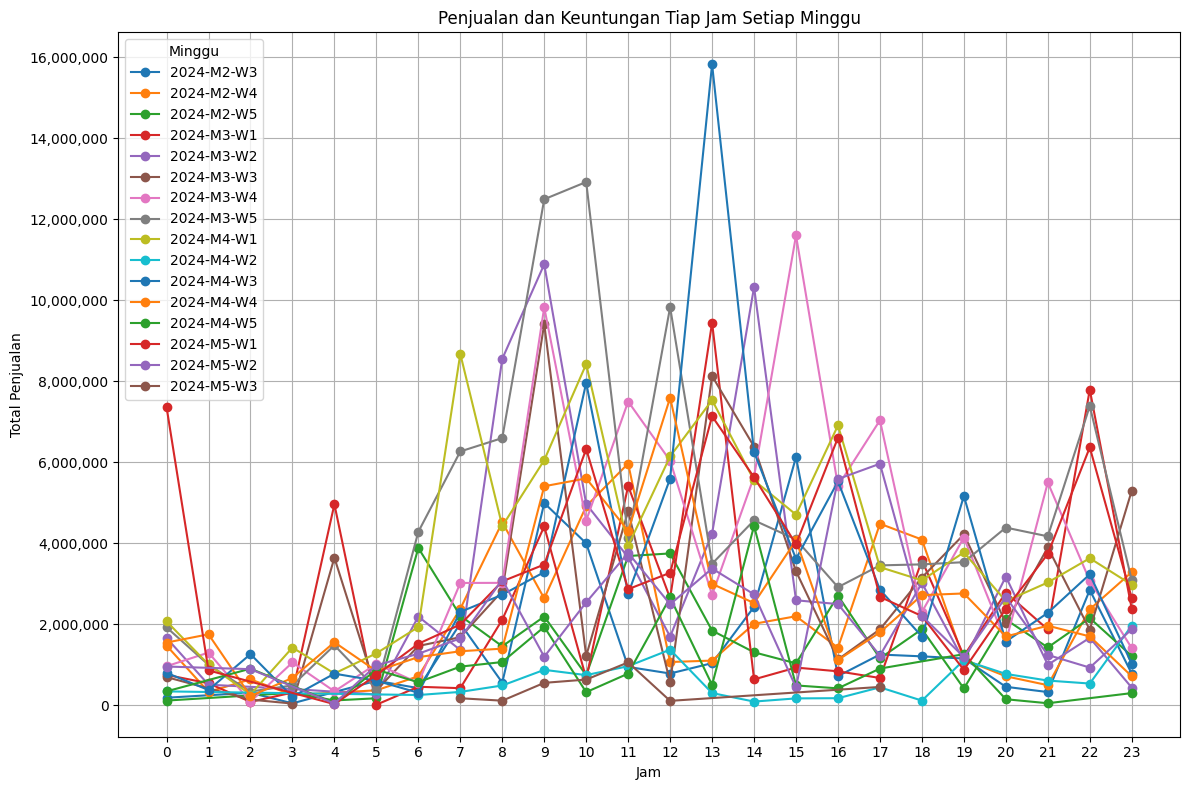

In [ ]:
# Mengelompokkan data berdasarkan 'MonthWeekLabel' dan 'Waktu Pembayaran' (jam) untuk menghitung penjualan per jam per minggu
df['Hour'] = df['Waktu Pembayaran'].dt.hour
weekly_hourly_sales = df.groupby(['MonthWeekLabel', 'Hour'])['Total'].sum().reset_index()

# Function to format the Y axis
def y_formatter(x, pos):
    return f'{int(x):,}'

# Plotting
unique_labels = weekly_hourly_sales['MonthWeekLabel'].unique()

plt.figure(figsize=(12, 8))
for label in unique_labels:
    data_subset = weekly_hourly_sales[weekly_hourly_sales['MonthWeekLabel'] == label]
    plt.plot(data_subset['Hour'], data_subset['Total'], marker='o', linestyle='-', label=label)

plt.title('Penjualan dan Keuntungan Tiap Jam Setiap Minggu')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.xticks(np.arange(0, 24, 1))  # Set x-axis ticks to represent each hour
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))  # Apply the formatter to the y-axis
plt.legend(title='Minggu')
plt.grid(True)
plt.tight_layout()
plt.show()

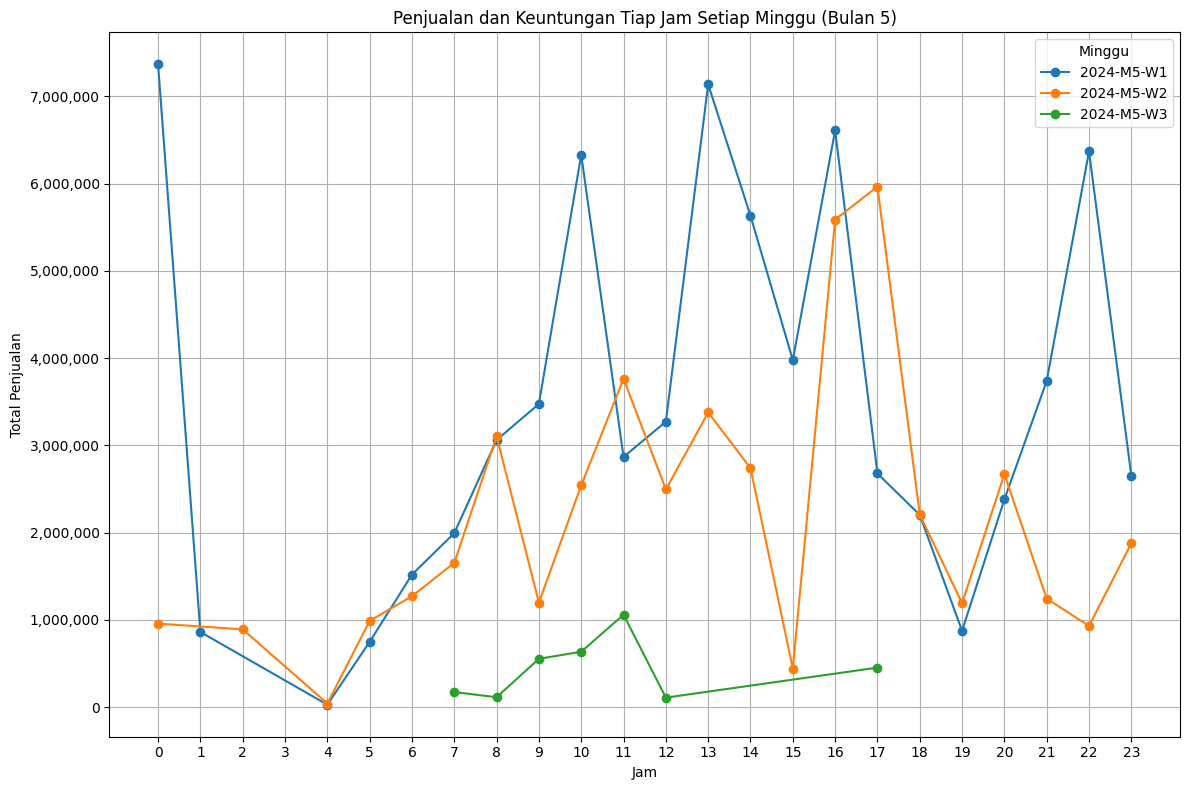

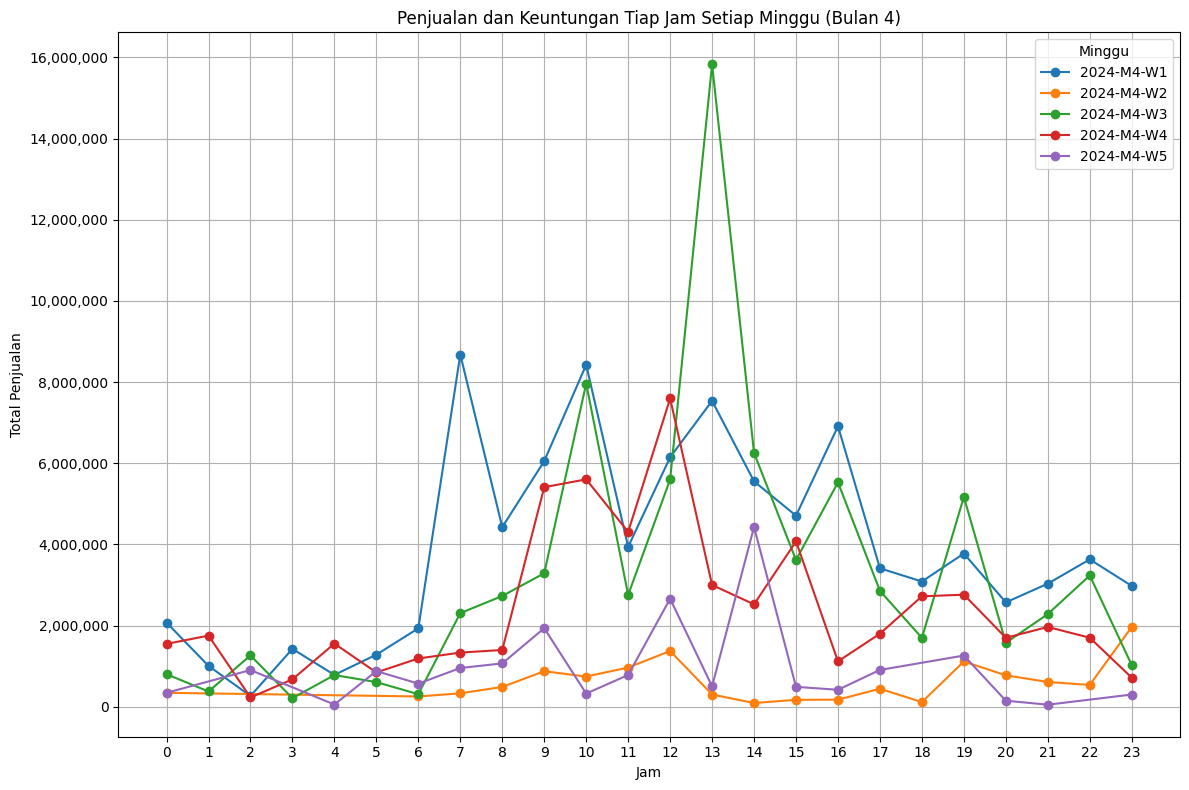

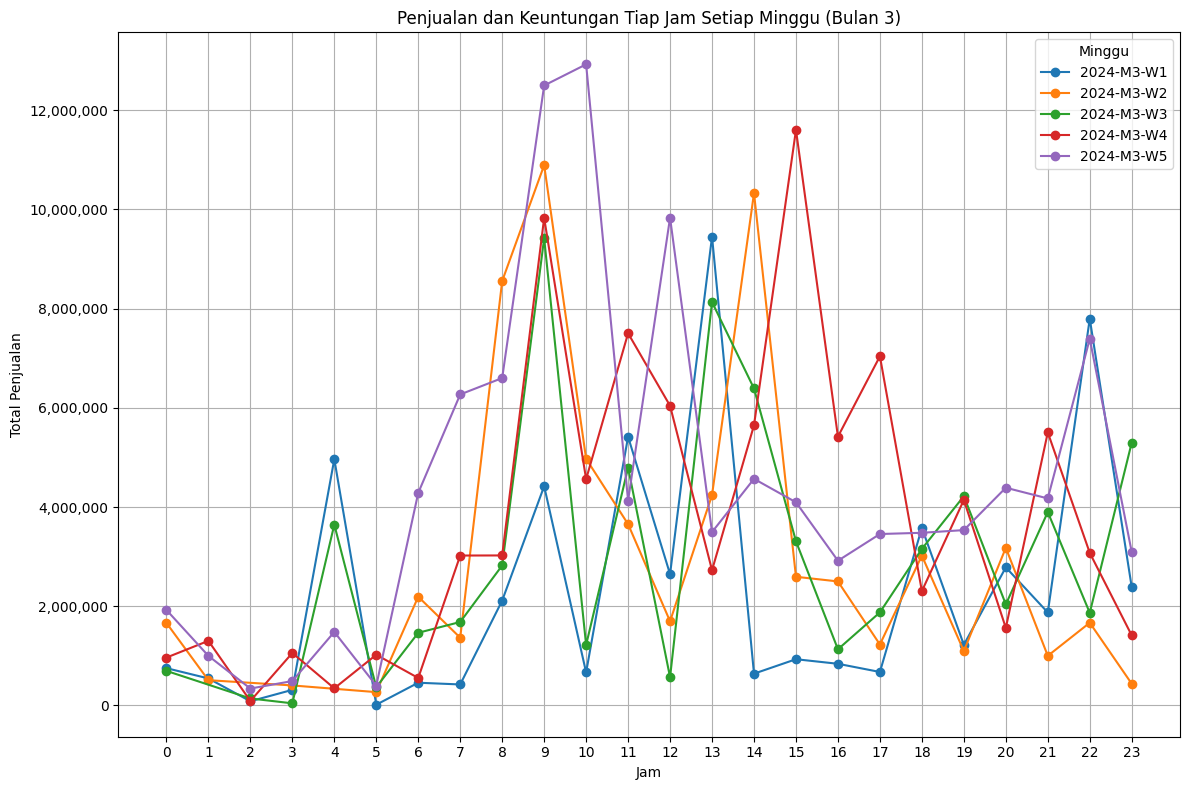

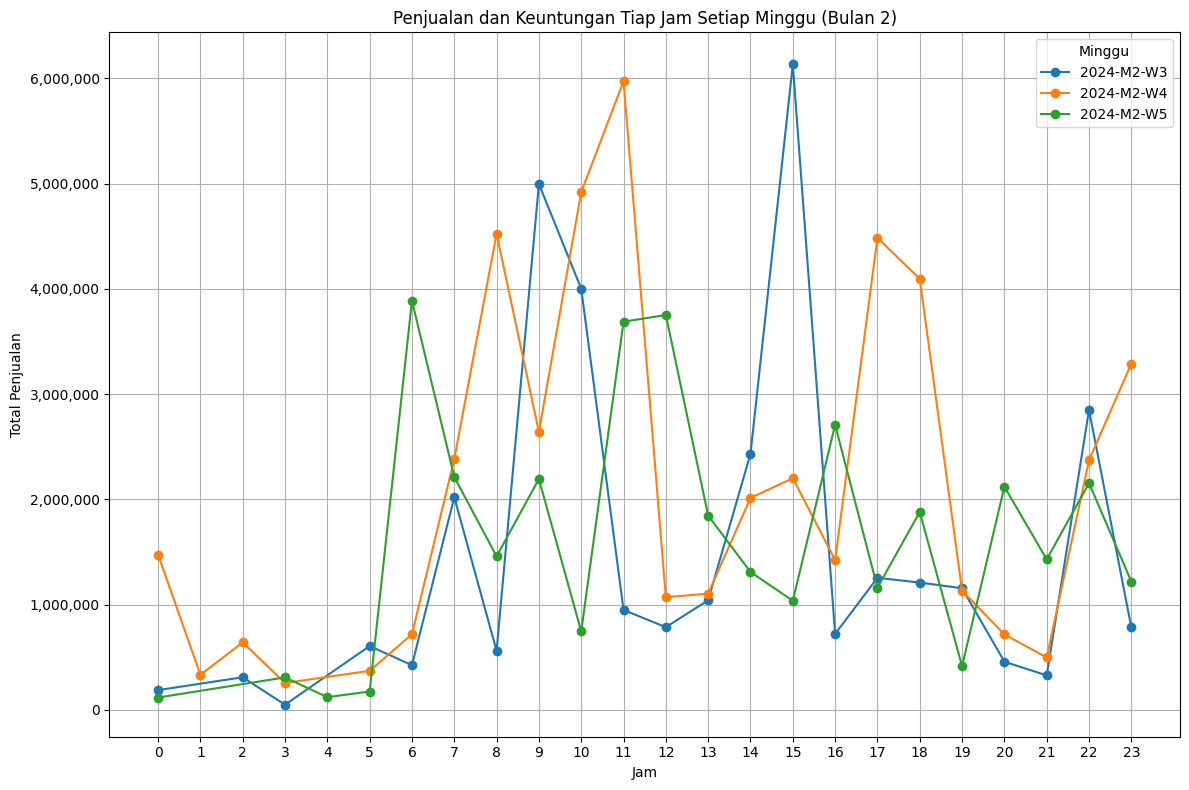

In [ ]:

# Menambahkan kolom 'Hour' untuk mengekstrak jam dari 'Waktu Pembayaran'
df['Hour'] = df['Waktu Pembayaran'].dt.hour

# Mengelompokkan data berdasarkan 'MonthWeekLabel' dan 'Hour' untuk menghitung penjualan per jam per minggu
weekly_hourly_sales = df.groupby(['MonthWeekLabel', 'Hour'])['Total'].sum().reset_index()

# Function to format the Y axis
def y_formatter(x, pos):
    return f'{int(x):,}'

# Plotting terpisah untuk setiap bulan
months = df['Month'].unique()

for month in months:
    plt.figure(figsize=(12, 8))
    monthly_data = weekly_hourly_sales[weekly_hourly_sales['MonthWeekLabel'].str.contains(f'-M{month}-')]
    unique_labels = monthly_data['MonthWeekLabel'].unique()

    for label in unique_labels:
        data_subset = monthly_data[monthly_data['MonthWeekLabel'] == label]
        plt.plot(data_subset['Hour'], data_subset['Total'], marker='o', linestyle='-', label=label)

    plt.title(f'Penjualan dan Keuntungan Tiap Jam Setiap Minggu (Bulan {month})')
    plt.xlabel('Jam')
    plt.ylabel('Total Penjualan')
    plt.xticks(np.arange(0, 24, 1))  # Set x-axis ticks to represent each hour
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))
    plt.legend(title='Minggu')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## BY Harian/Minggu

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


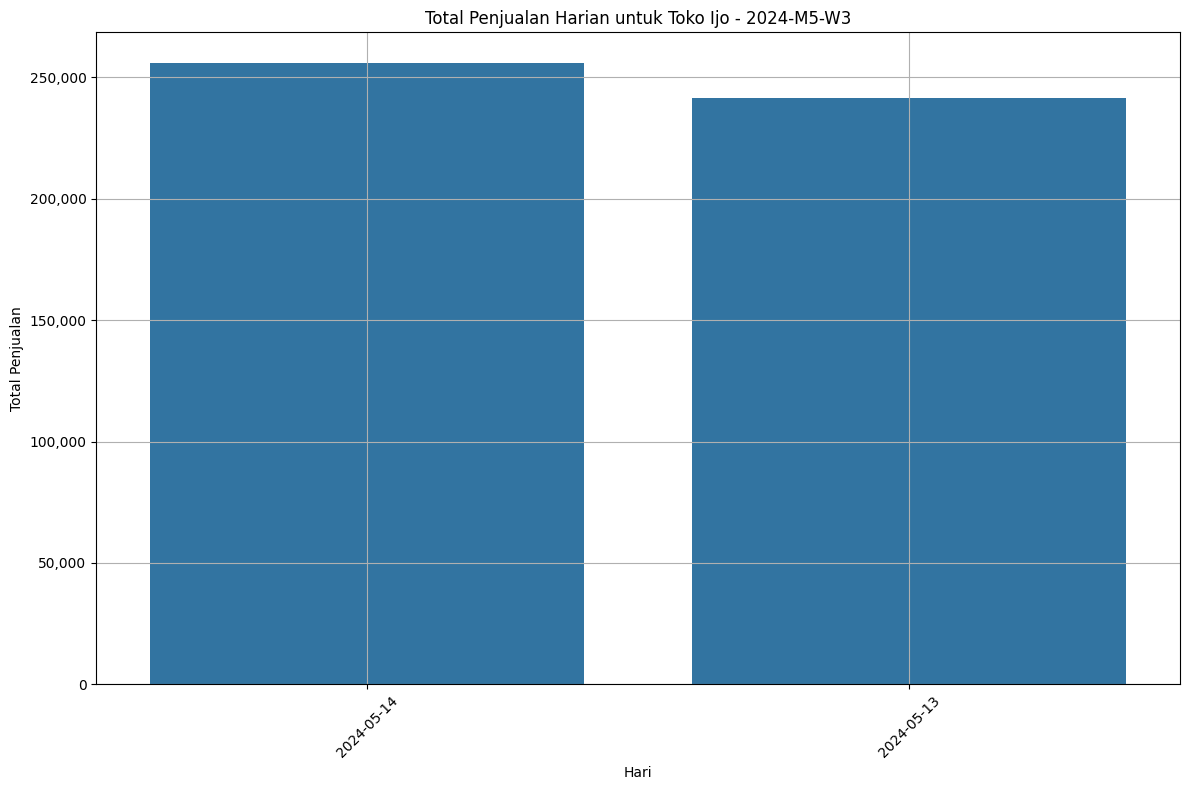

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


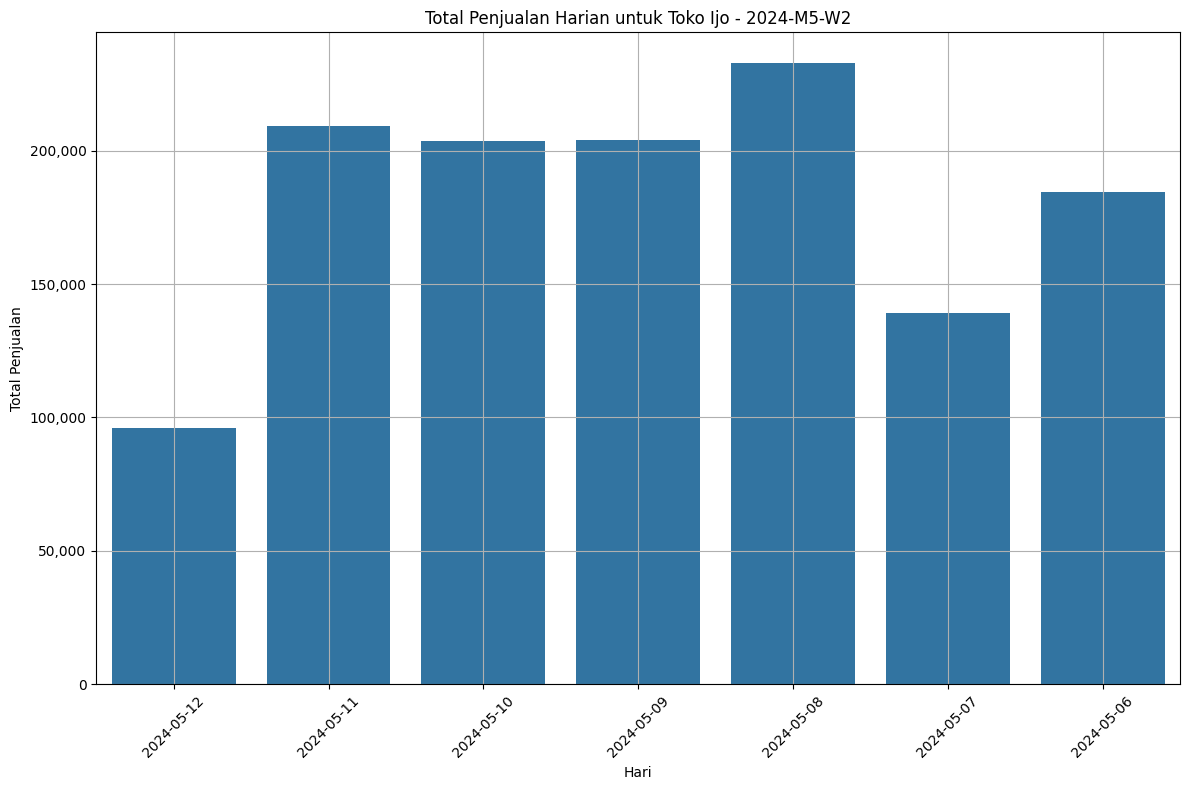

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


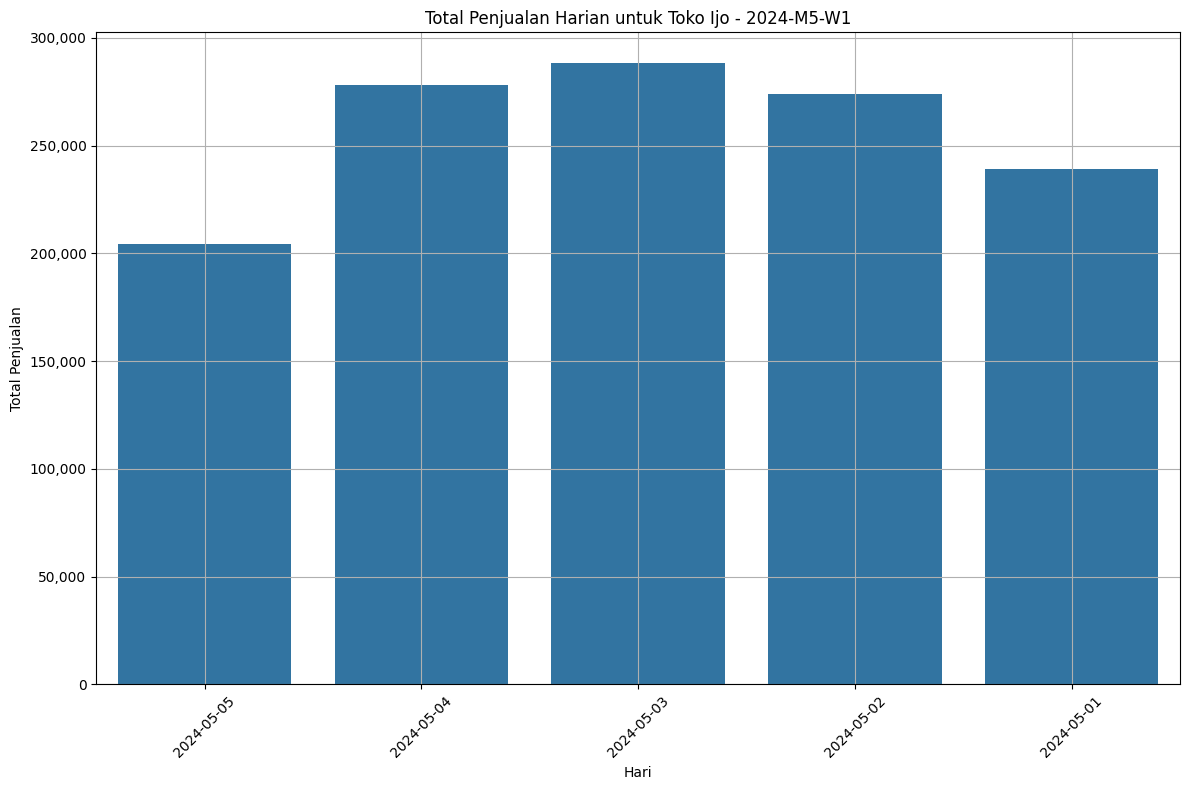

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


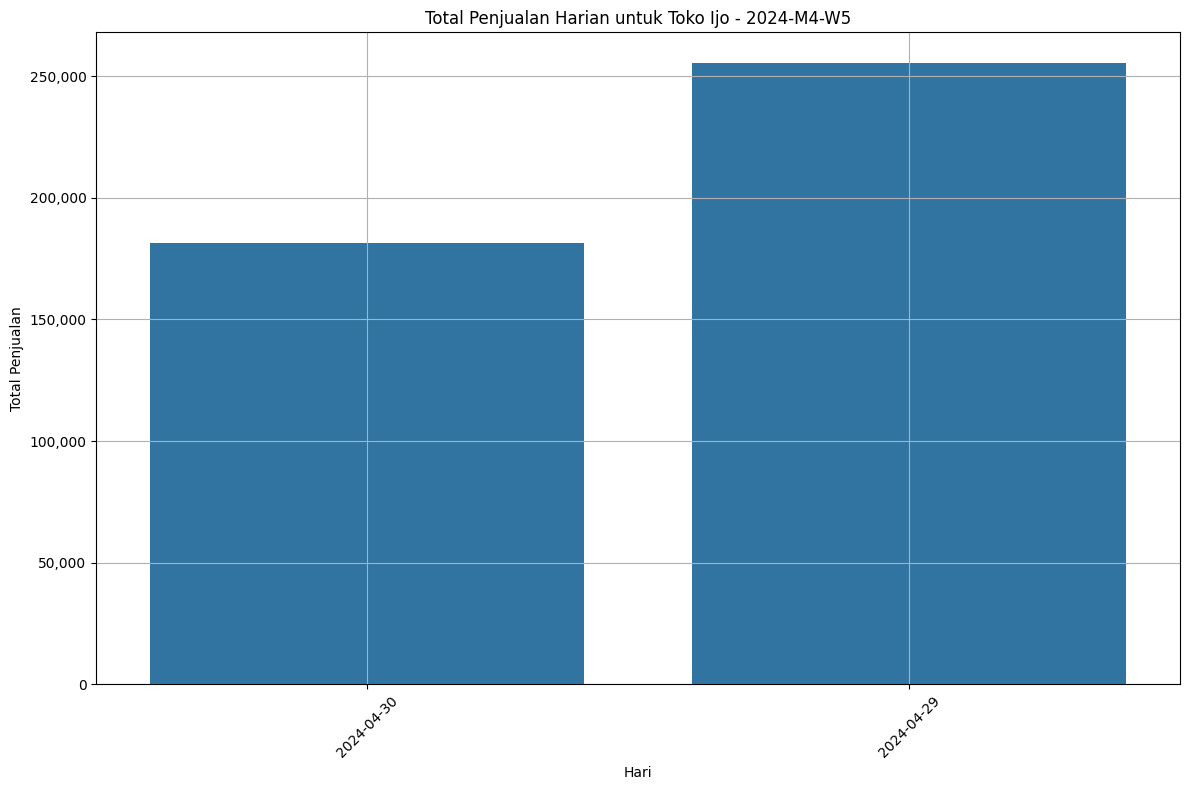

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


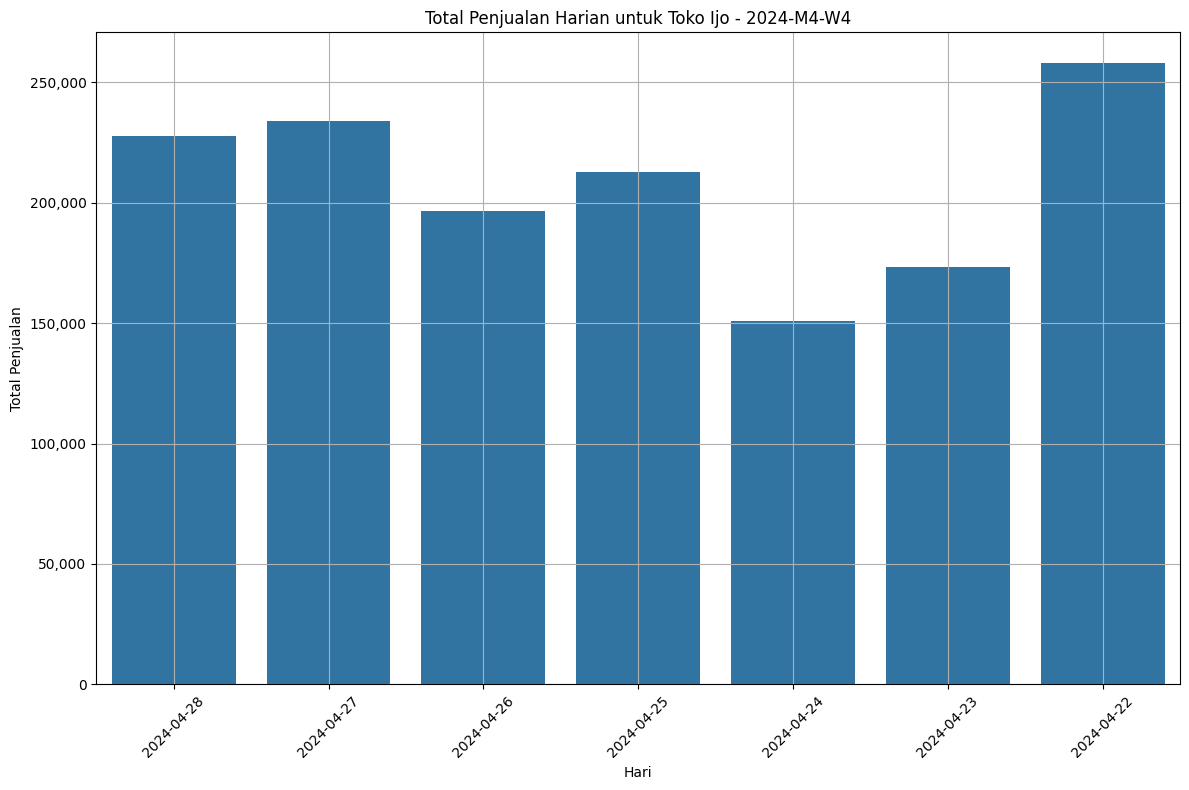

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


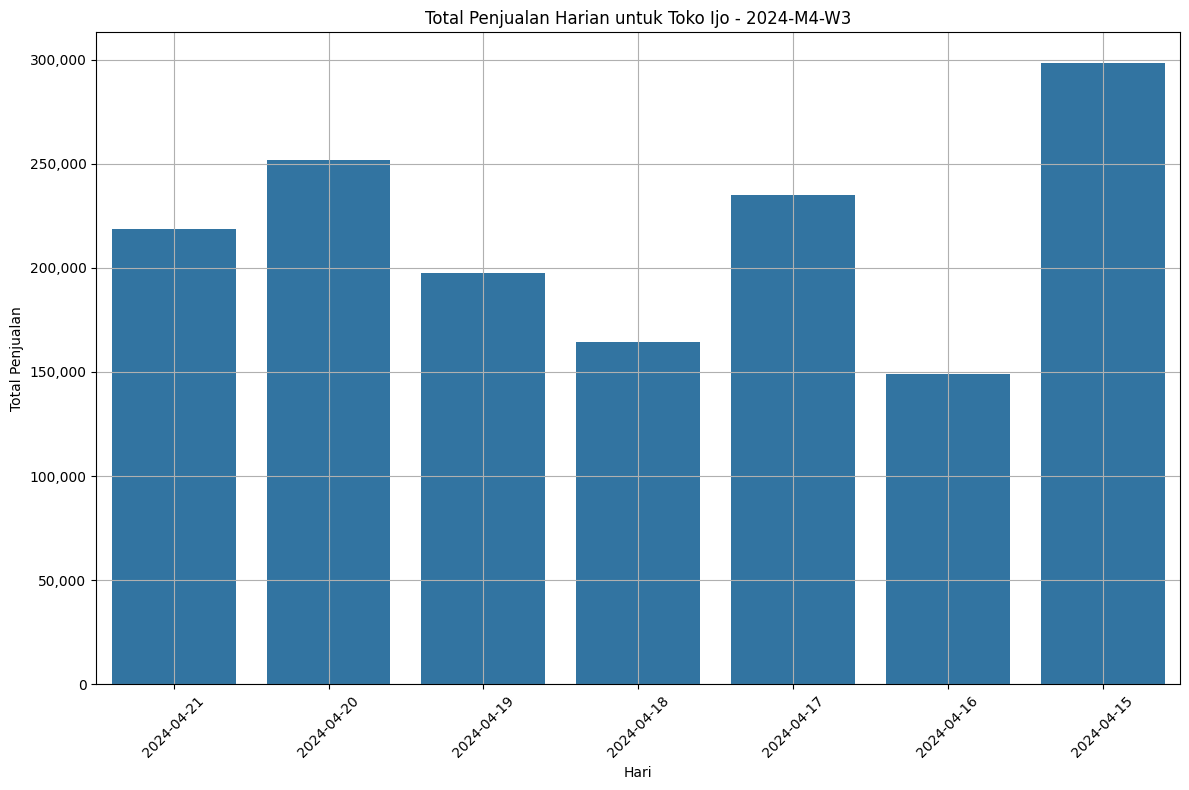

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


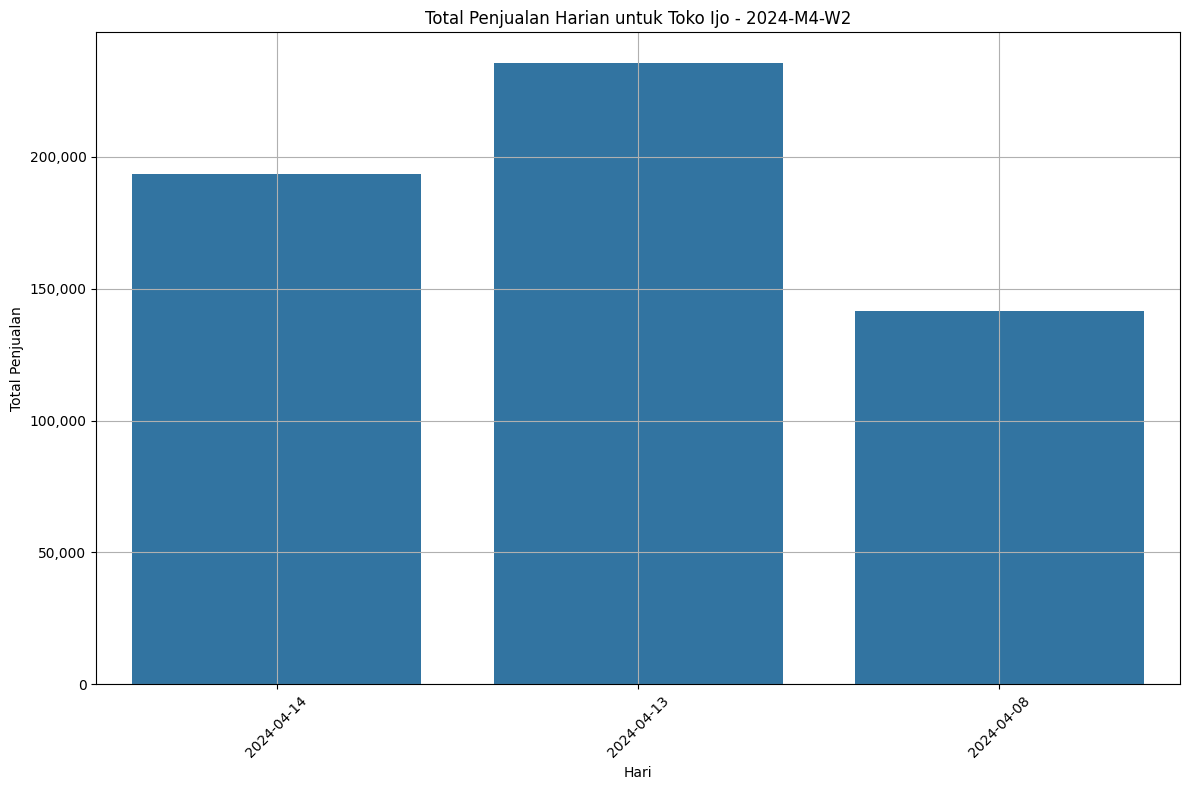

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


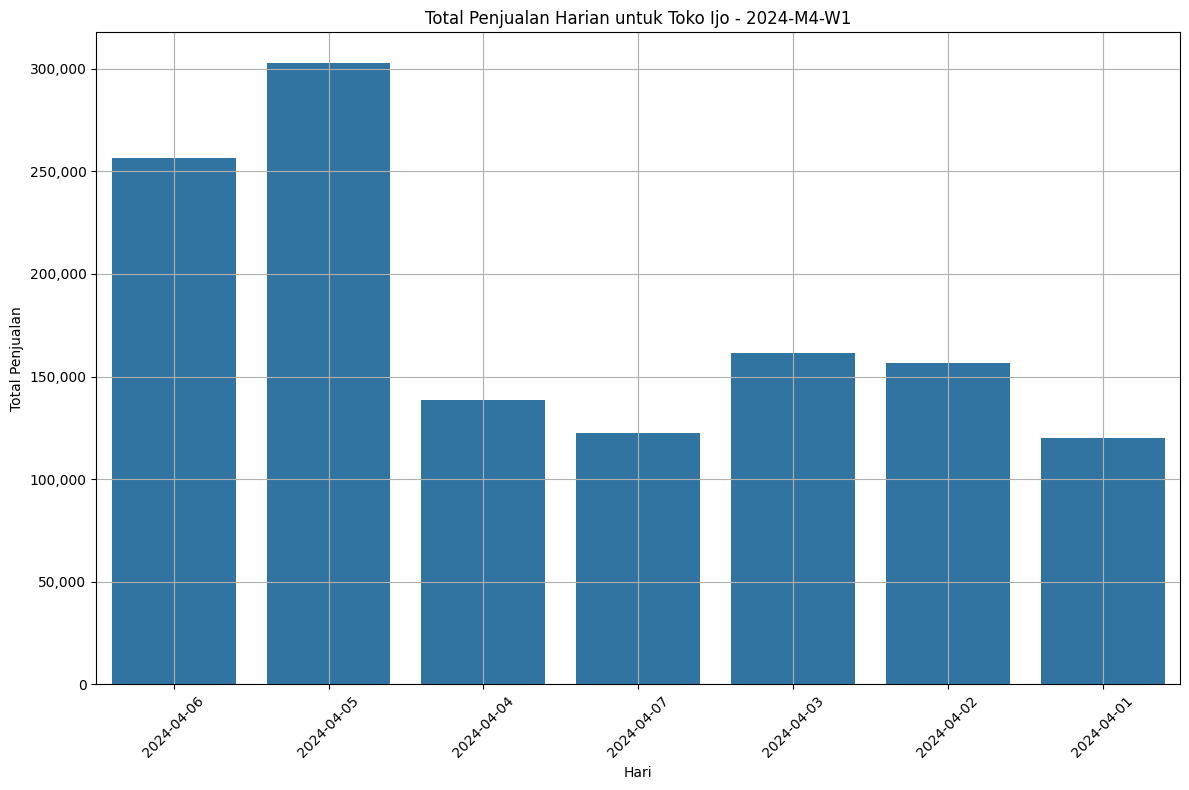

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


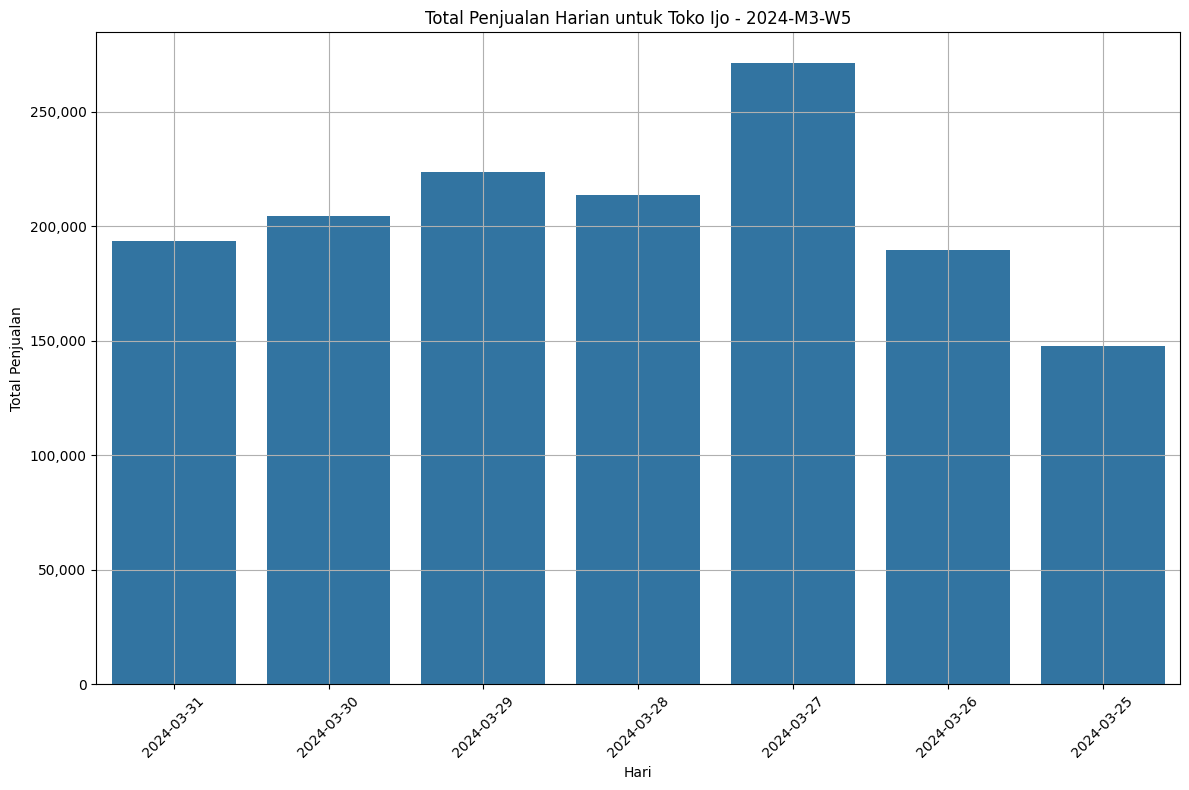

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


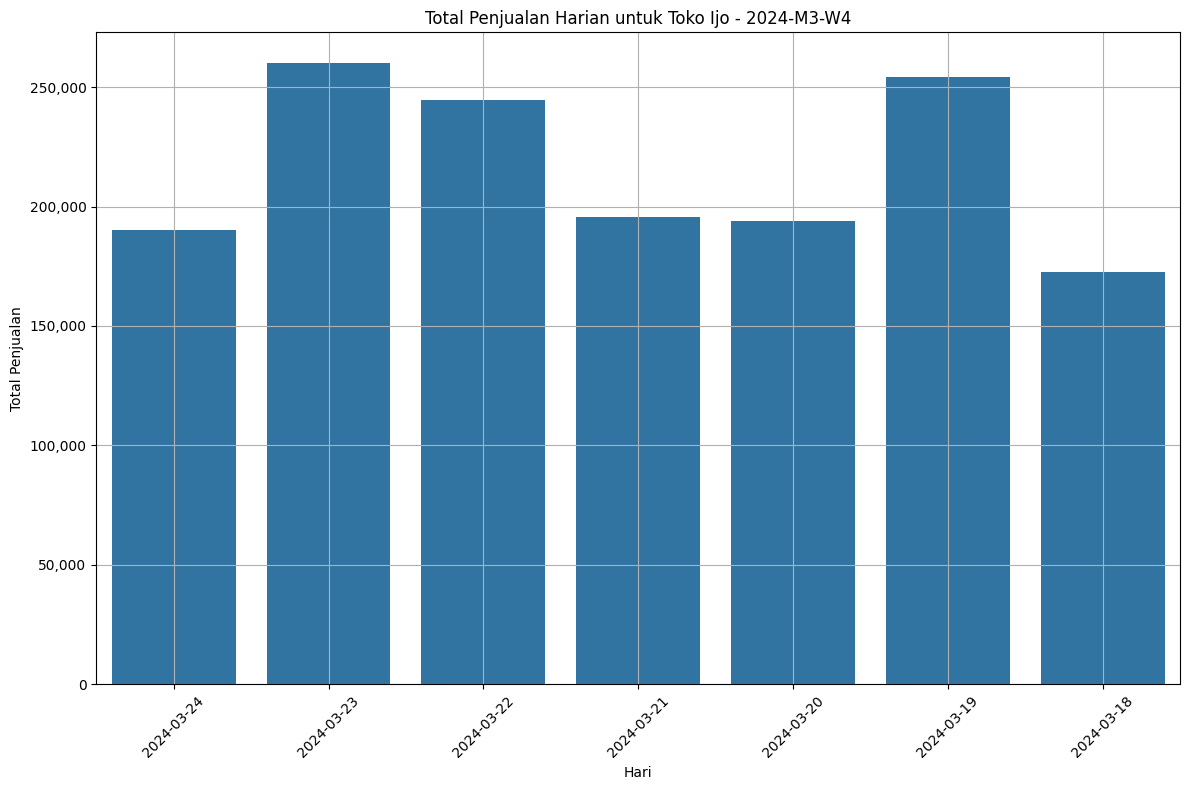

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


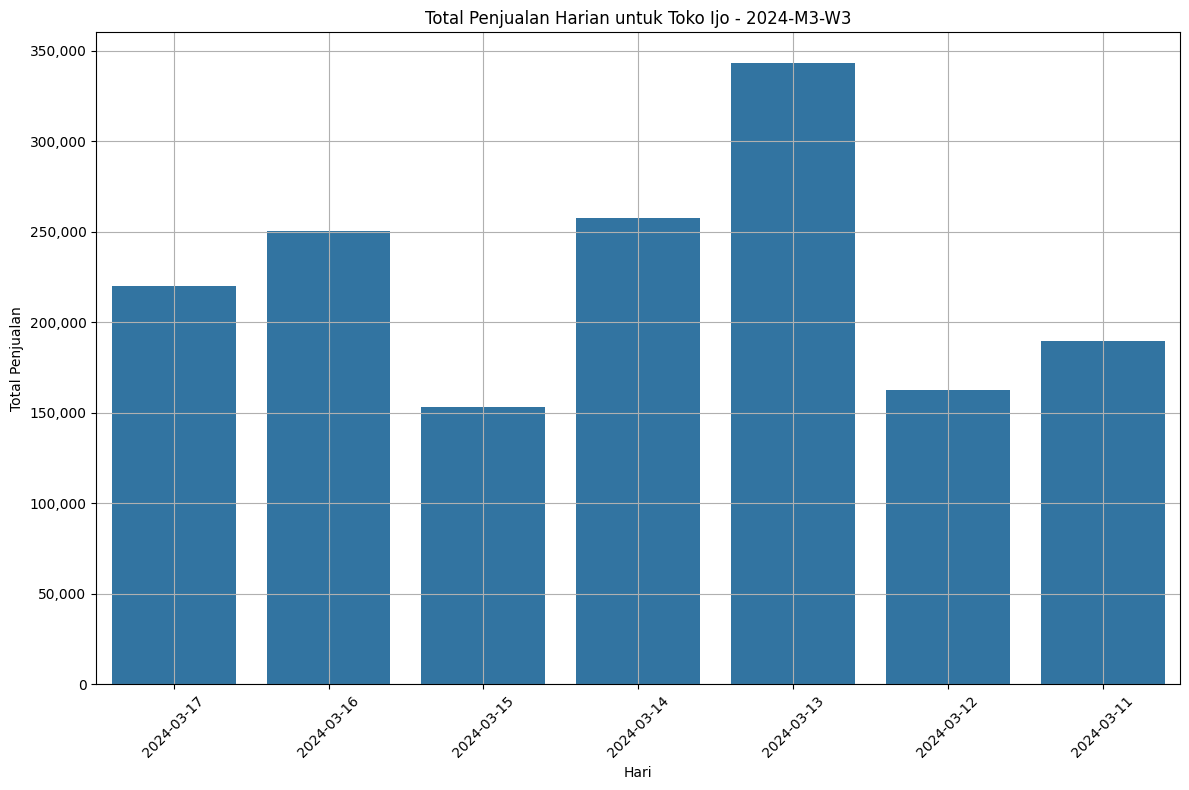

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


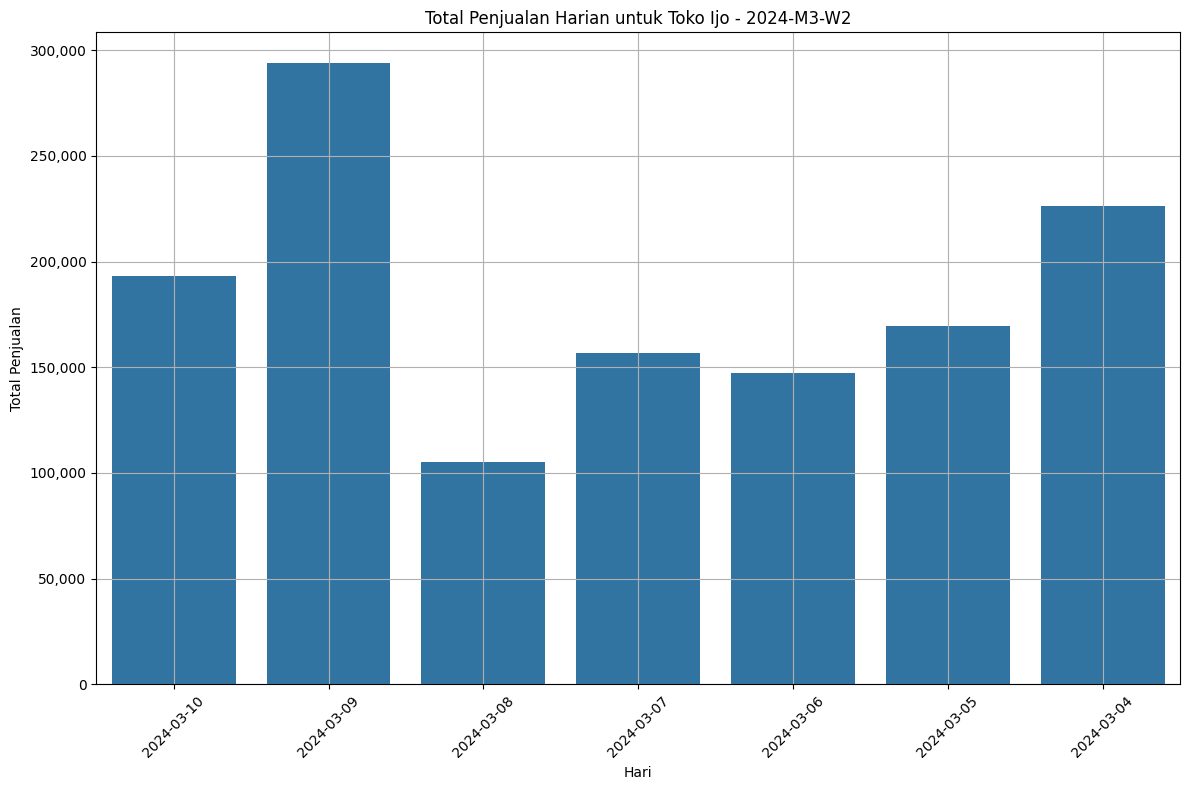

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


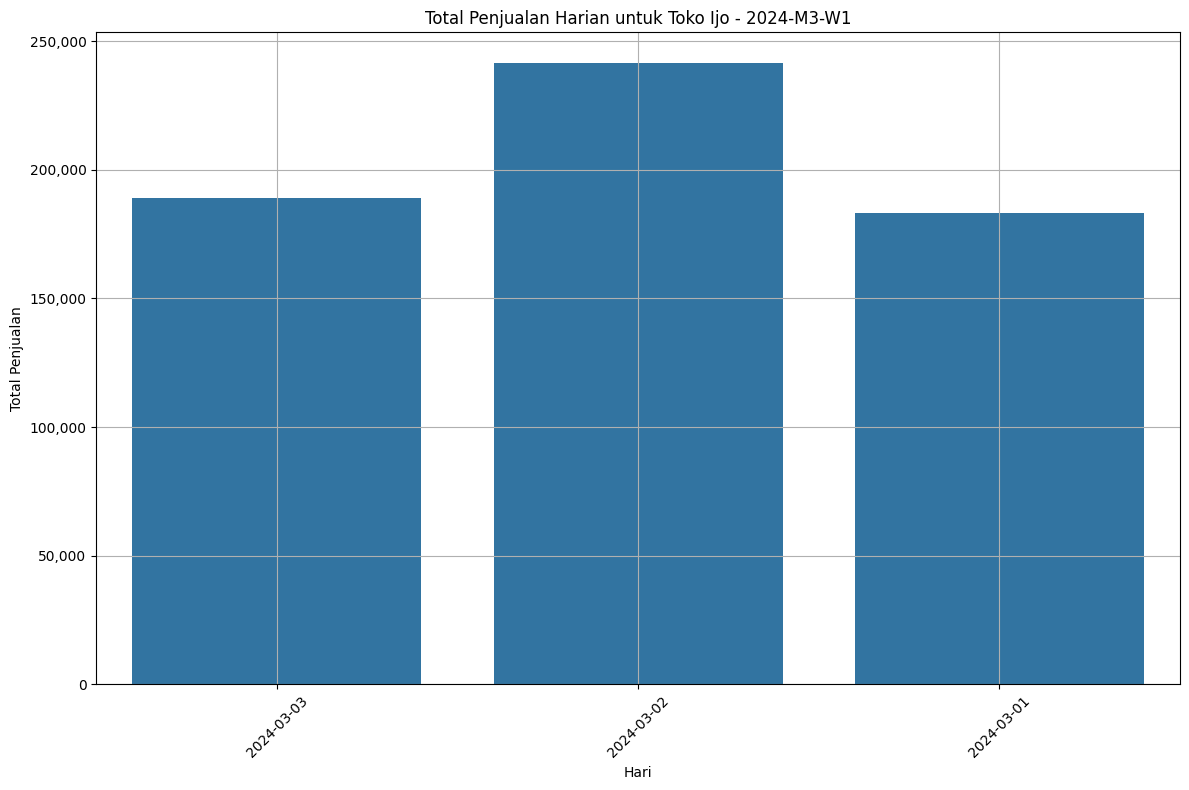

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


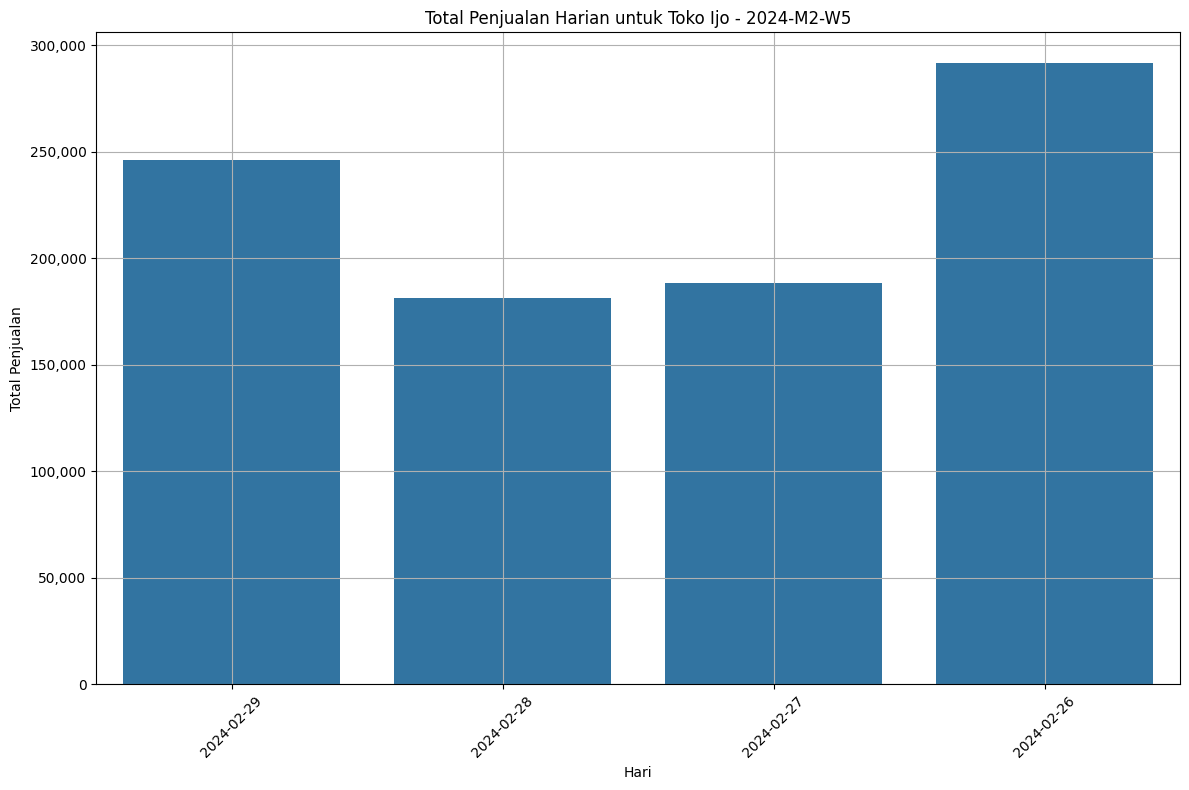

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


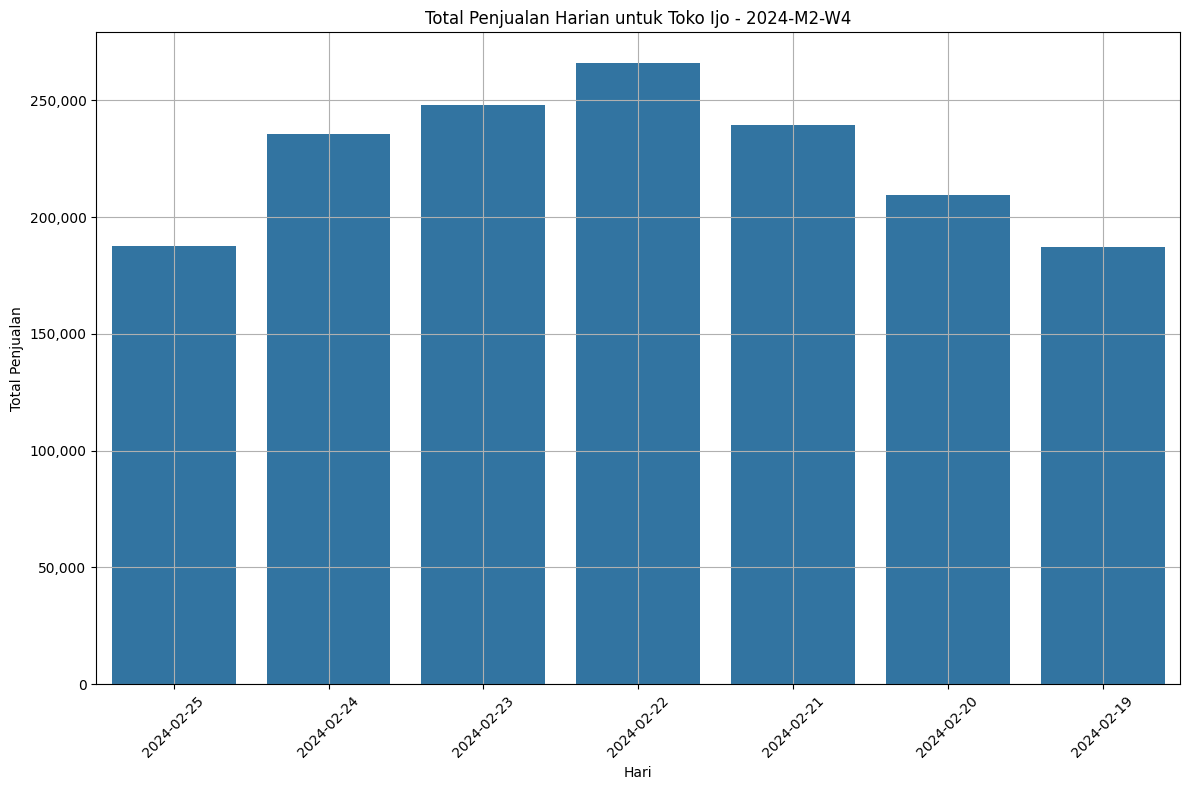

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


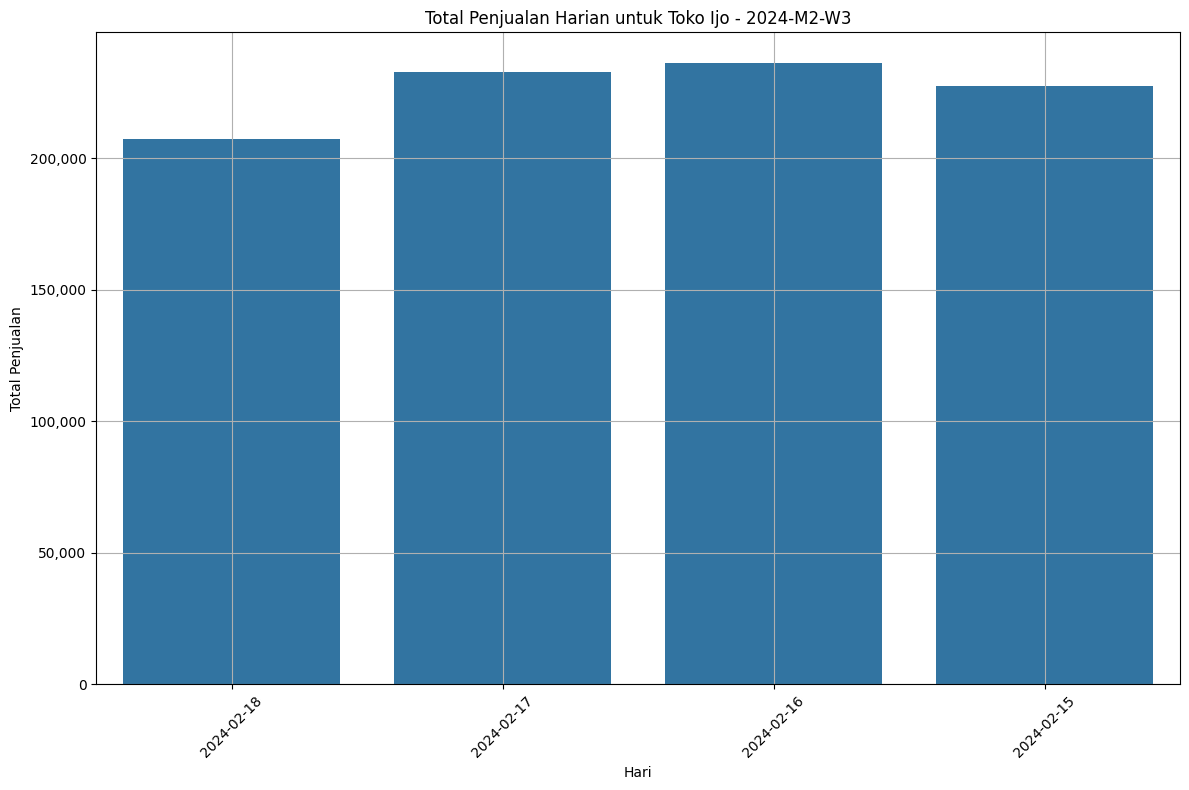

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


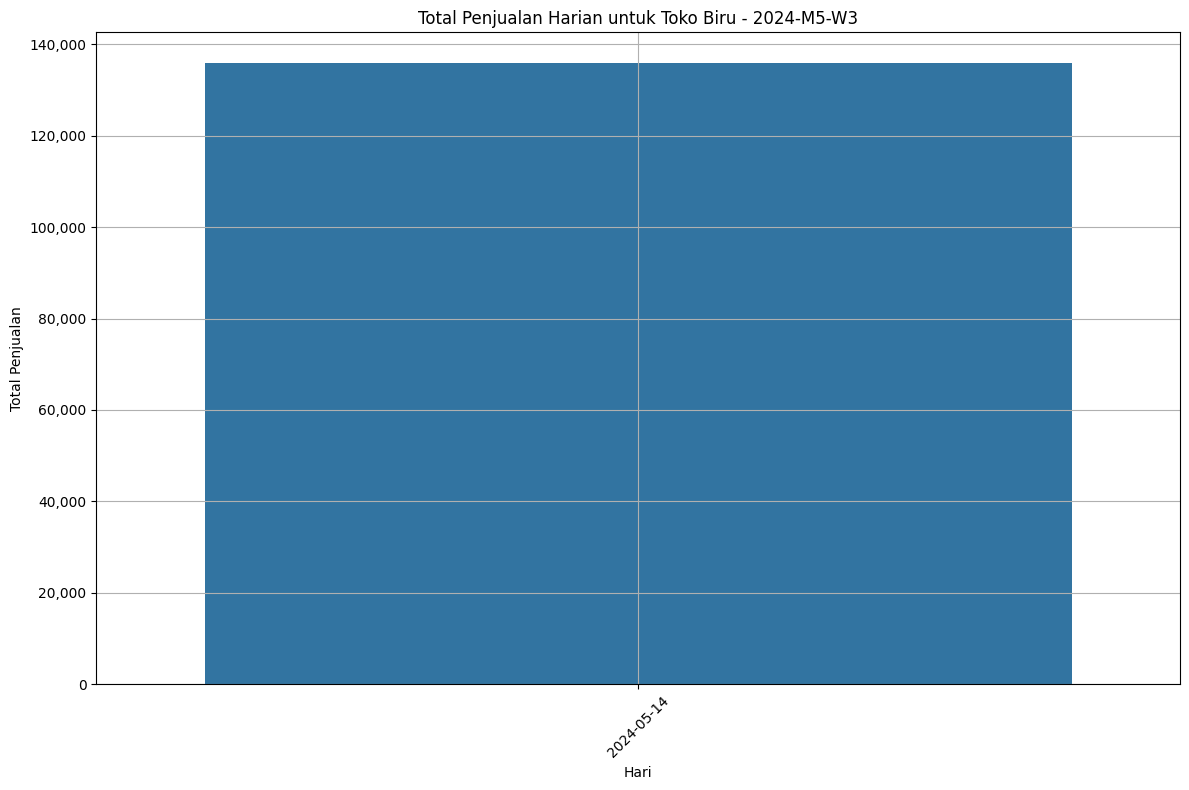

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


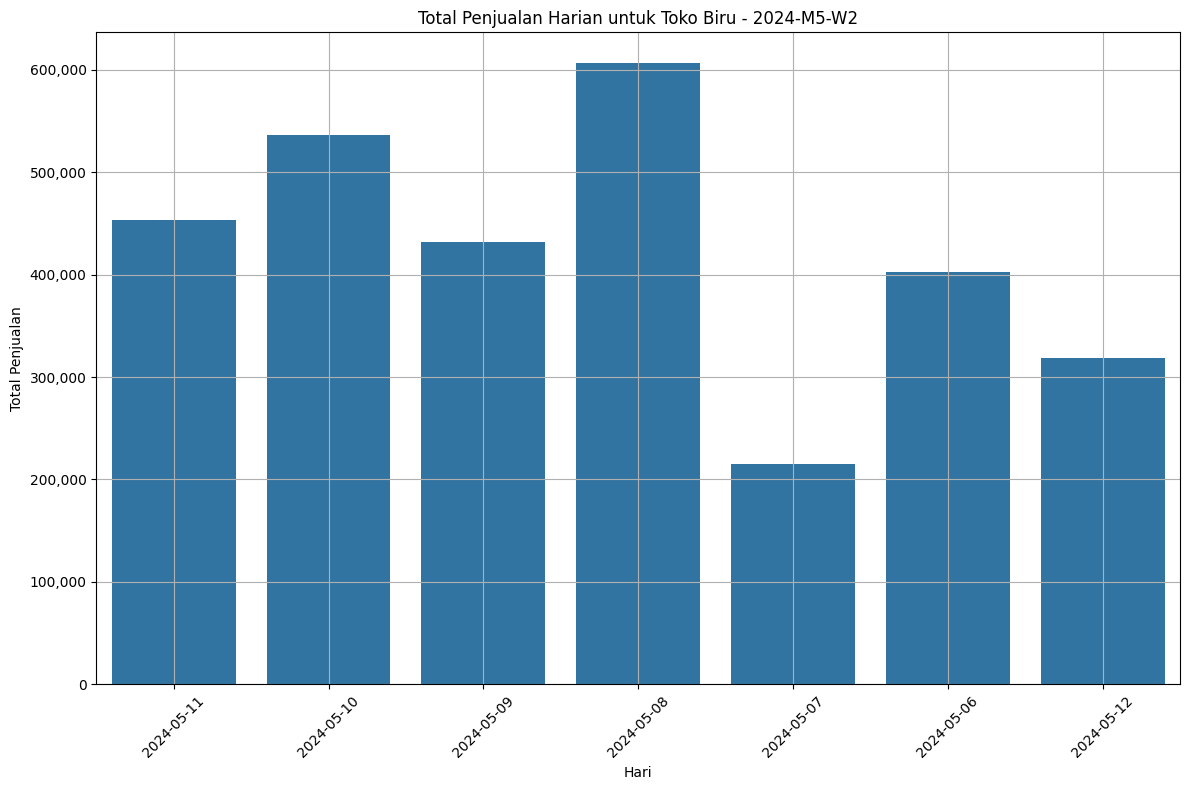

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


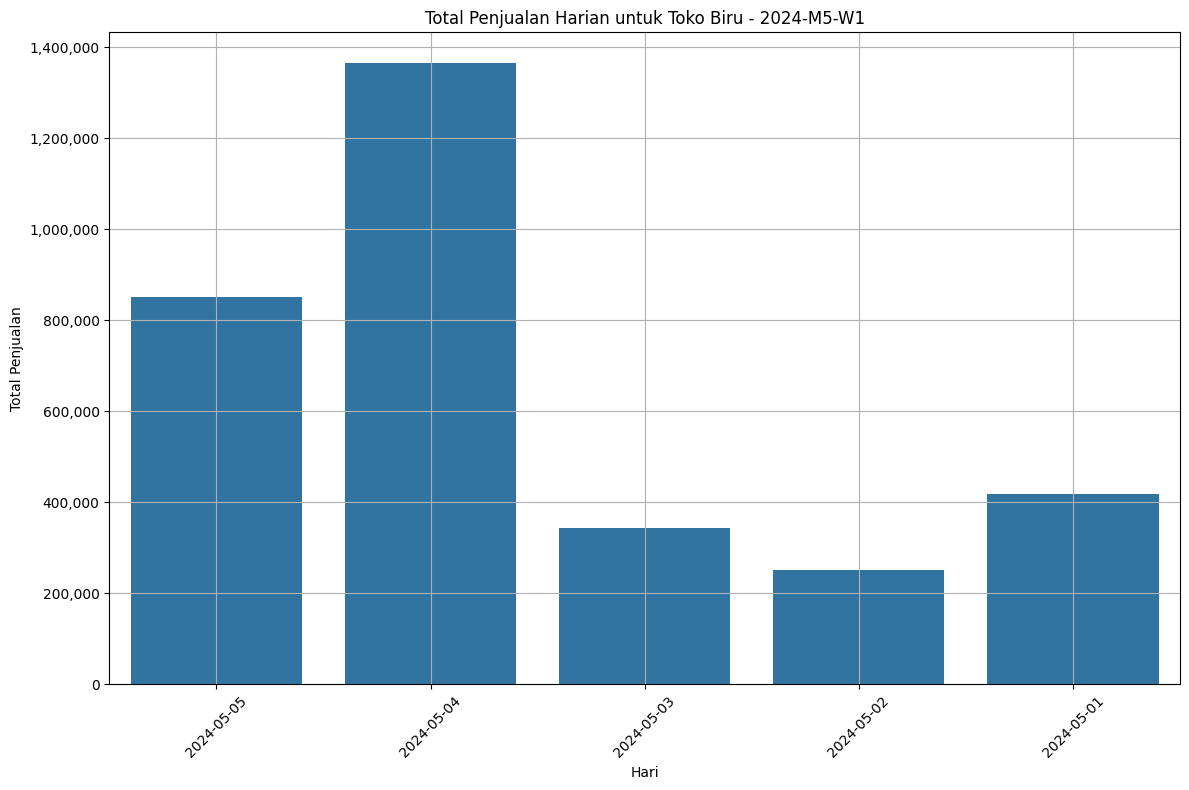

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


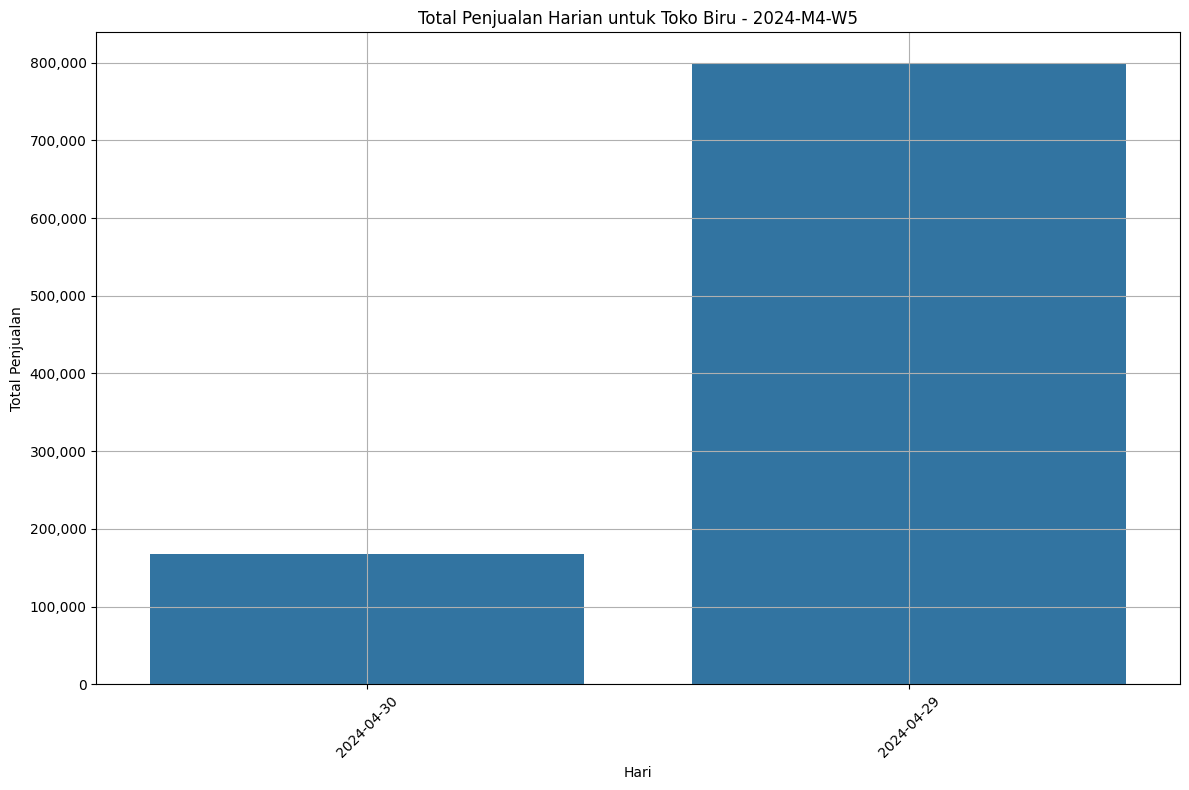

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


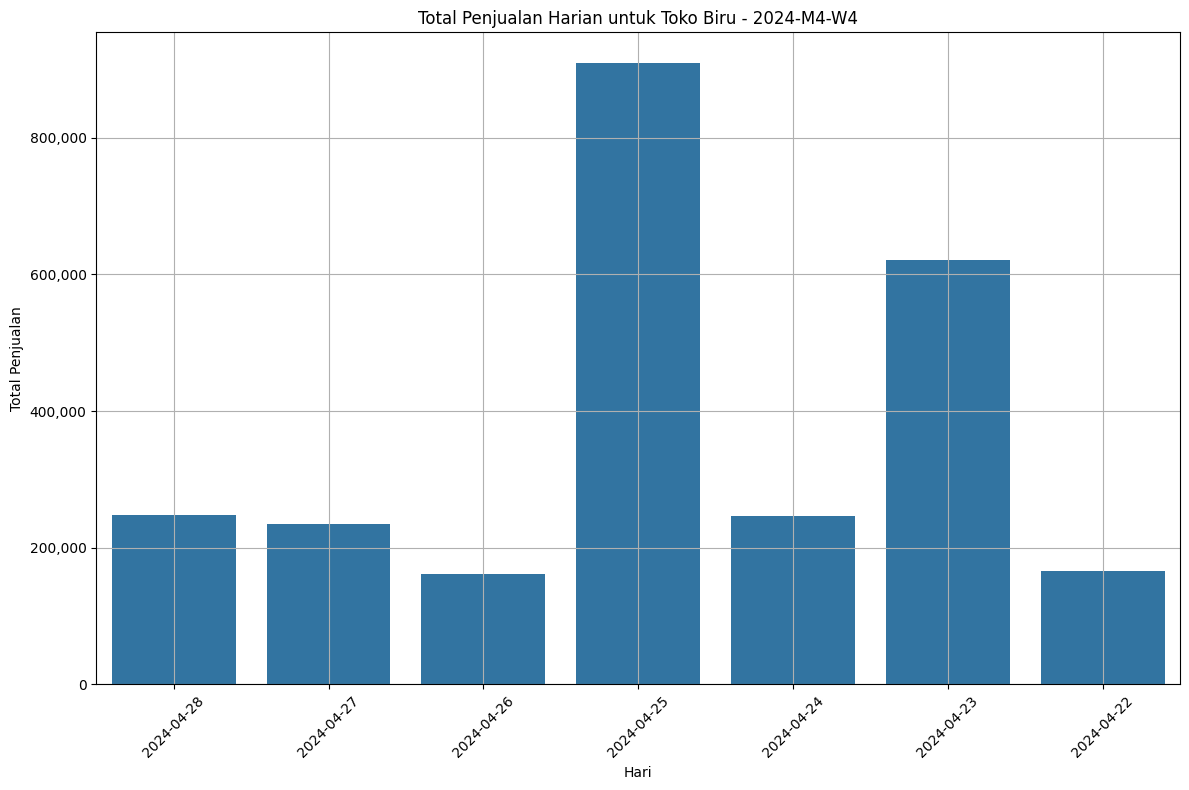

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


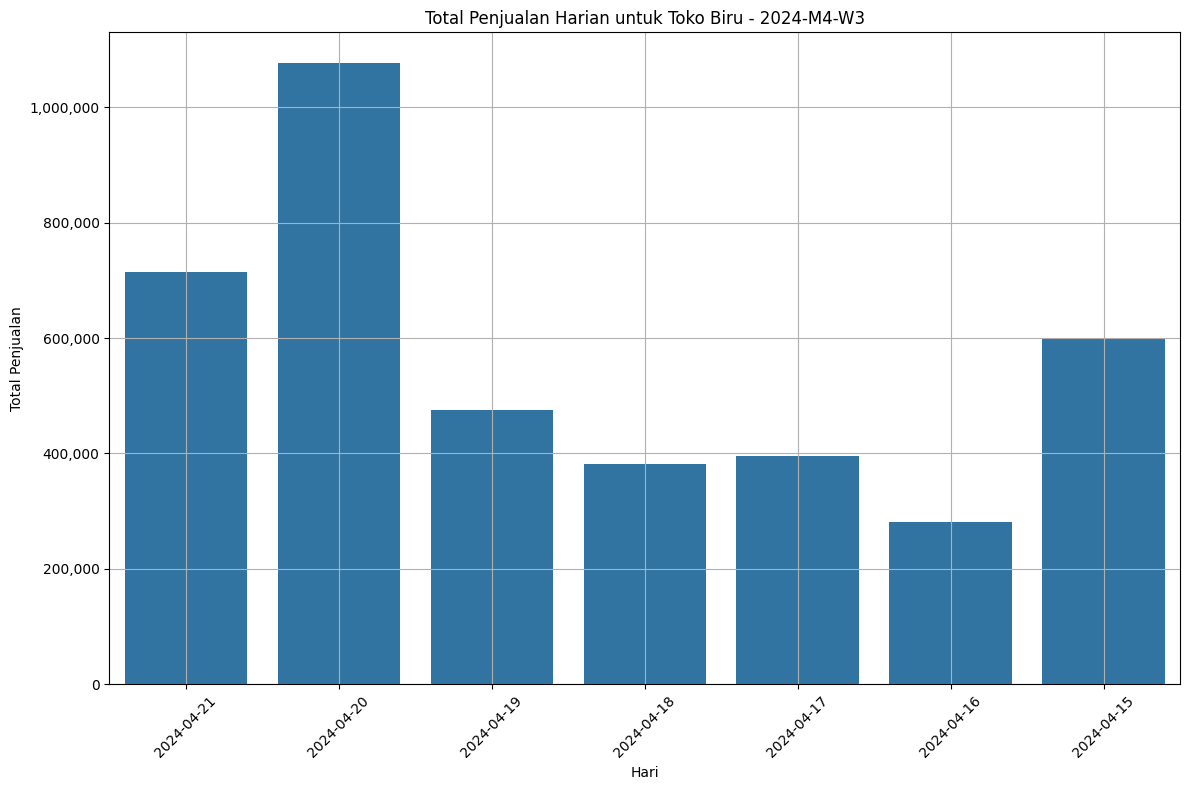

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


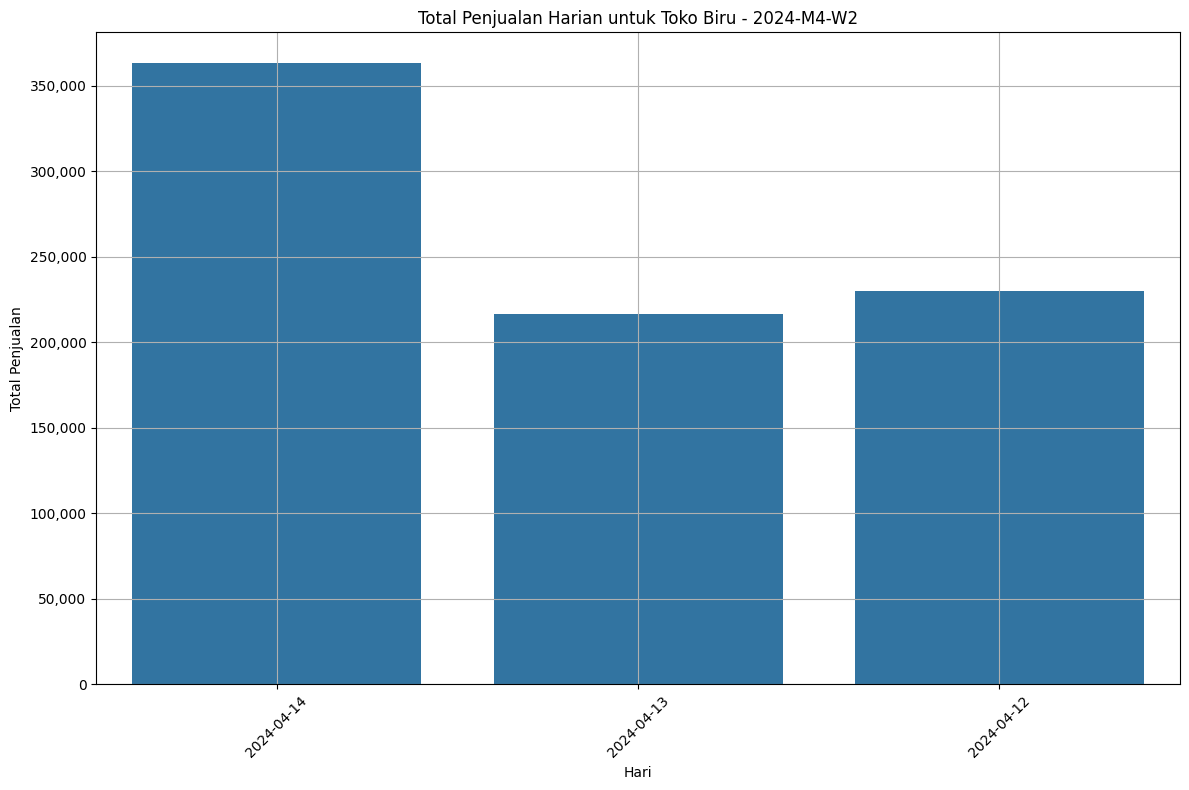

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


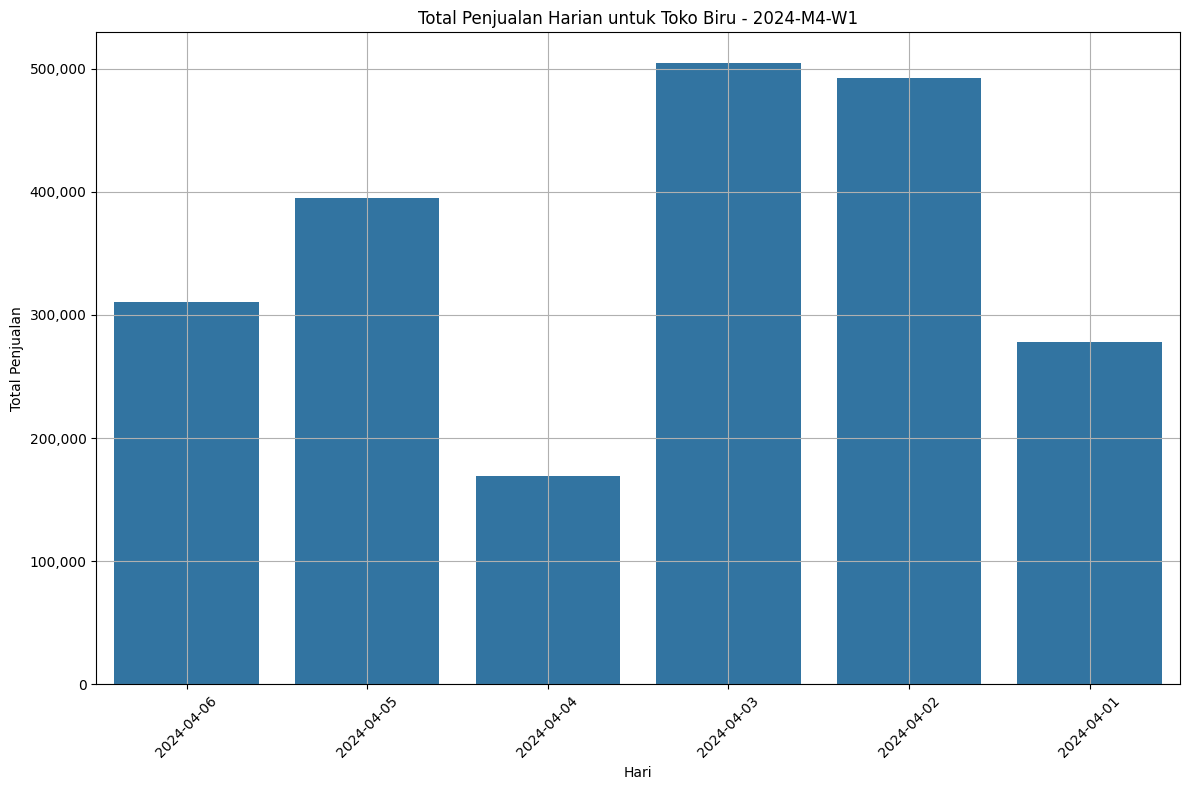

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


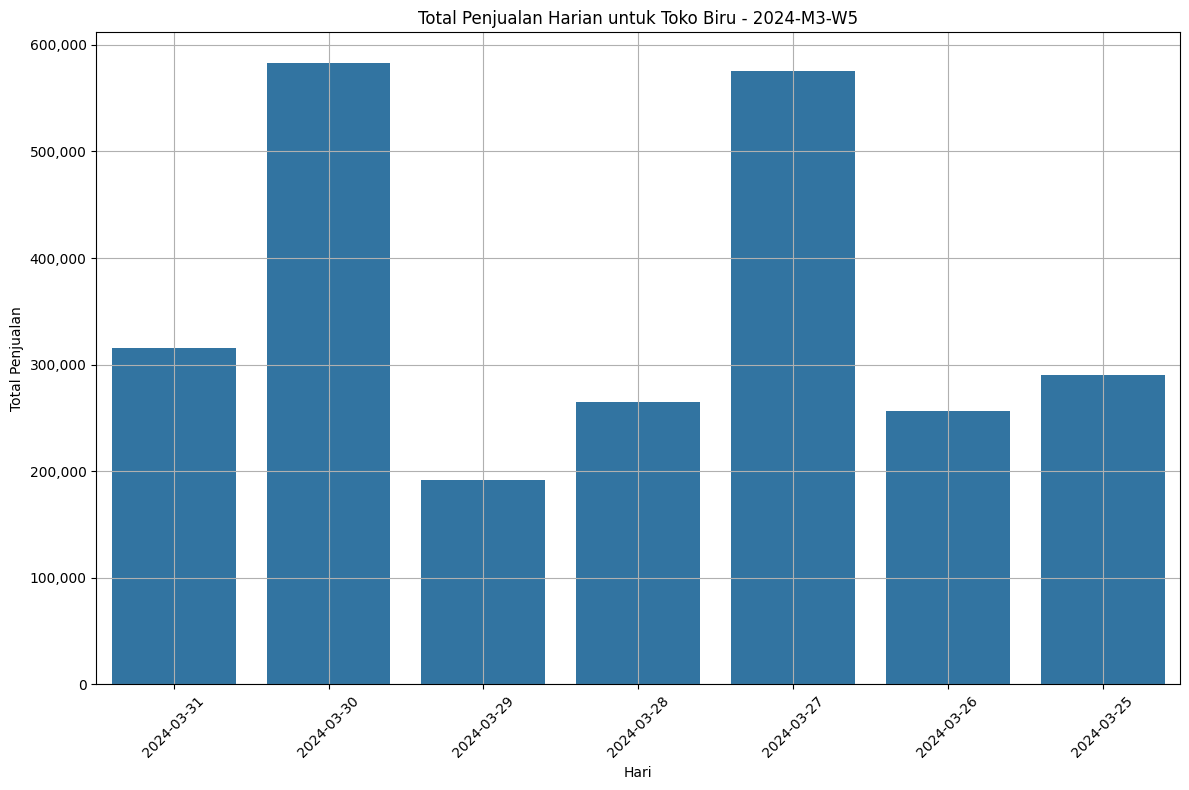

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


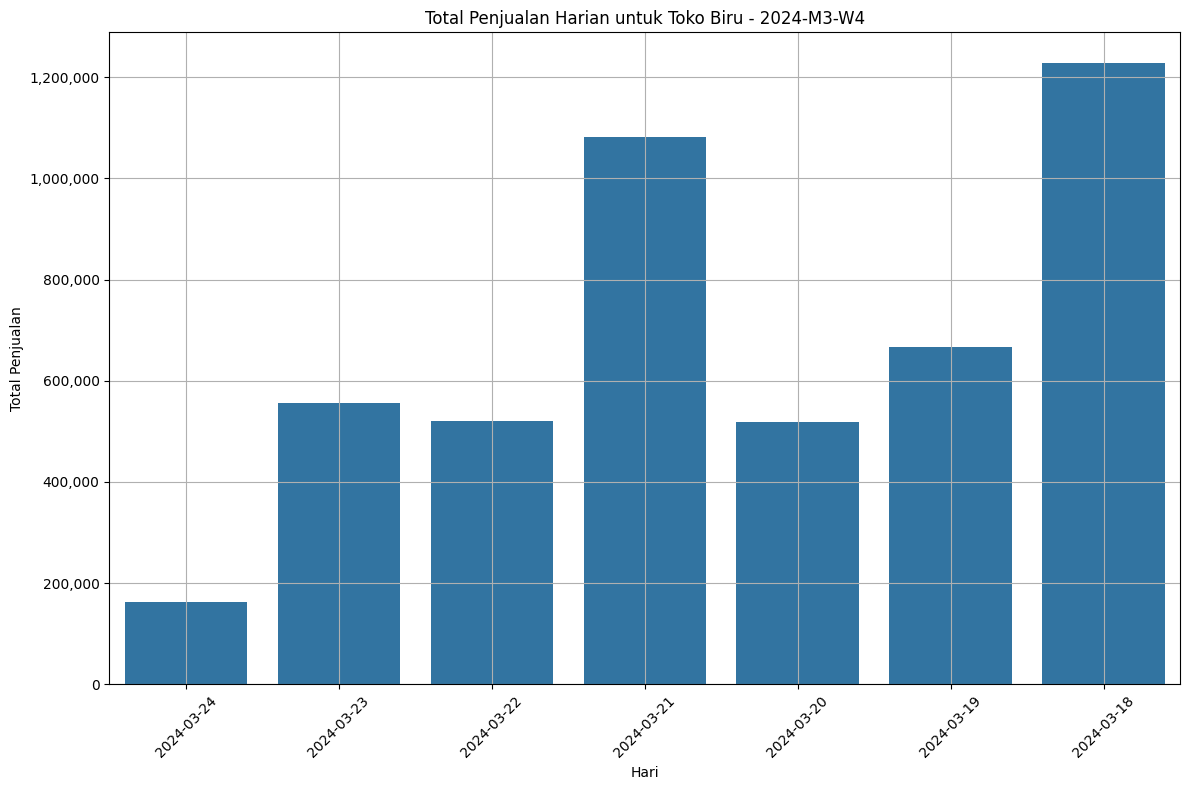

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


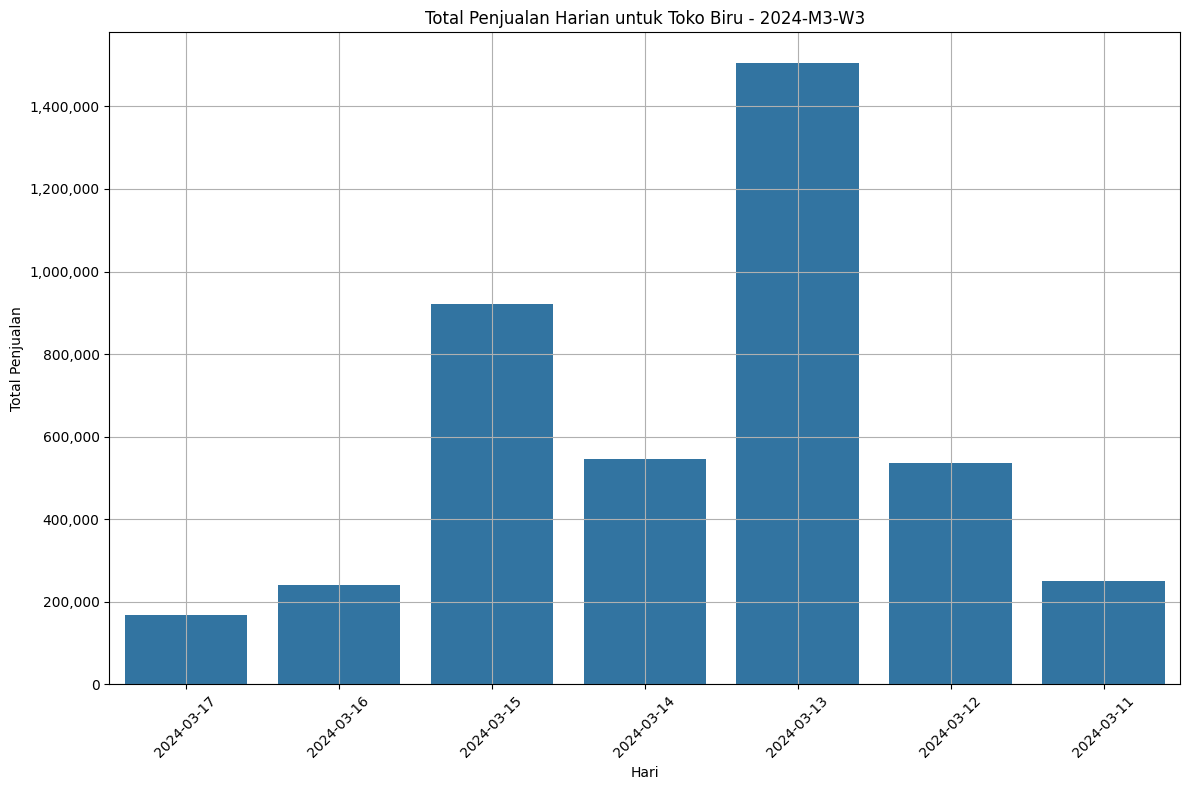

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


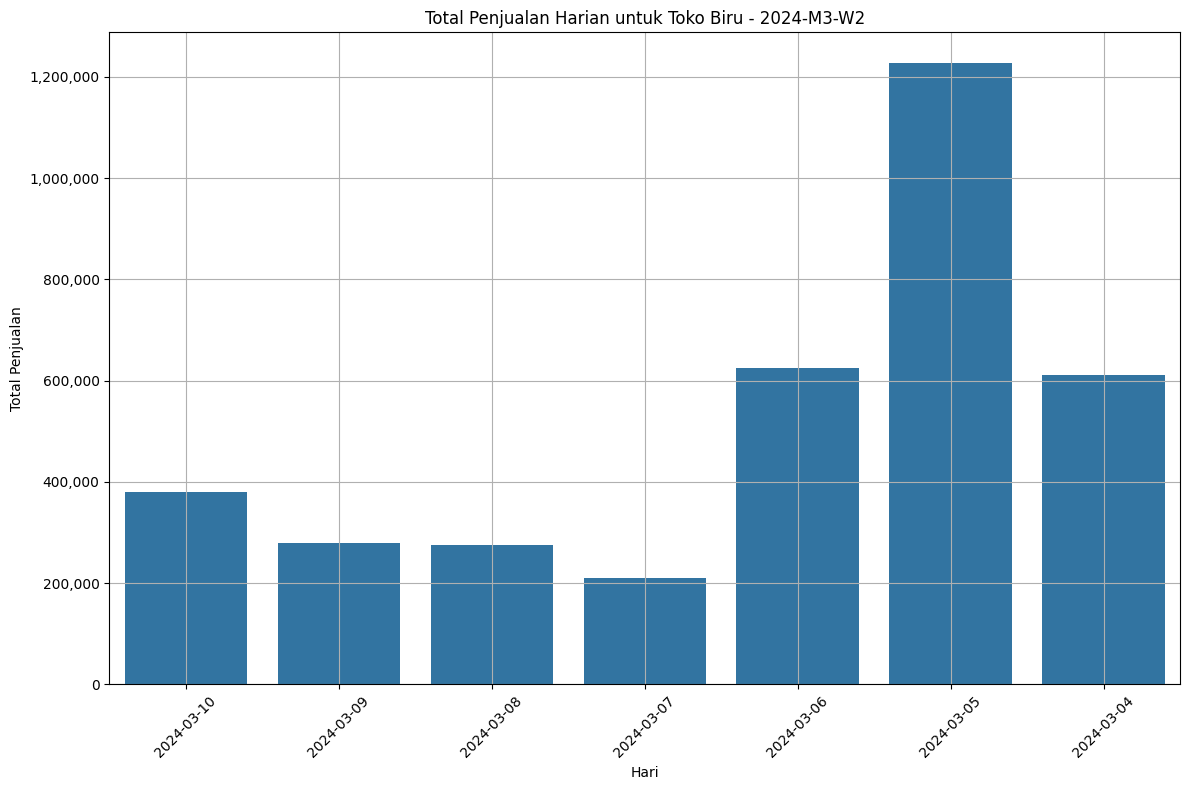

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


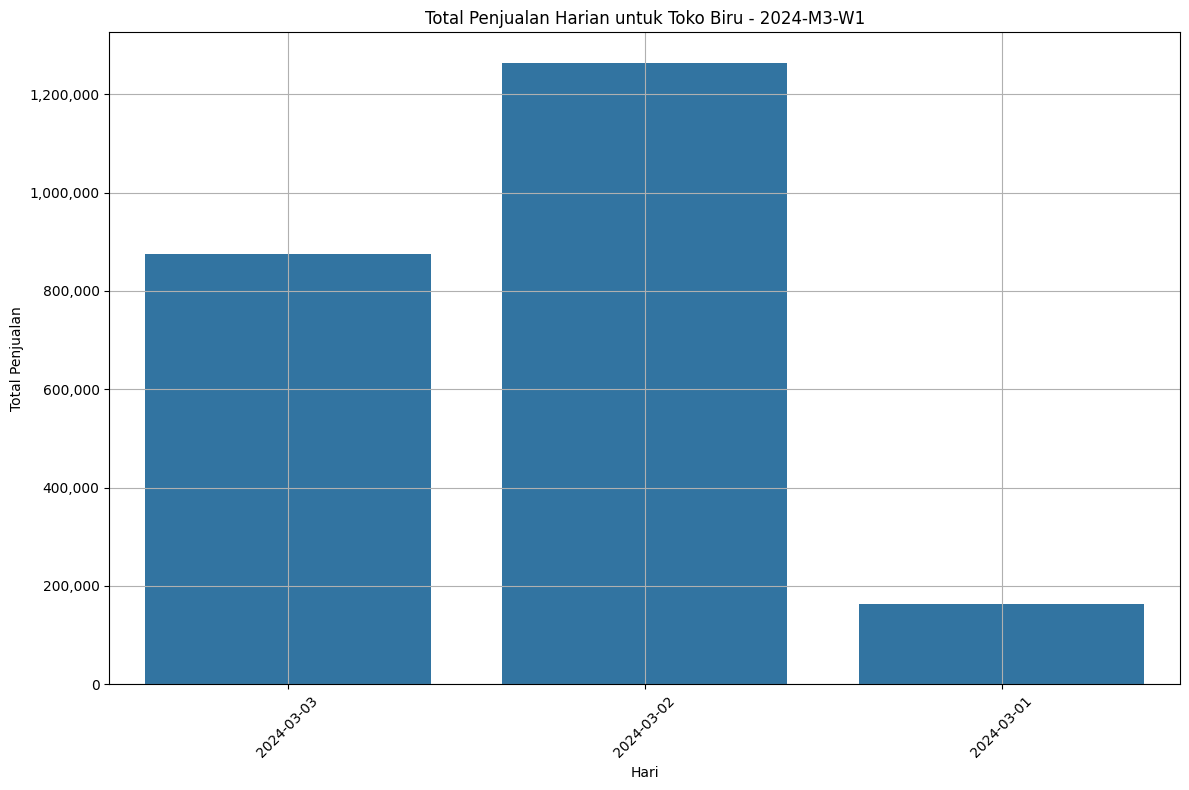

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


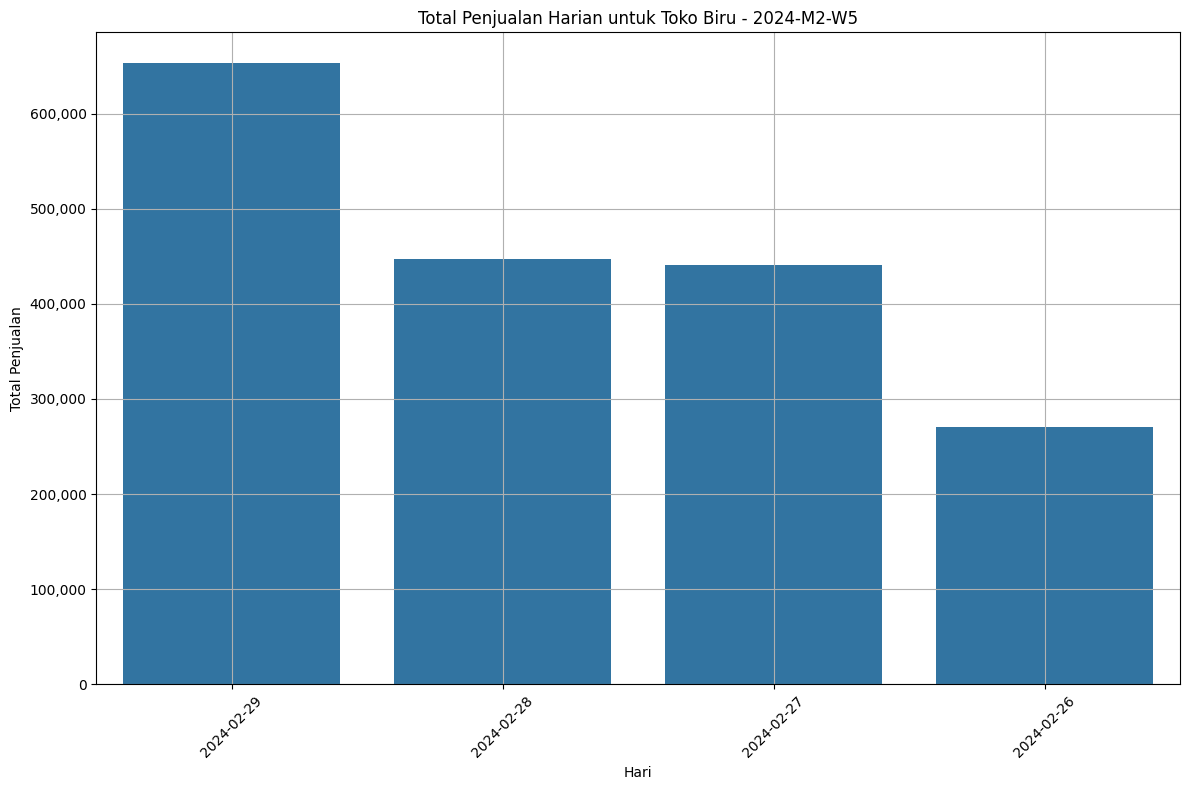

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


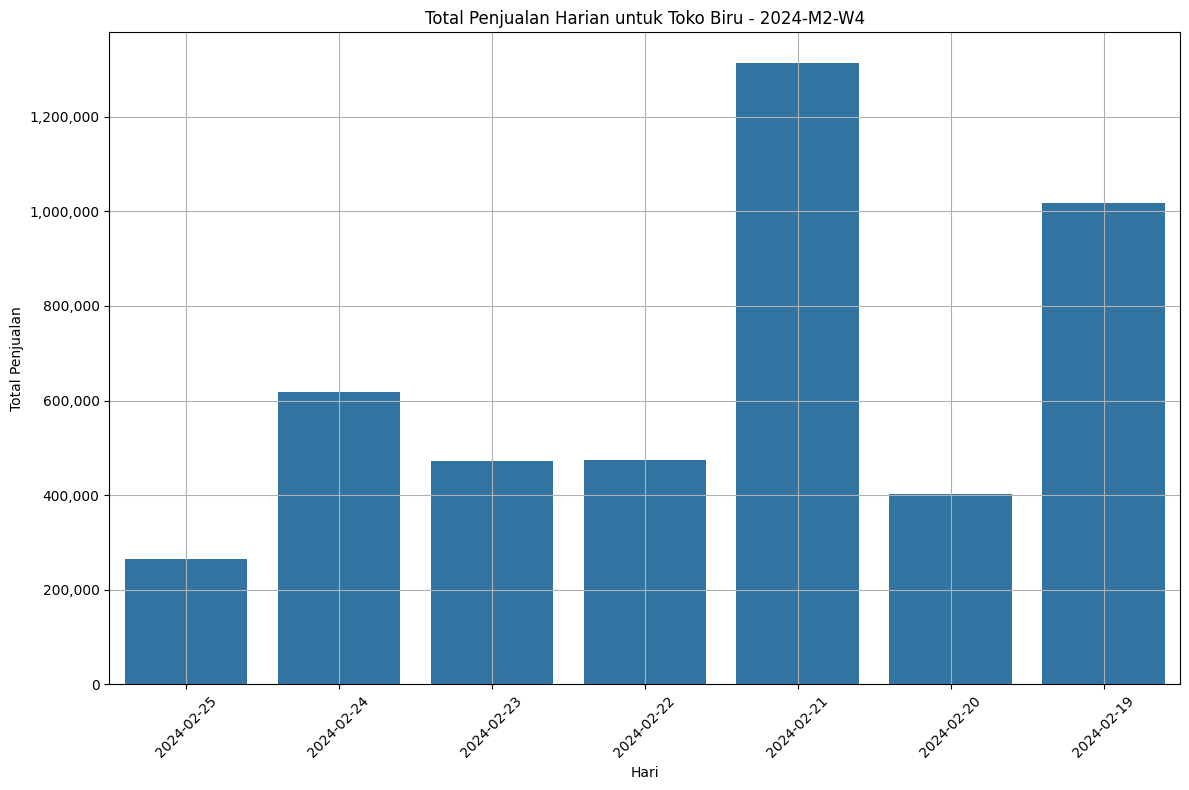

<ipython-input-82-5fd4115f820a>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_subset, x='Day', y='Total', ci=None)


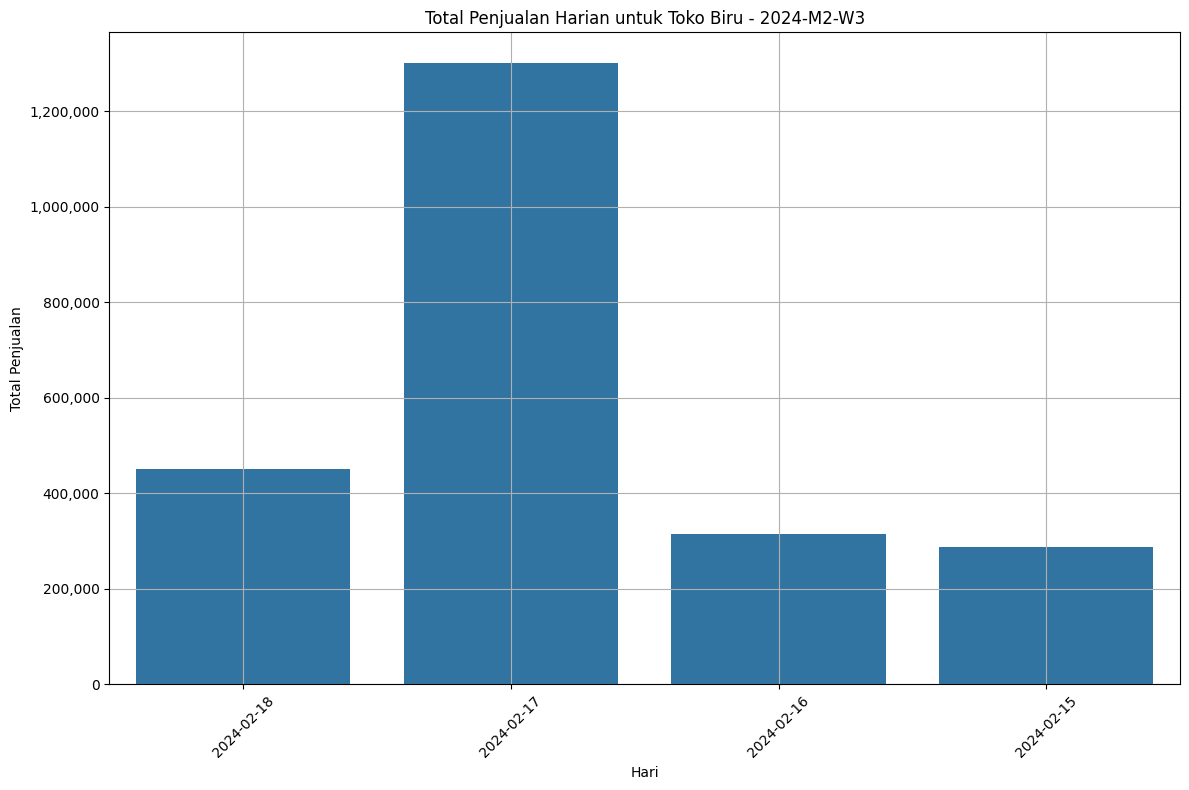

In [ ]:

# Function to format the Y axis
def y_formatter(x, pos):
    return f'{int(x):,}'

# Mendapatkan daftar unik channel dan minggu
channels = df['Channel'].unique()
week_labels = df['MonthWeekLabel'].unique()

# Membuat visualisasi terpisah untuk setiap channel dan setiap minggu
for channel in channels:
    for week_label in week_labels:
        # Memfilter data untuk channel dan minggu tertentu
        data_subset = df[(df['Channel'] == channel) & (df['MonthWeekLabel'] == week_label)]

        # Jika tidak ada data untuk channel dan minggu tertentu, lanjutkan ke iterasi berikutnya
        if data_subset.empty:
            continue

        plt.figure(figsize=(12, 8))
        sns.barplot(data=data_subset, x='Day', y='Total', ci=None)

        # Mengatur title, xlabel, ylabel
        plt.title(f'Total Penjualan Harian untuk {channel} - {week_label}')
        plt.xlabel('Hari')
        plt.ylabel('Total Penjualan')

        # Format y-axis
        plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

        # Rotasi label x-axis untuk tampilan yang lebih baik
        plt.xticks(rotation=45)

        # Menambahkan grid dan layout yang ketat
        plt.grid(True)
        plt.tight_layout()

        # Menampilkan plot
        plt.show()


## BY Harian/Bulan

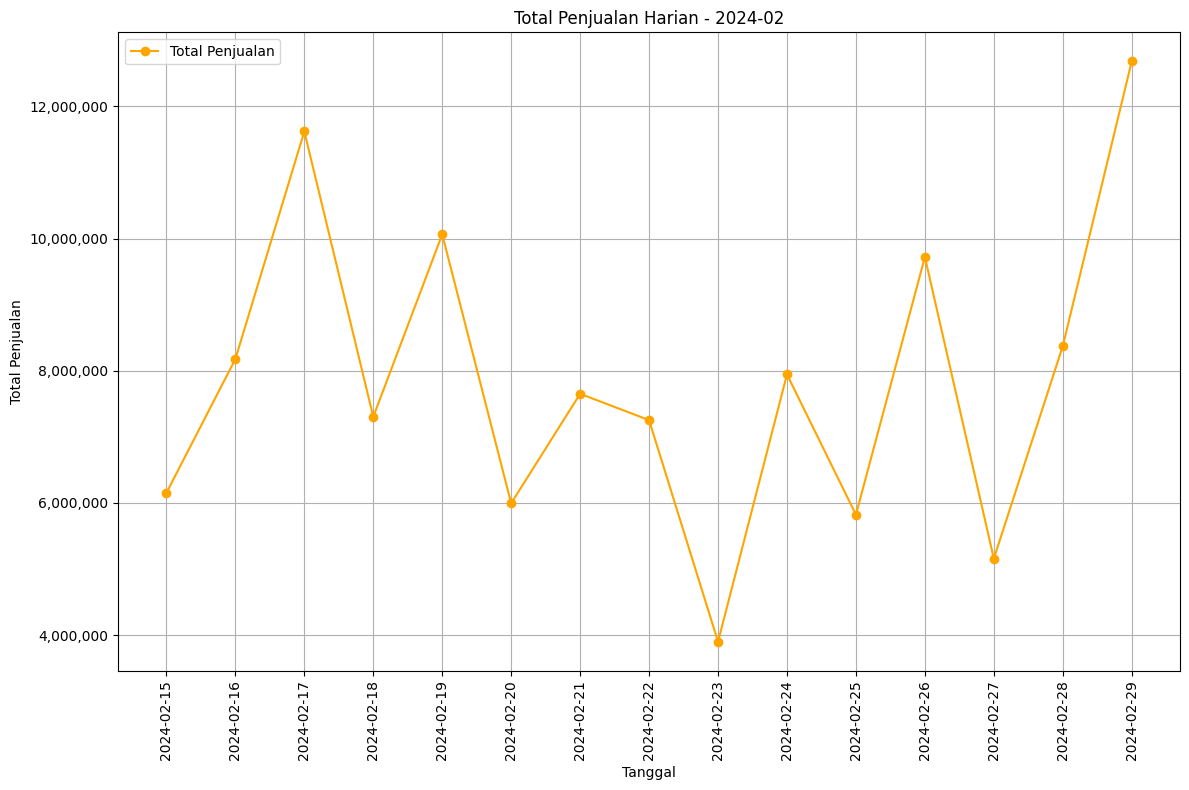

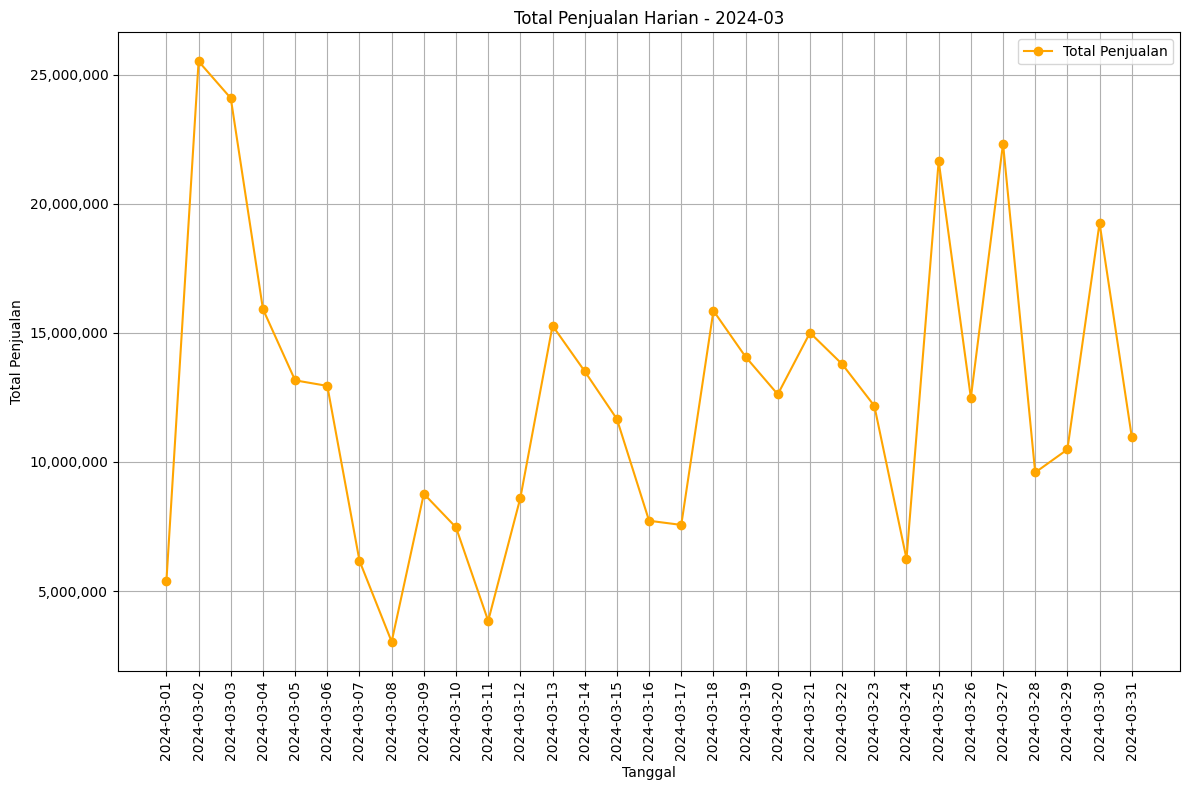

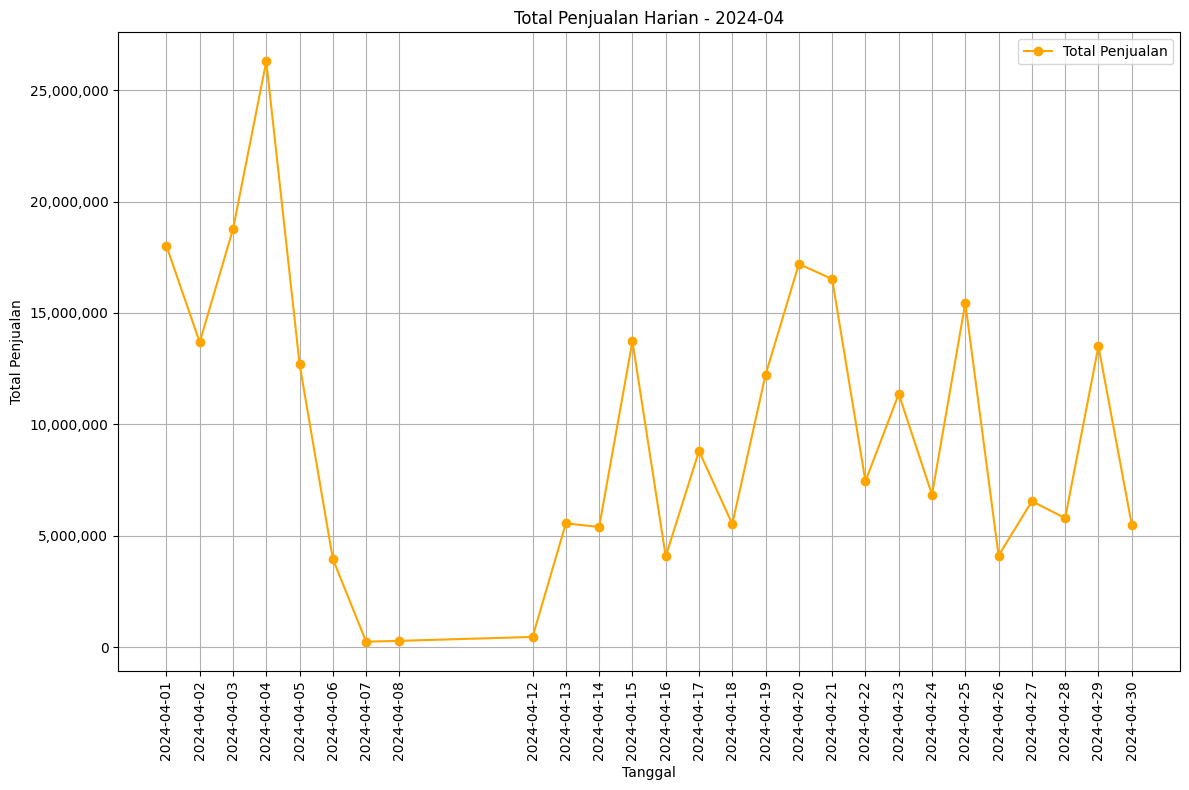

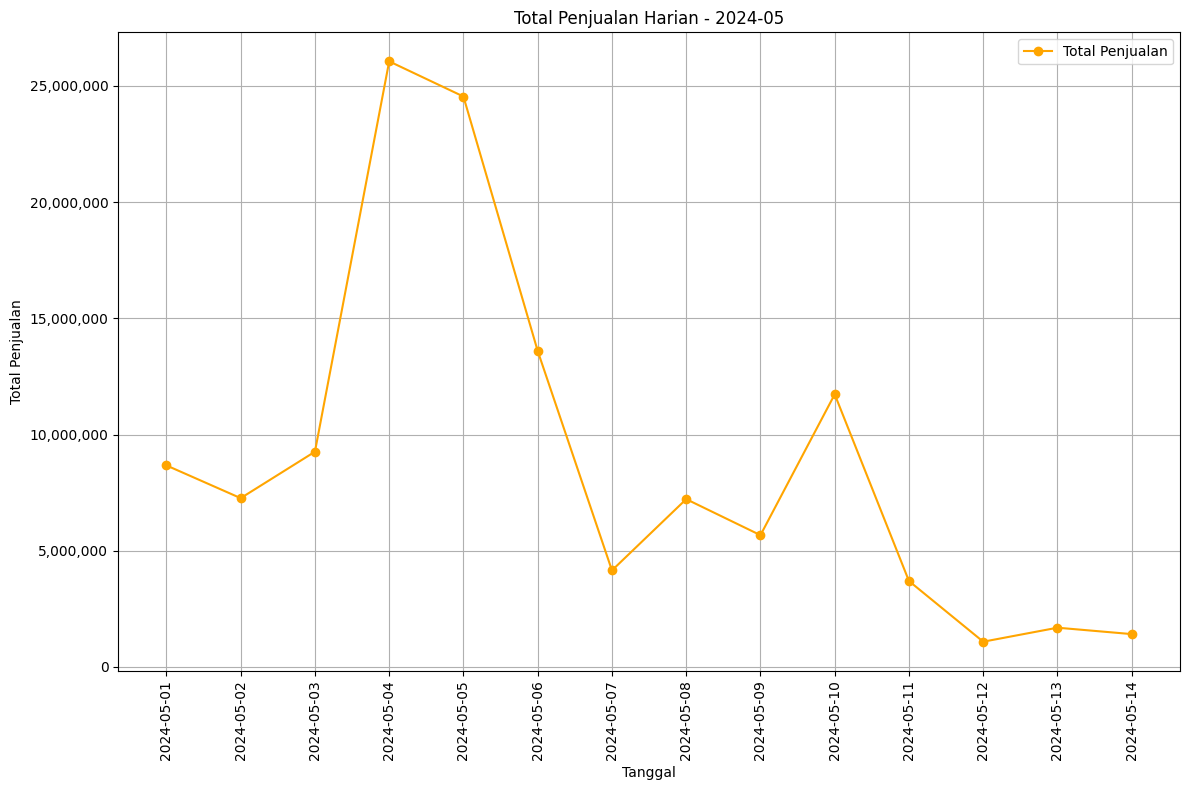

In [ ]:
# Membuat visualisasi gabungan untuk setiap bulan
for month in range(2, 6):  # Loop dari bulan Februari hingga Mei

    # Memfilter data untuk bulan tertentu
    month_data = df[df['Month'] == month]

    # Pengecekan apakah data tidak kosong
    if not month_data.empty:
        # Menentukan bulan dan tahun dari data
        month_year = month_data['Waktu Pembayaran'].dt.to_period('M').iloc[0]

        # Mengelompokkan data berdasarkan tanggal dan menghitung total pendapatan per hari
        daily_sales = month_data.groupby('Day')['Total'].sum()

        # Mengatur ukuran plot
        plt.figure(figsize=(12, 8))

        # Plotting line plot untuk total pendapatan per hari
        plt.plot(daily_sales.index, daily_sales.values, marker='o', color='orange', label='Total Penjualan')

        # Mengatur judul dan label sumbu
        plt.title(f'Total Penjualan Harian - {month_year}')
        plt.xlabel('Tanggal')
        plt.ylabel('Total Penjualan')

        # Mengatur label sumbu x agar setiap tanggal tampil dengan sudut 90 derajat
        plt.xticks(daily_sales.index, rotation=90)

        # Mengatur format sumbu y agar lebih mudah dibaca
        plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

        # Menambahkan legenda
        plt.legend()

        # Menampilkan grid dan layout yang ketat
        plt.grid(True)
        plt.tight_layout()

        # Menampilkan plot
        plt.show()
    else:
        print(f"Tidak ada data untuk bulan {month}")

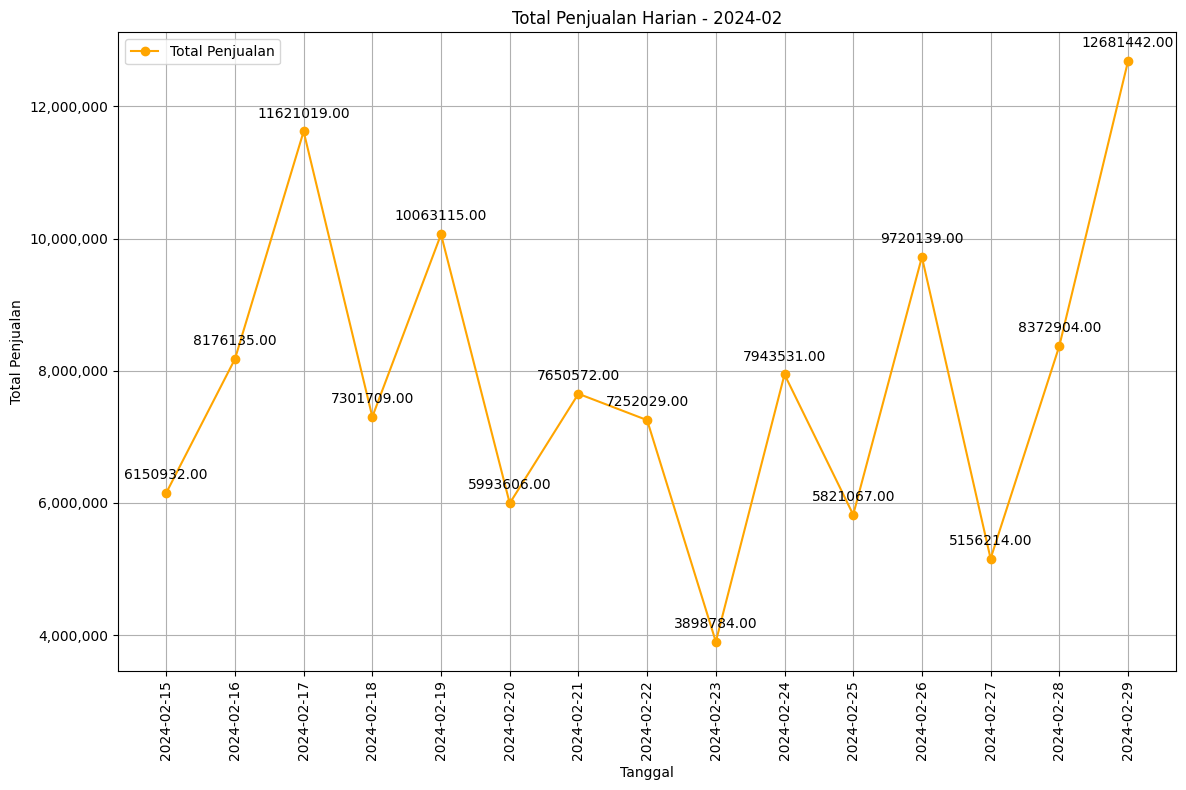

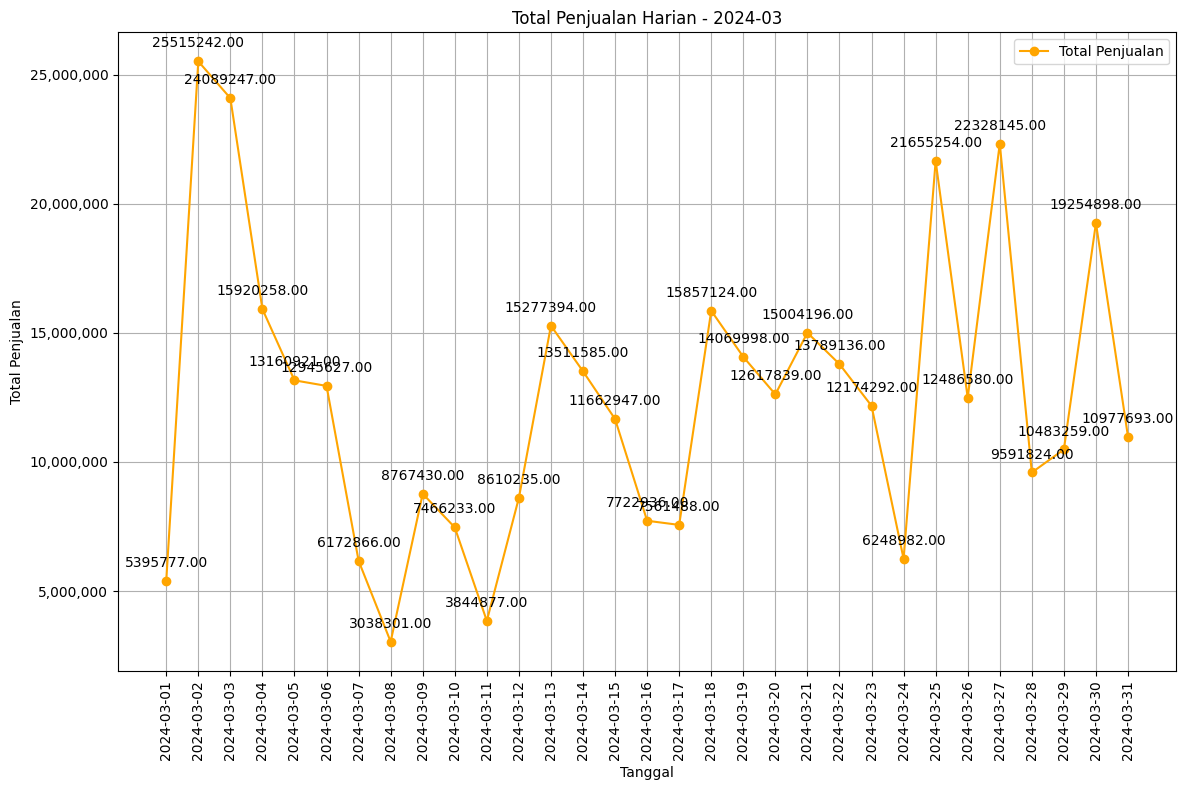

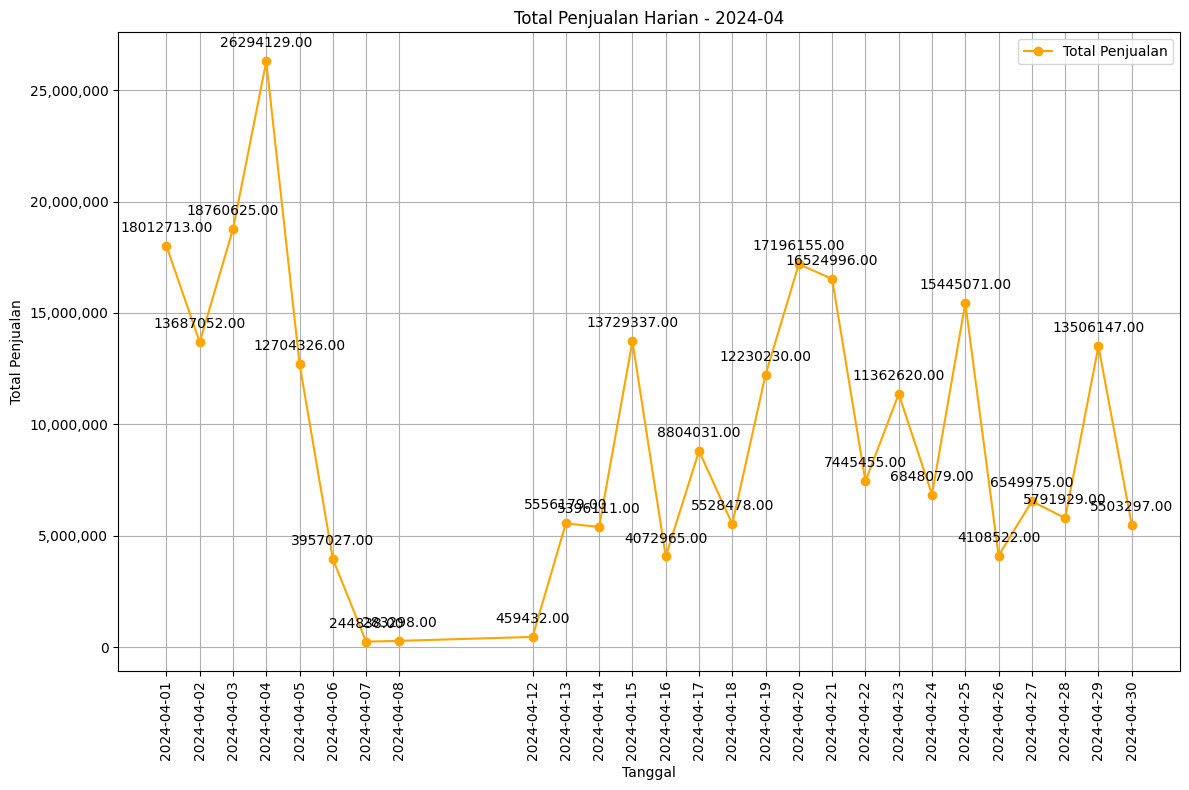

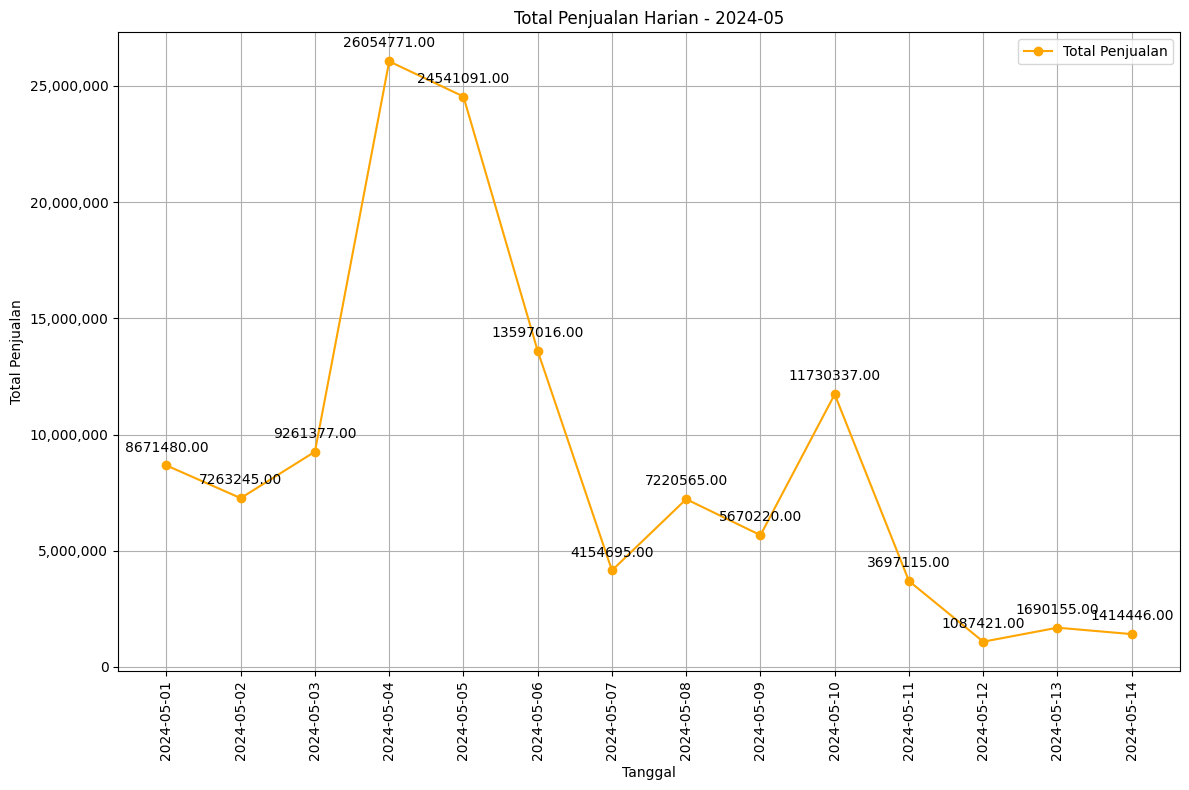

In [ ]:
# Membuat visualisasi gabungan untuk setiap bulan
for month in range(2, 6):  # Loop dari bulan Februari hingga Mei

    # Memfilter data untuk bulan tertentu
    month_data = df[df['Month'] == month]

    # Pengecekan apakah data tidak kosong
    if not month_data.empty:
        # Menentukan bulan dan tahun dari data
        month_year = month_data['Waktu Pembayaran'].dt.to_period('M').iloc[0]

        # Mengelompokkan data berdasarkan tanggal dan menghitung total pendapatan per hari
        daily_sales = month_data.groupby('Day')['Total'].sum()

        # Mengatur ukuran plot
        plt.figure(figsize=(12, 8))

        # Plotting line plot untuk total pendapatan per hari
        line, = plt.plot(daily_sales.index, daily_sales.values, marker='o', color='orange', label='Total Penjualan')

        # Menambahkan angka pasti di atas setiap titik pada plot garis
        for x, y in zip(daily_sales.index, daily_sales.values):
            plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

        # Mengatur judul dan label sumbu
        plt.title(f'Total Penjualan Harian - {month_year}')
        plt.xlabel('Tanggal')
        plt.ylabel('Total Penjualan')

        # Mengatur label sumbu x agar setiap tanggal tampil dengan sudut 90 derajat
        plt.xticks(daily_sales.index, rotation=90)

        # Mengatur format sumbu y agar lebih mudah dibaca
        plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

        # Menambahkan legenda
        plt.legend(handles=[line])

        # Menampilkan grid dan layout yang ketat
        plt.grid(True)
        plt.tight_layout()

        # Menampilkan plot
        plt.show()
    else:
        print(f"Tidak ada data untuk bulan {month}")


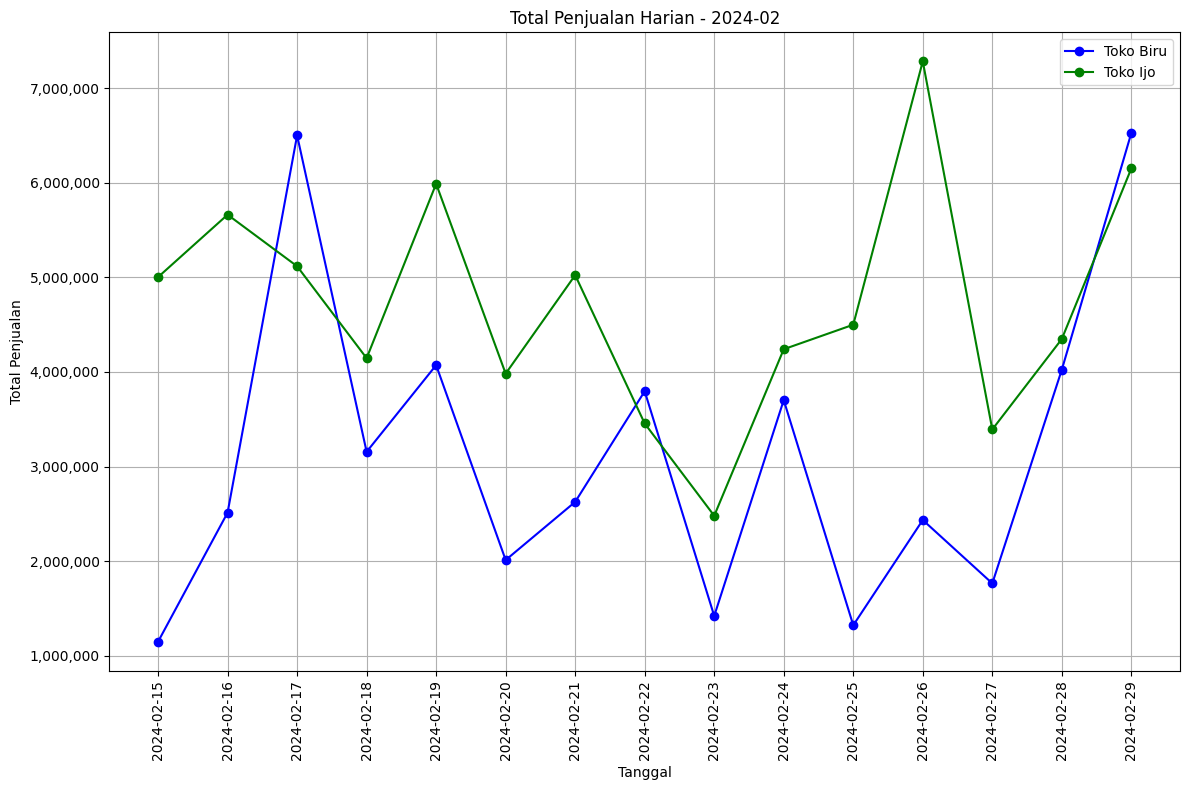

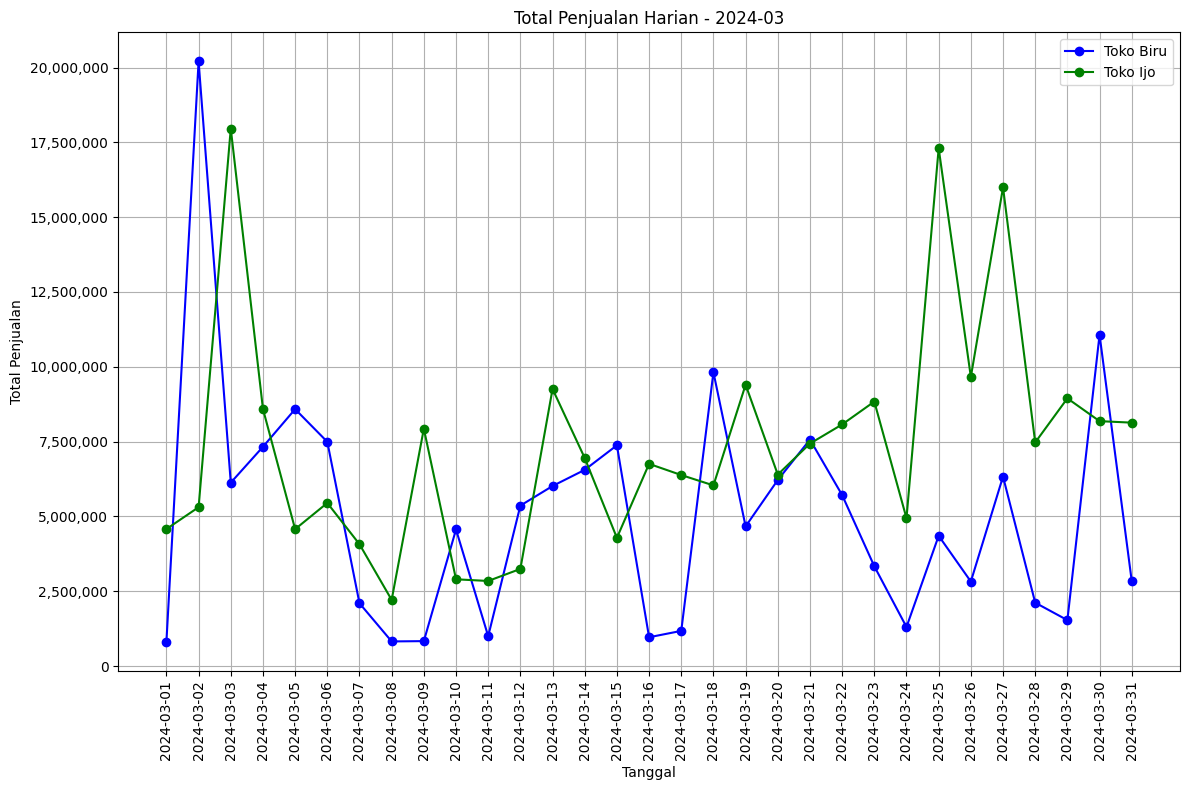

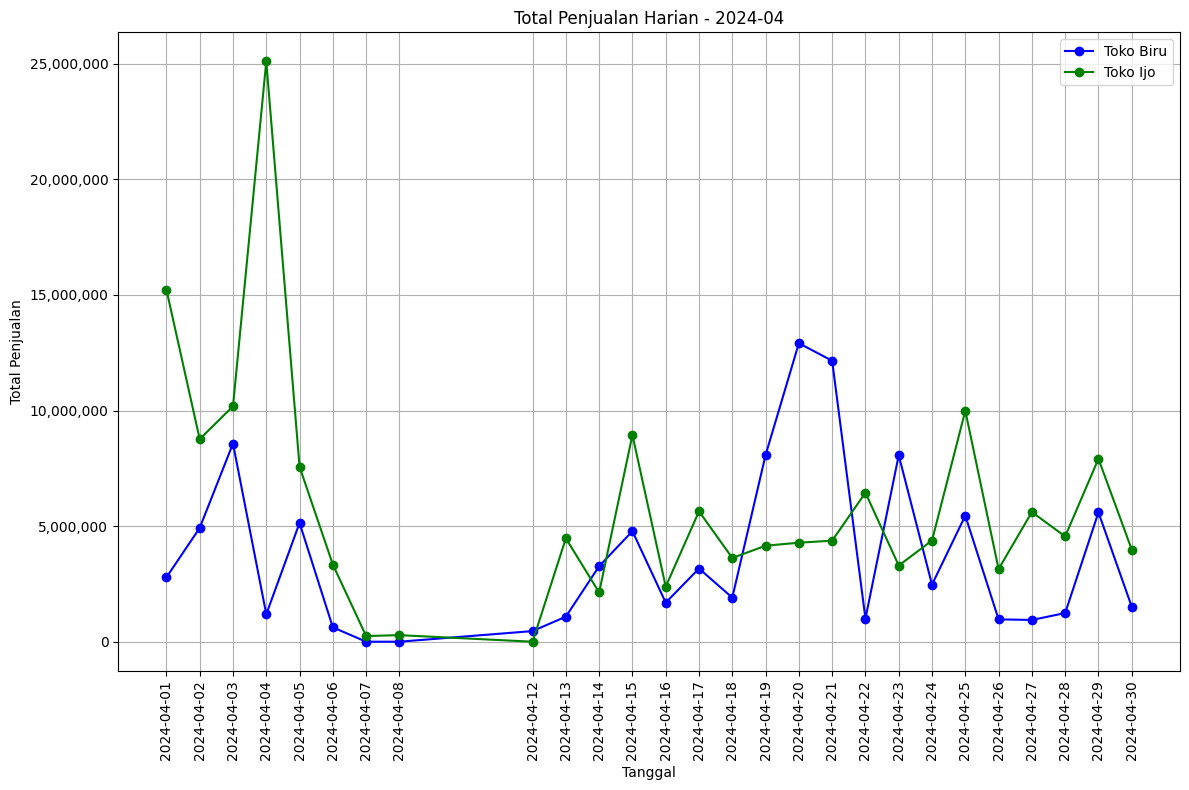

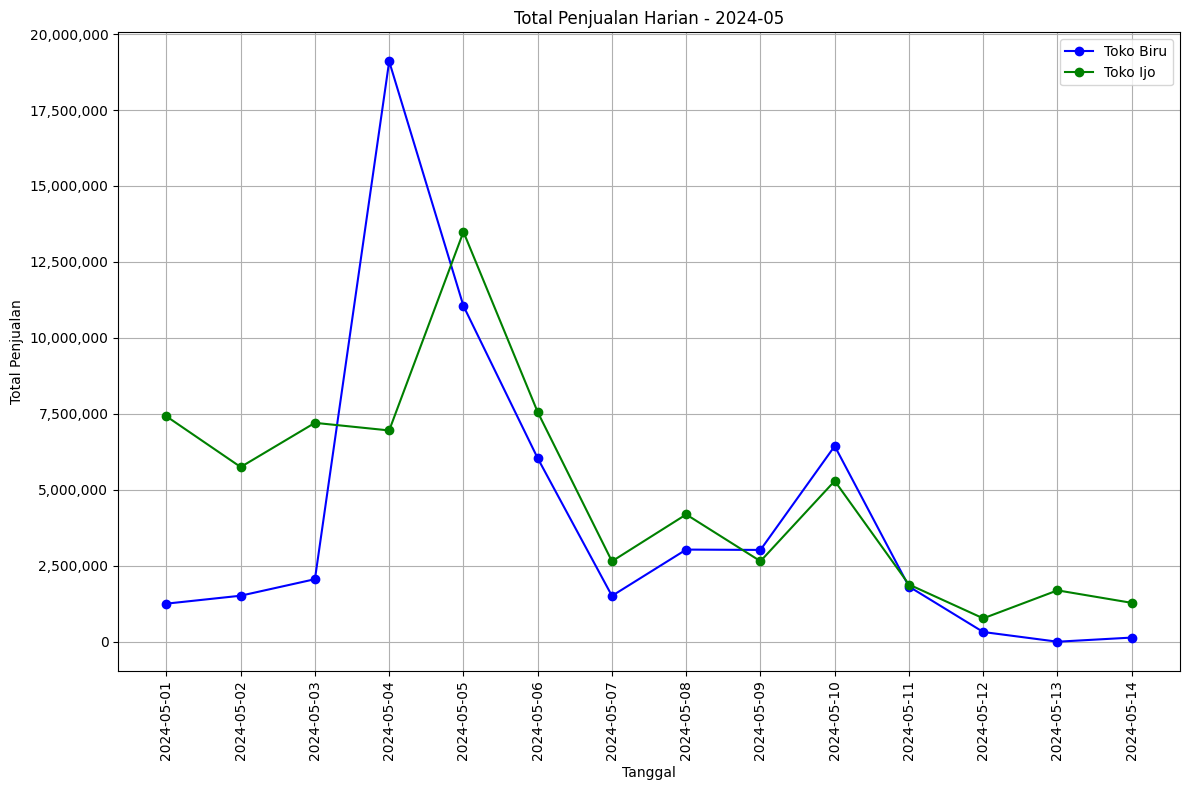

In [ ]:

# Membuat visualisasi gabungan untuk setiap bulan
for month in range(2, 6):  # Loop dari bulan Februari hingga Mei

    # Memfilter data untuk bulan tertentu
    month_data = df[df['Month'] == month]

    # Pengecekan apakah data tidak kosong
    if not month_data.empty:
        # Menentukan bulan dan tahun dari data
        month_year = month_data['Waktu Pembayaran'].dt.to_period('M').iloc[0]

        # Mengelompokkan data berdasarkan tanggal dan channel, lalu menghitung total pendapatan per hari per channel
        daily_sales = month_data.groupby(['Day', 'Channel'])['Total'].sum().unstack(fill_value=0)

        # Mengatur ukuran plot
        plt.figure(figsize=(12, 8))

        # Plotting line plot untuk total pendapatan per hari
        plt.plot(daily_sales.index, daily_sales['Toko Biru'], marker='o', color='blue', label='Toko Biru')
        plt.plot(daily_sales.index, daily_sales['Toko Ijo'], marker='o', color='green', label='Toko Ijo')

        # Mengatur judul dan label sumbu
        plt.title(f'Total Penjualan Harian - {month_year}')
        plt.xlabel('Tanggal')
        plt.ylabel('Total Penjualan')

        # Mengatur label sumbu x agar setiap tanggal tampil dengan sudut 90 derajat
        plt.xticks(daily_sales.index, rotation=90)

        # Mengatur format sumbu y agar lebih mudah dibaca
        plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

        # Menambahkan legenda
        plt.legend()

        # Menampilkan grid dan layout yang ketat
        plt.grid(True)
        plt.tight_layout()

        # Menampilkan plot
        plt.show()
    else:
        print(f"Tidak ada data untuk bulan {month}")


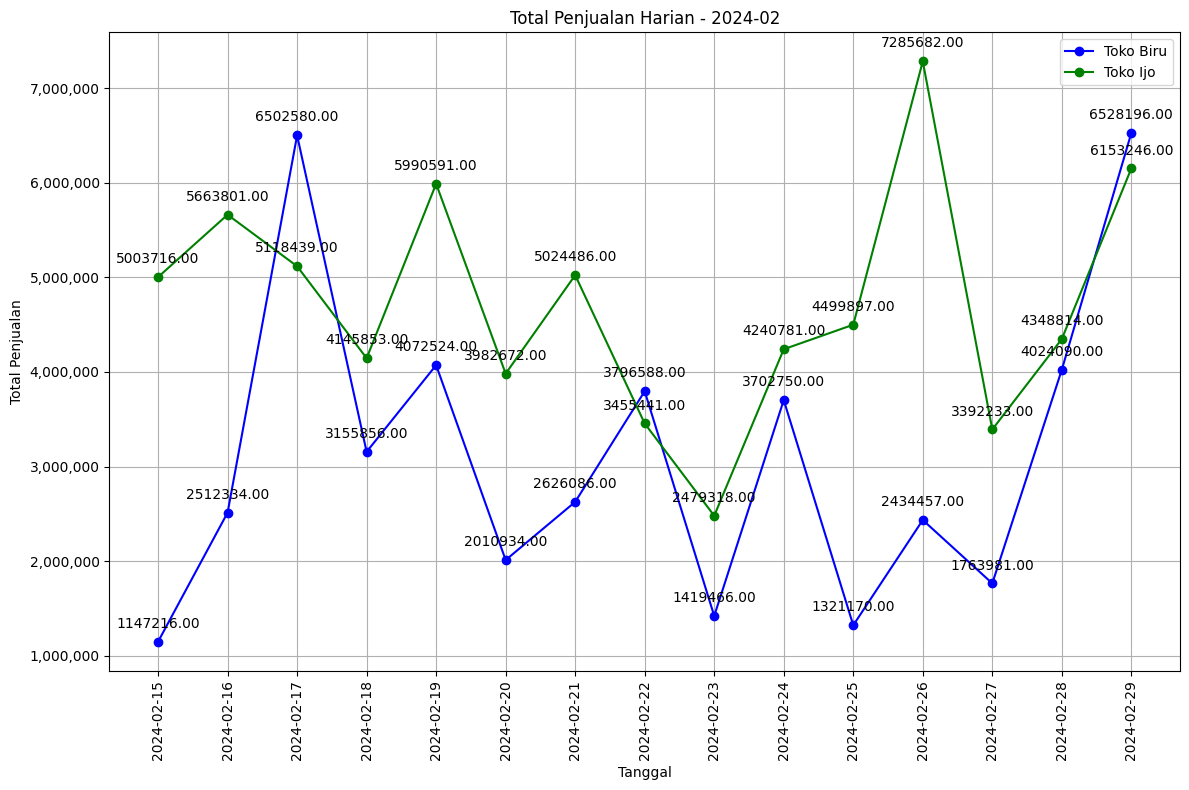

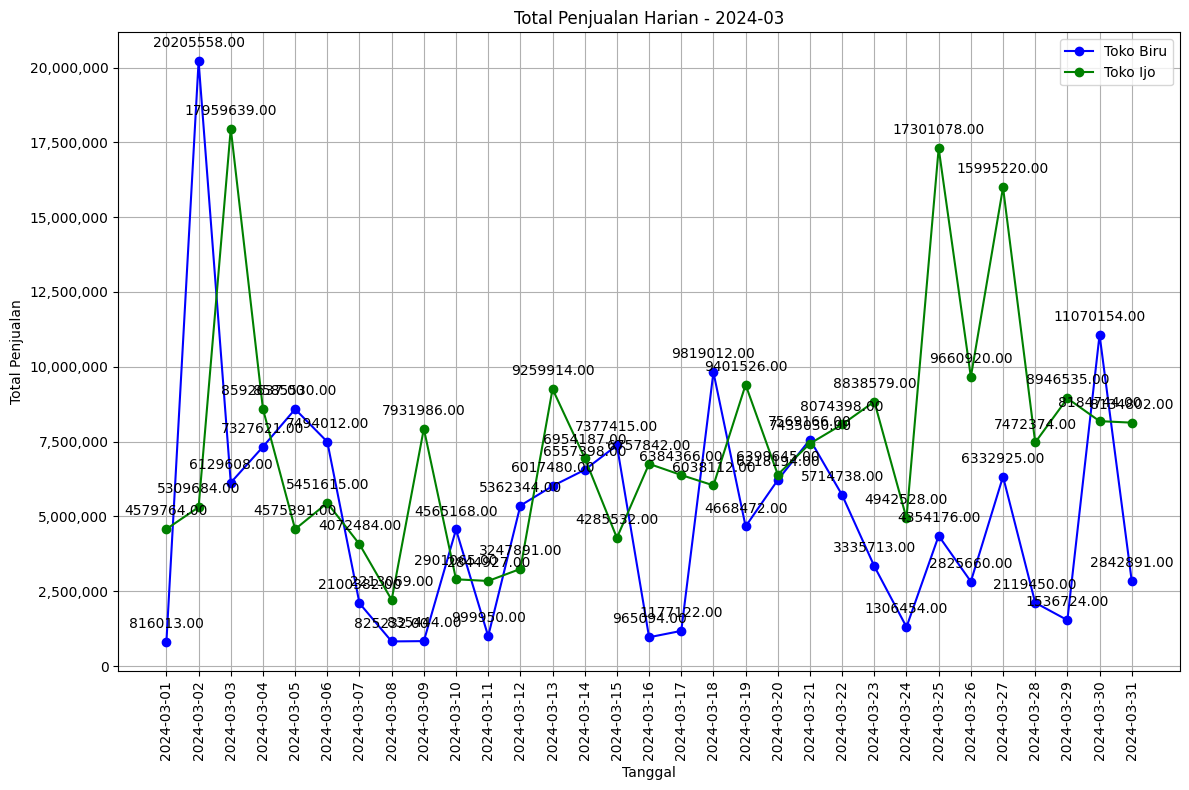

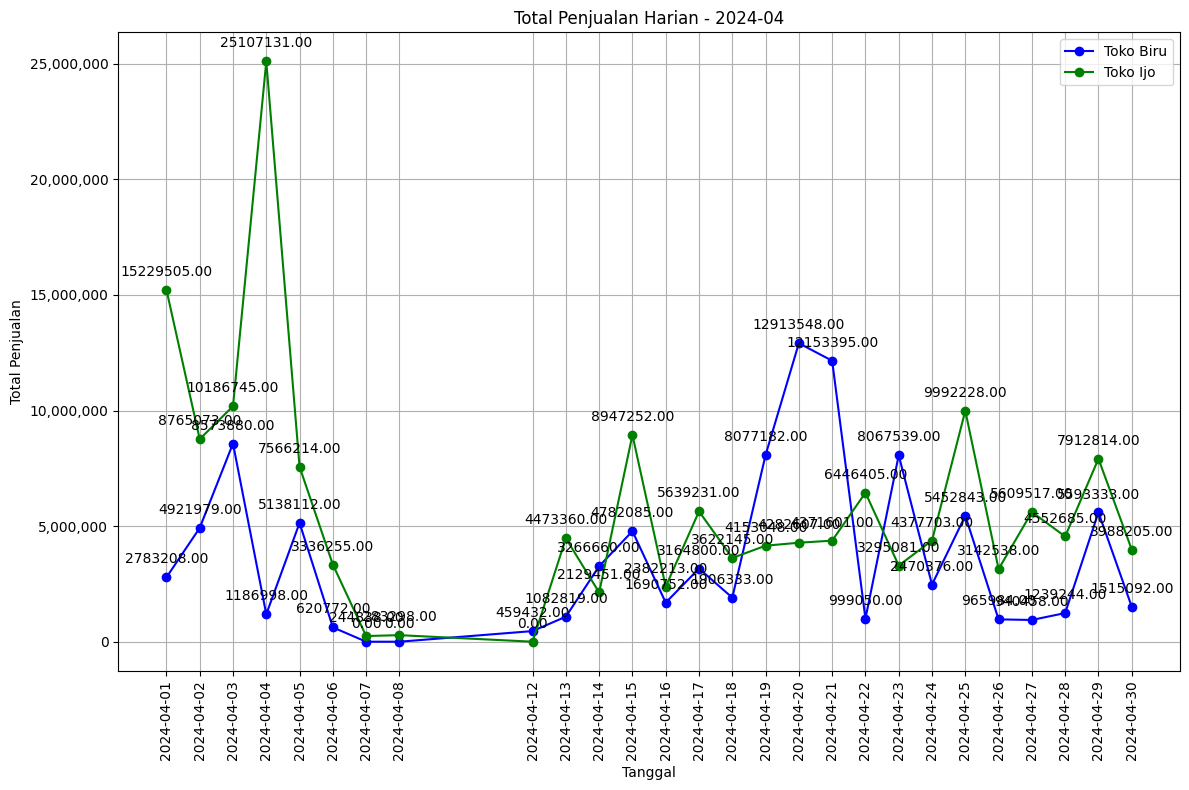

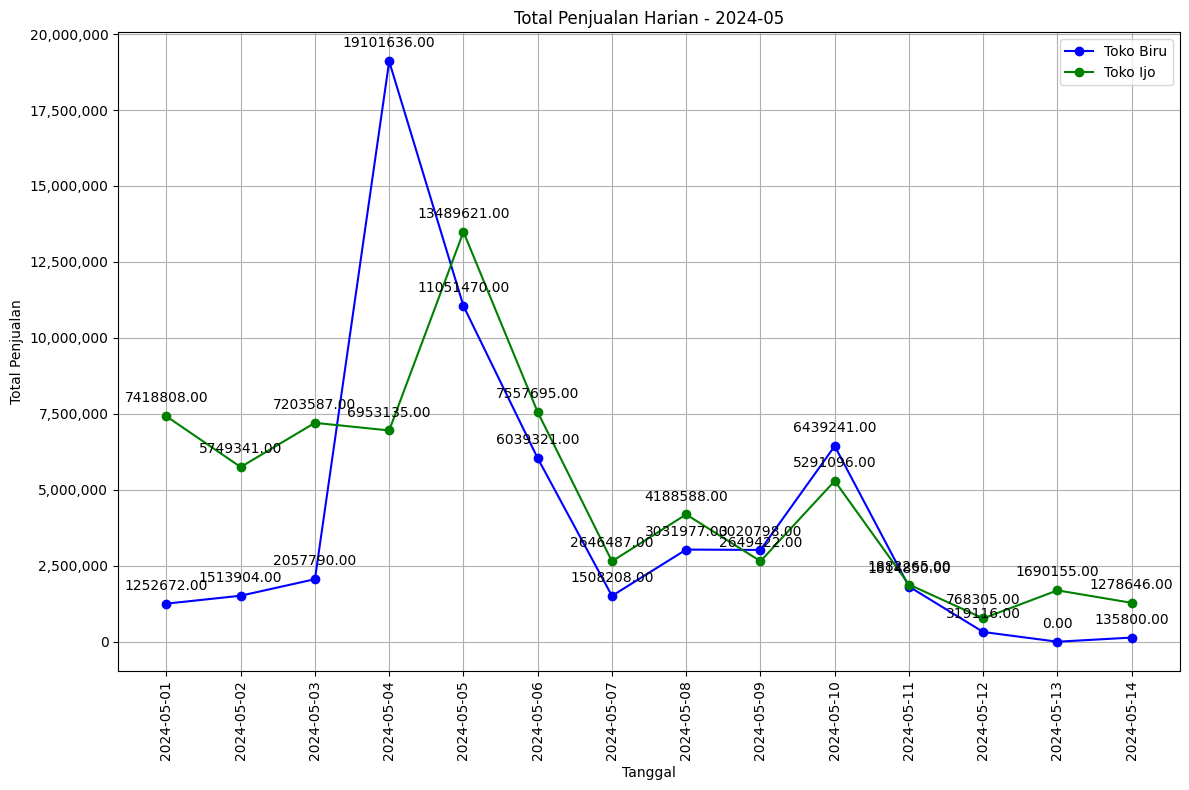

In [ ]:
# Membuat visualisasi gabungan untuk setiap bulan
for month in range(2, 6):  # Loop dari bulan Februari hingga Mei

    # Memfilter data untuk bulan tertentu
    month_data = df[df['Month'] == month]

    # Pengecekan apakah data tidak kosong
    if not month_data.empty:
        # Menentukan bulan dan tahun dari data
        month_year = month_data['Waktu Pembayaran'].dt.to_period('M').iloc[0]

        # Mengelompokkan data berdasarkan tanggal dan channel, lalu menghitung total pendapatan per hari per channel
        daily_sales = month_data.groupby(['Day', 'Channel'])['Total'].sum().unstack(fill_value=0)

        # Mengatur ukuran plot
        plt.figure(figsize=(12, 8))

        # Plotting line plot untuk total pendapatan per hari
        line1, = plt.plot(daily_sales.index, daily_sales['Toko Biru'], marker='o', color='blue', label='Toko Biru')
        line2, = plt.plot(daily_sales.index, daily_sales['Toko Ijo'], marker='o', color='green', label='Toko Ijo')

        # Menambahkan angka pasti di atas setiap titik pada plot garis
        for x, y in zip(daily_sales.index, daily_sales['Toko Biru']):
            plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

        for x, y in zip(daily_sales.index, daily_sales['Toko Ijo']):
            plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

        # Mengatur judul dan label sumbu
        plt.title(f'Total Penjualan Harian - {month_year}')
        plt.xlabel('Tanggal')
        plt.ylabel('Total Penjualan')

        # Mengatur label sumbu x agar setiap tanggal tampil dengan sudut 90 derajat
        plt.xticks(daily_sales.index, rotation=90)

        # Mengatur format sumbu y agar lebih mudah dibaca
        plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

        # Menambahkan legenda
        plt.legend(handles=[line1, line2])

        # Menampilkan grid dan layout yang ketat
        plt.grid(True)
        plt.tight_layout()

        # Menampilkan plot
        plt.show()
    else:
        print(f"Tidak ada data untuk bulan {month}")


## BY Waktu/Jam

In [ ]:
# Definisikan range waktu
time_ranges = {
    '00.01 - 03.00': range(0, 4),
    '03.01 - 06.00': range(4, 7),
    '06.01 - 09.00': range(7, 10),
    '09.01 - 12.00': range(10, 13),
    '12.01 - 15.00': range(13, 16),
    '15.01 - 18.00': range(16, 19),
    '18.01 - 21.00': range(19, 22),
    '21.01 - 00.00': range(22, 24),
}


### Jumlah Pelanggan Yang Beli

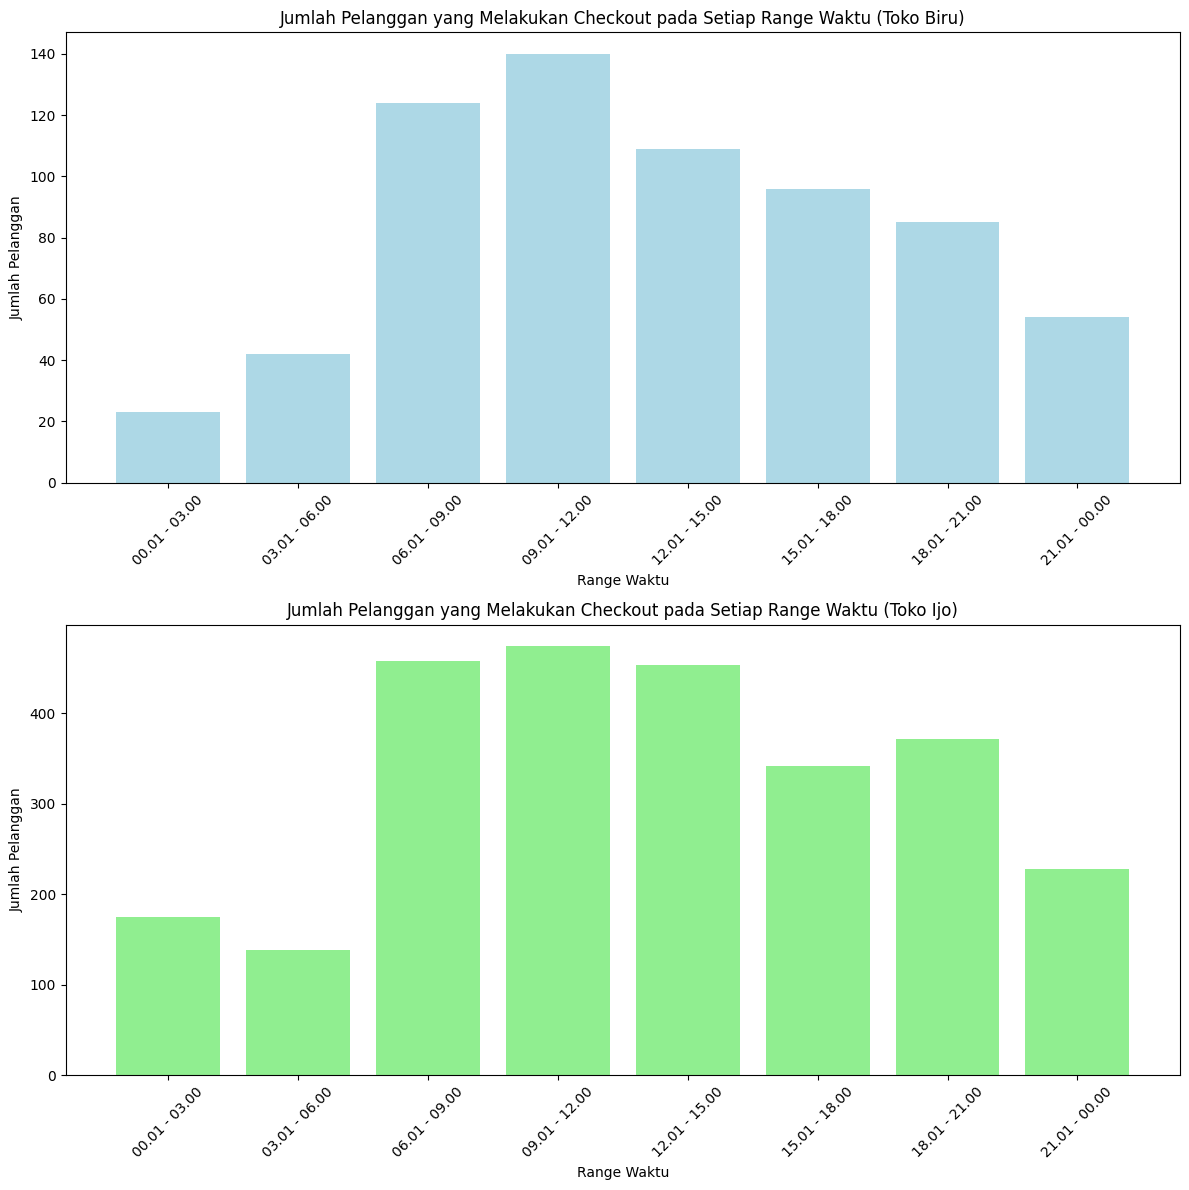

In [ ]:
# Inisialisasi dictionary untuk menyimpan jumlah pelanggan pada setiap range jam untuk masing-masing channel
checkout_counts_blue = {time_range: 0 for time_range in time_ranges}
checkout_counts_green = {time_range: 0 for time_range in time_ranges}

# Menghitung jumlah pelanggan pada setiap range jam untuk masing-masing channel
for hour, minute, channel in zip(df['Hour'], df['Minute'], df['Channel']):
    for time_range, hours_range in time_ranges.items():
        if hour in hours_range:
            if channel == 'Toko Biru':
                checkout_counts_blue[time_range] += 1
            elif channel == 'Toko Ijo':
                checkout_counts_green[time_range] += 1
            break

# Membuat visualisasi dengan subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Visualisasi untuk Toko Biru
axes[0].bar(checkout_counts_blue.keys(), checkout_counts_blue.values(), color='lightblue')
axes[0].set_title('Jumlah Pelanggan yang Melakukan Checkout pada Setiap Range Waktu (Toko Biru)')
axes[0].set_xlabel('Range Waktu')
axes[0].set_ylabel('Jumlah Pelanggan')
axes[0].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Visualisasi untuk Toko Ijo
axes[1].bar(checkout_counts_green.keys(), checkout_counts_green.values(), color='lightgreen')
axes[1].set_title('Jumlah Pelanggan yang Melakukan Checkout pada Setiap Range Waktu (Toko Ijo)')
axes[1].set_xlabel('Range Waktu')
axes[1].set_ylabel('Jumlah Pelanggan')
axes[1].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

plt.tight_layout()
plt.show()


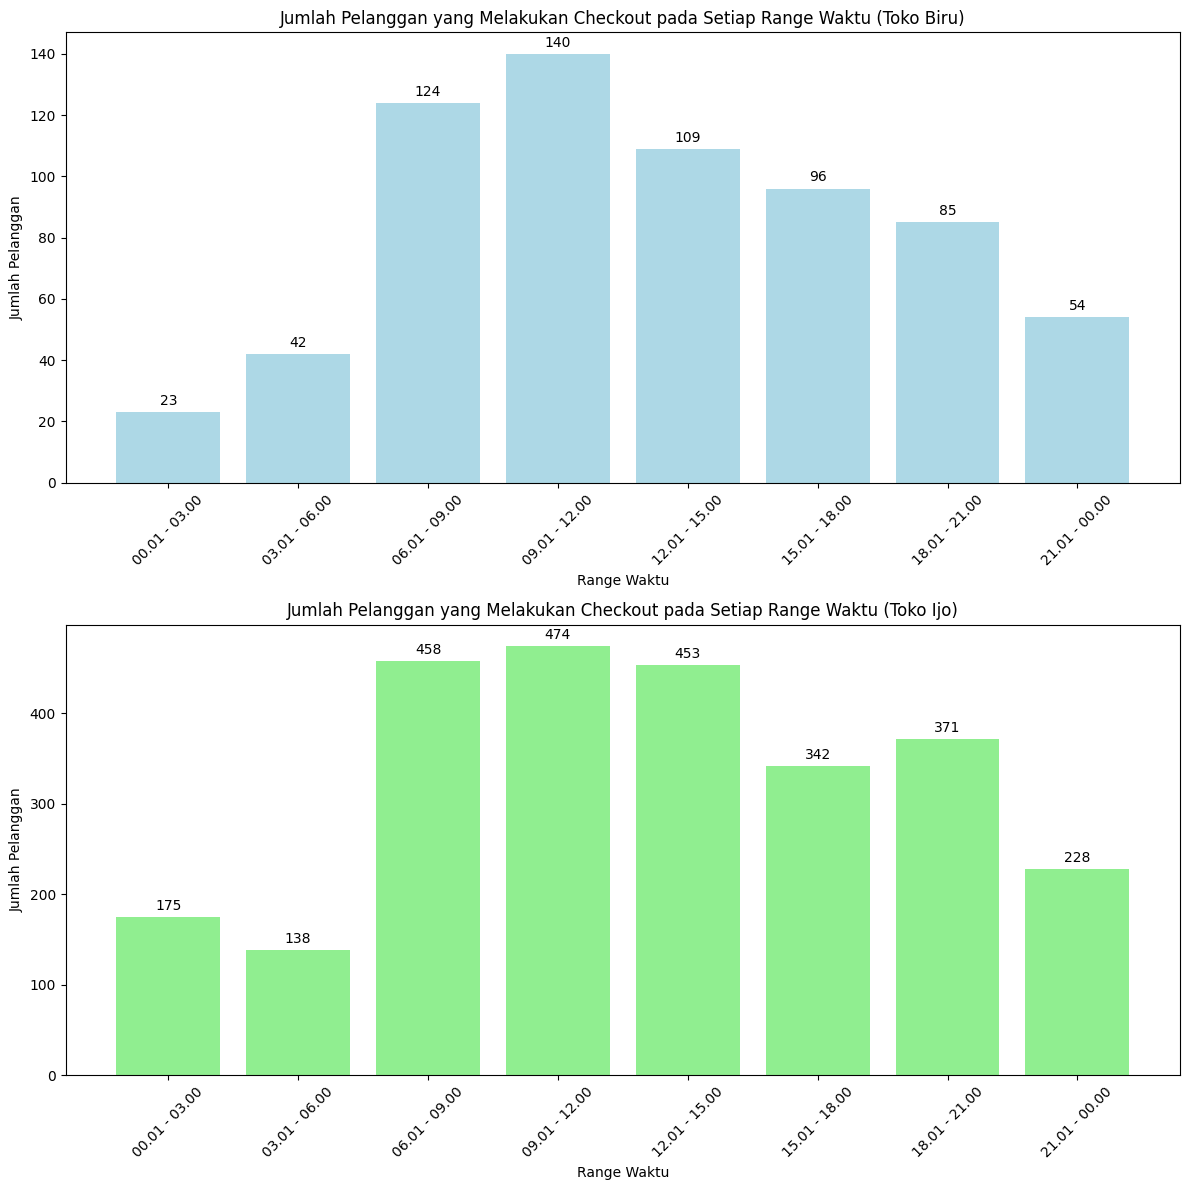

In [ ]:
# Inisialisasi dictionary untuk menyimpan jumlah pelanggan pada setiap range jam untuk masing-masing channel
checkout_counts_blue = {time_range: 0 for time_range in time_ranges}
checkout_counts_green = {time_range: 0 for time_range in time_ranges}

# Menghitung jumlah pelanggan pada setiap range jam untuk masing-masing channel
for hour, minute, channel in zip(df['Hour'], df['Minute'], df['Channel']):
    for time_range, hours_range in time_ranges.items():
        if hour in hours_range:
            if channel == 'Toko Biru':
                checkout_counts_blue[time_range] += 1
            elif channel == 'Toko Ijo':
                checkout_counts_green[time_range] += 1
            break

# Membuat visualisasi dengan subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Visualisasi untuk Toko Biru
bars_blue = axes[0].bar(checkout_counts_blue.keys(), checkout_counts_blue.values(), color='lightblue')
axes[0].set_title('Jumlah Pelanggan yang Melakukan Checkout pada Setiap Range Waktu (Toko Biru)')
axes[0].set_xlabel('Range Waktu')
axes[0].set_ylabel('Jumlah Pelanggan')
axes[0].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Menambahkan angka pasti di atas setiap batang pada plot bar untuk Toko Biru
for bar in bars_blue:
    height = bar.get_height()
    axes[0].annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

# Visualisasi untuk Toko Ijo
bars_green = axes[1].bar(checkout_counts_green.keys(), checkout_counts_green.values(), color='lightgreen')
axes[1].set_title('Jumlah Pelanggan yang Melakukan Checkout pada Setiap Range Waktu (Toko Ijo)')
axes[1].set_xlabel('Range Waktu')
axes[1].set_ylabel('Jumlah Pelanggan')
axes[1].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Menambahkan angka pasti di atas setiap batang pada plot bar untuk Toko Ijo
for bar in bars_green:
    height = bar.get_height()
    axes[1].annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Jumlah Pendapatan Tiap Jam

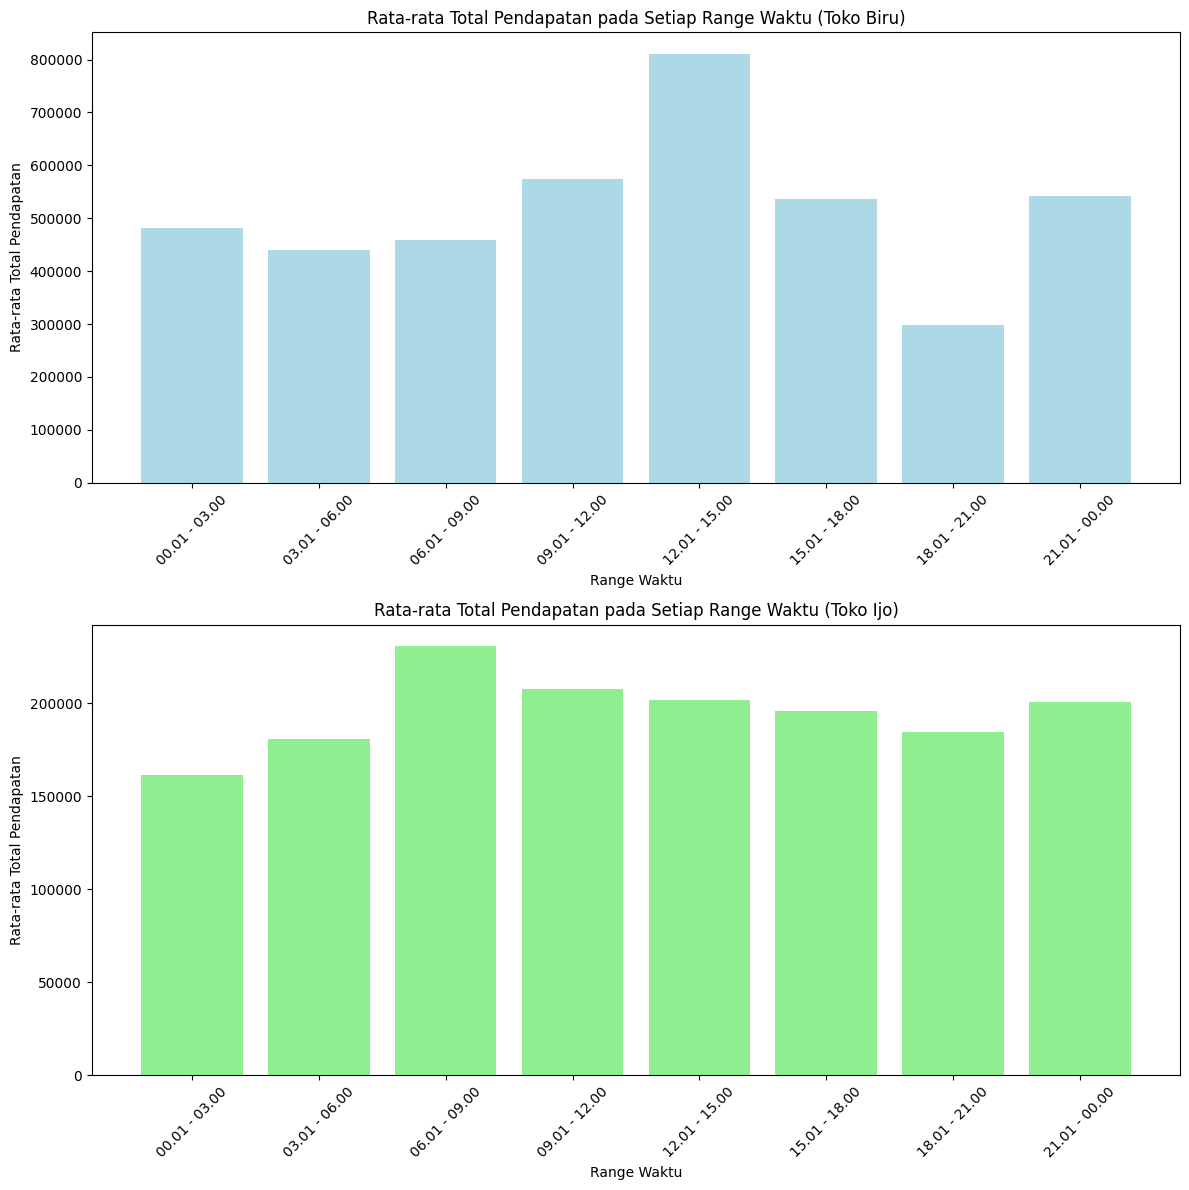

In [ ]:
# Inisialisasi dictionary untuk menyimpan total pendapatan pada setiap range jam untuk setiap channel
total_sales_blue = {time_range: [] for time_range in time_ranges}
total_sales_green = {time_range: [] for time_range in time_ranges}

# Mengumpulkan total pendapatan pada setiap range jam untuk setiap channel
for hour, minute, total, channel in zip(df['Hour'], df['Minute'], df['Total'], df['Channel']):
    for time_range, hours_range in time_ranges.items():
        if hour in hours_range:
            if channel == 'Toko Biru':
                total_sales_blue[time_range].append(total)
            elif channel == 'Toko Ijo':
                total_sales_green[time_range].append(total)
            break

# Menghitung rata-rata total pendapatan pada setiap range jam untuk setiap channel
average_sales_blue = {time_range: np.mean(sales) for time_range, sales in total_sales_blue.items()}
average_sales_green = {time_range: np.mean(sales) for time_range, sales in total_sales_green.items()}

# Membuat visualisasi dengan subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Visualisasi untuk Toko Biru
axes[0].bar(average_sales_blue.keys(), average_sales_blue.values(), color='lightblue')
axes[0].set_title('Rata-rata Total Pendapatan pada Setiap Range Waktu (Toko Biru)')
axes[0].set_xlabel('Range Waktu')
axes[0].set_ylabel('Rata-rata Total Pendapatan')
axes[0].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Visualisasi untuk Toko Ijo
axes[1].bar(average_sales_green.keys(), average_sales_green.values(), color='lightgreen')
axes[1].set_title('Rata-rata Total Pendapatan pada Setiap Range Waktu (Toko Ijo)')
axes[1].set_xlabel('Range Waktu')
axes[1].set_ylabel('Rata-rata Total Pendapatan')
axes[1].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

plt.tight_layout()
plt.show()


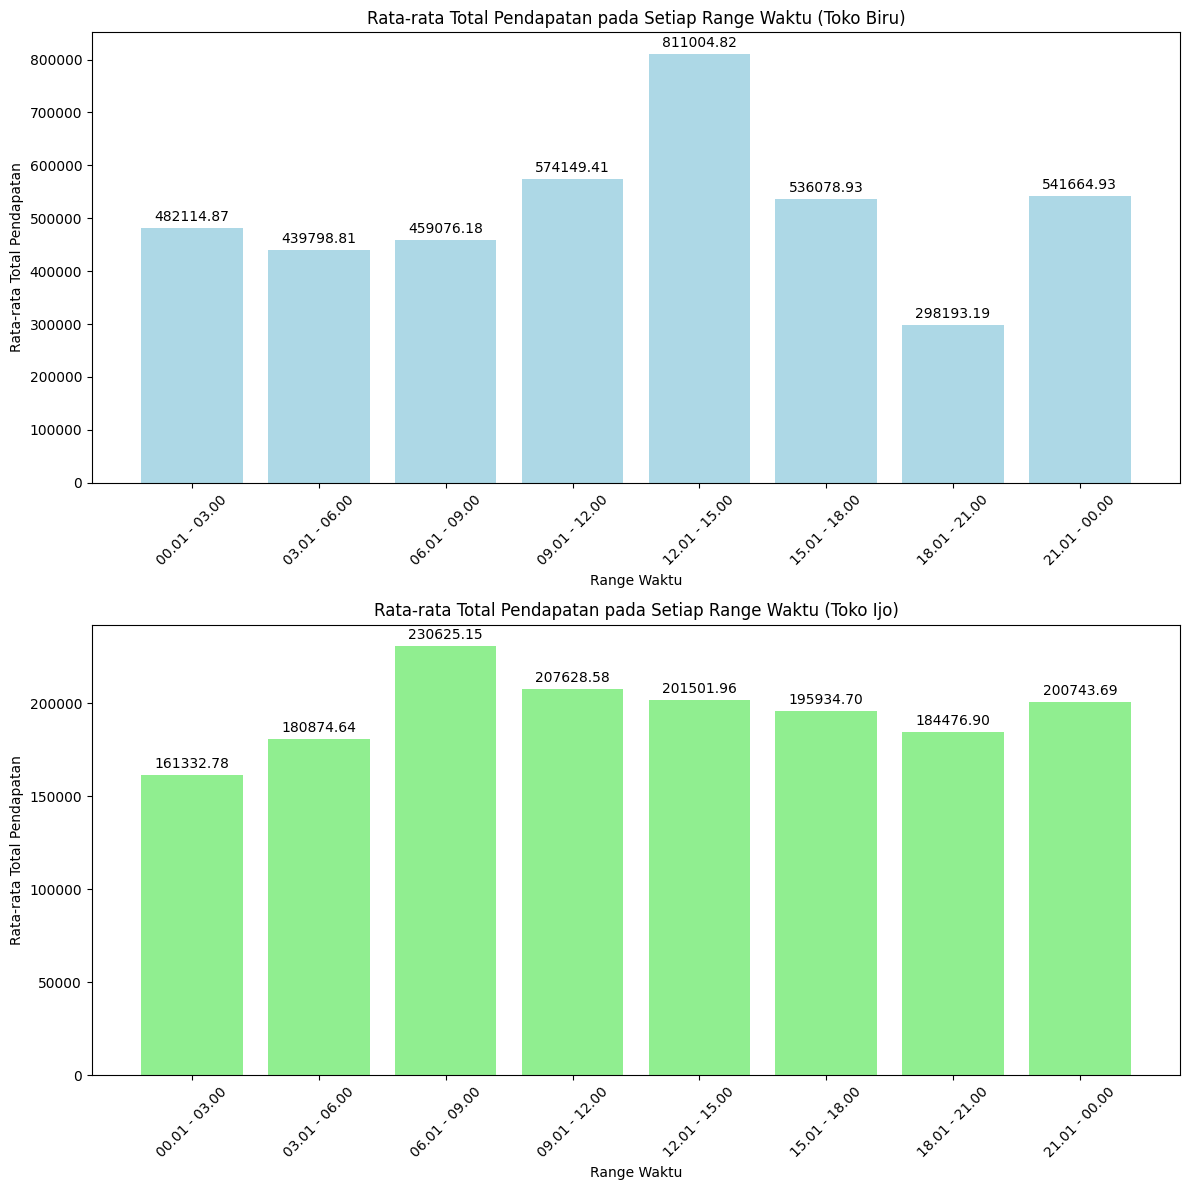

In [ ]:
# Inisialisasi dictionary untuk menyimpan total pendapatan pada setiap range jam untuk setiap channel
total_sales_blue = {time_range: [] for time_range in time_ranges}
total_sales_green = {time_range: [] for time_range in time_ranges}

# Mengumpulkan total pendapatan pada setiap range jam untuk setiap channel
for hour, minute, total, channel in zip(df['Hour'], df['Minute'], df['Total'], df['Channel']):
    for time_range, hours_range in time_ranges.items():
        if hour in hours_range:
            if channel == 'Toko Biru':
                total_sales_blue[time_range].append(total)
            elif channel == 'Toko Ijo':
                total_sales_green[time_range].append(total)
            break

# Menghitung rata-rata total pendapatan pada setiap range jam untuk setiap channel
average_sales_blue = {time_range: np.mean(sales) for time_range, sales in total_sales_blue.items()}
average_sales_green = {time_range: np.mean(sales) for time_range, sales in total_sales_green.items()}

# Membuat visualisasi dengan subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Visualisasi untuk Toko Biru
bars_blue = axes[0].bar(average_sales_blue.keys(), average_sales_blue.values(), color='lightblue')
axes[0].set_title('Rata-rata Total Pendapatan pada Setiap Range Waktu (Toko Biru)')
axes[0].set_xlabel('Range Waktu')
axes[0].set_ylabel('Rata-rata Total Pendapatan')
axes[0].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Menambahkan angka pasti di atas setiap batang pada plot bar untuk Toko Biru
for bar in bars_blue:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

# Visualisasi untuk Toko Ijo
bars_green = axes[1].bar(average_sales_green.keys(), average_sales_green.values(), color='lightgreen')
axes[1].set_title('Rata-rata Total Pendapatan pada Setiap Range Waktu (Toko Ijo)')
axes[1].set_xlabel('Range Waktu')
axes[1].set_ylabel('Rata-rata Total Pendapatan')
axes[1].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Menambahkan angka pasti di atas setiap batang pada plot bar untuk Toko Ijo
for bar in bars_green:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


## BY Mingguan/ 3 Bulan

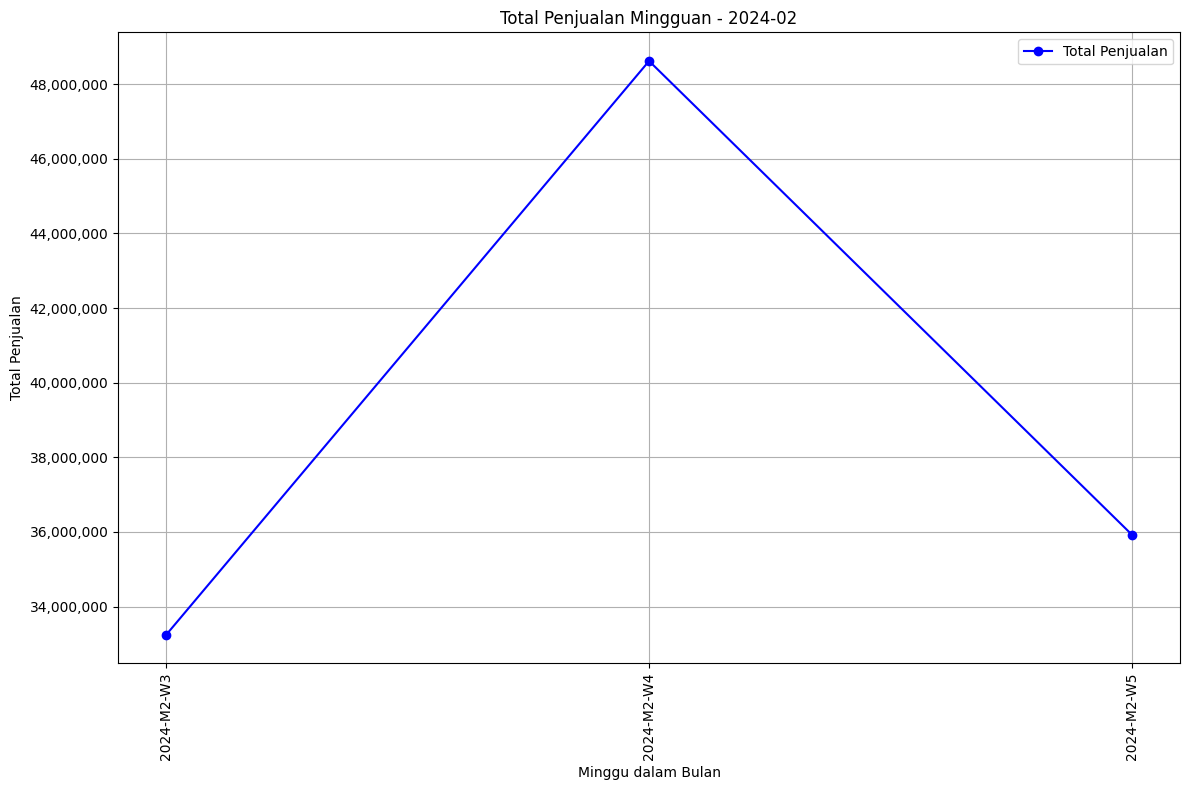

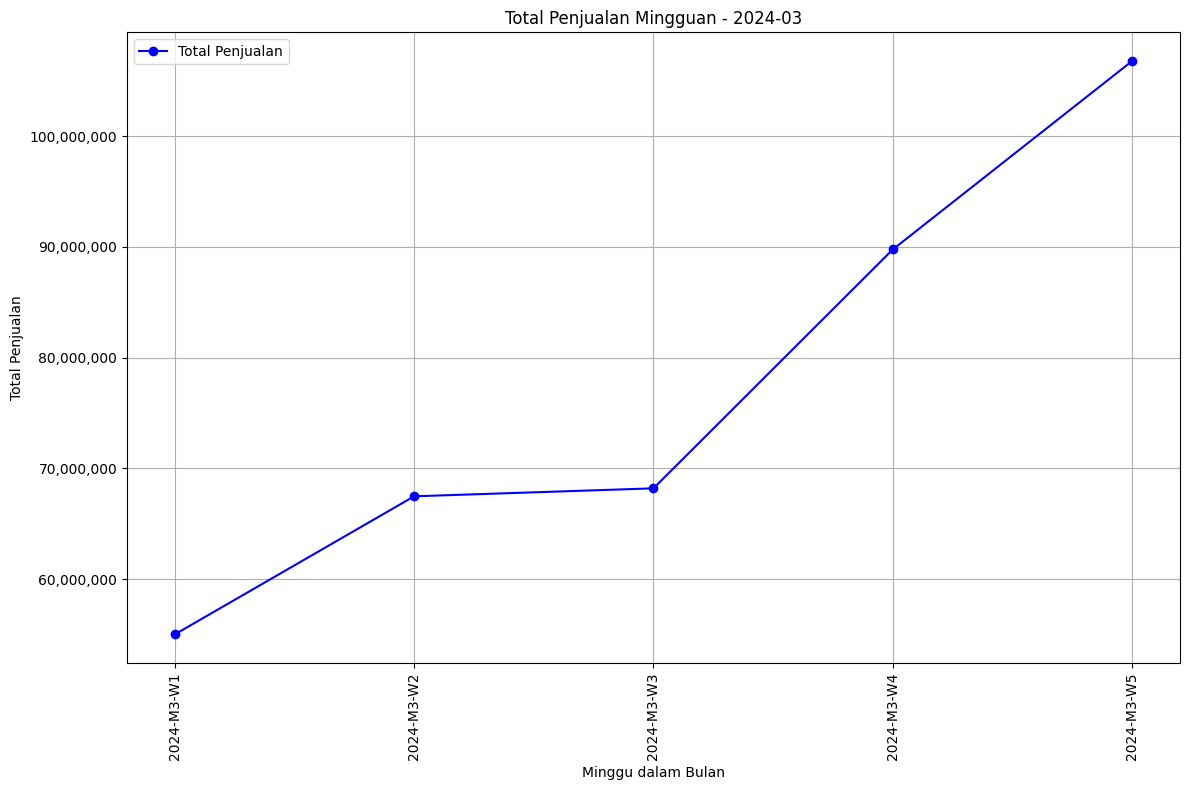

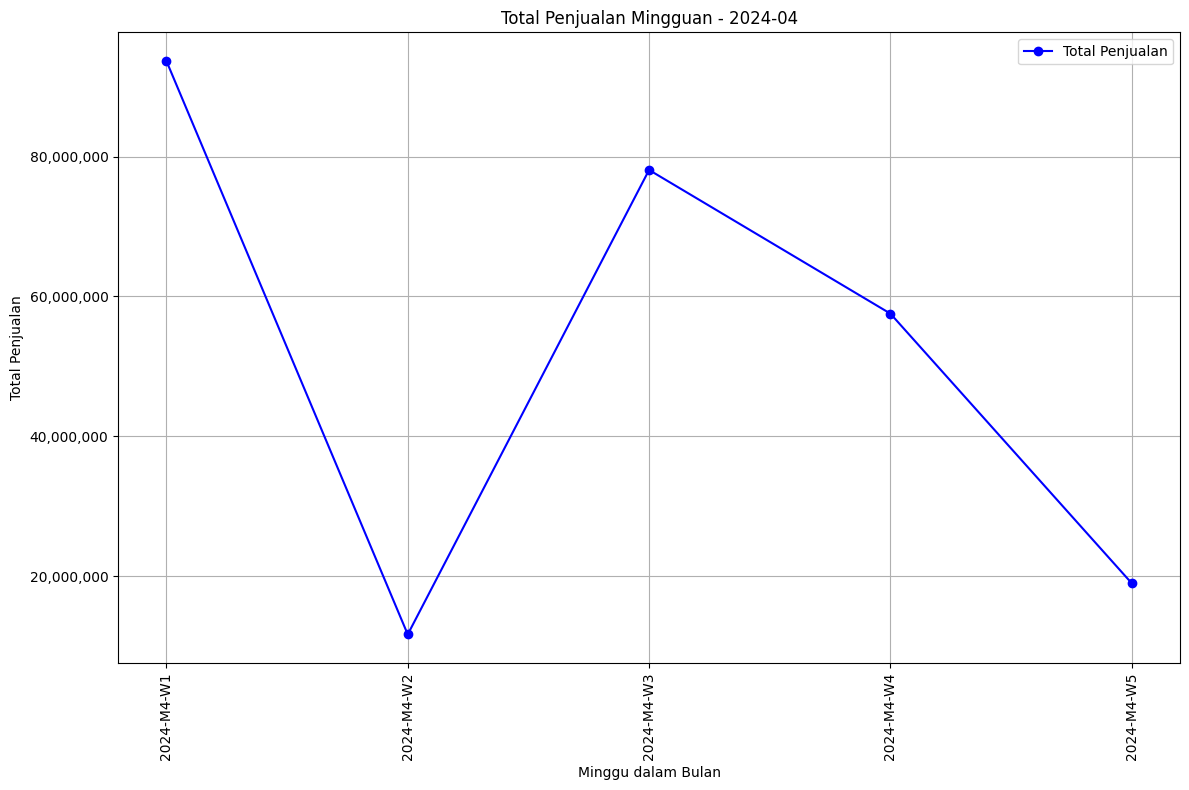

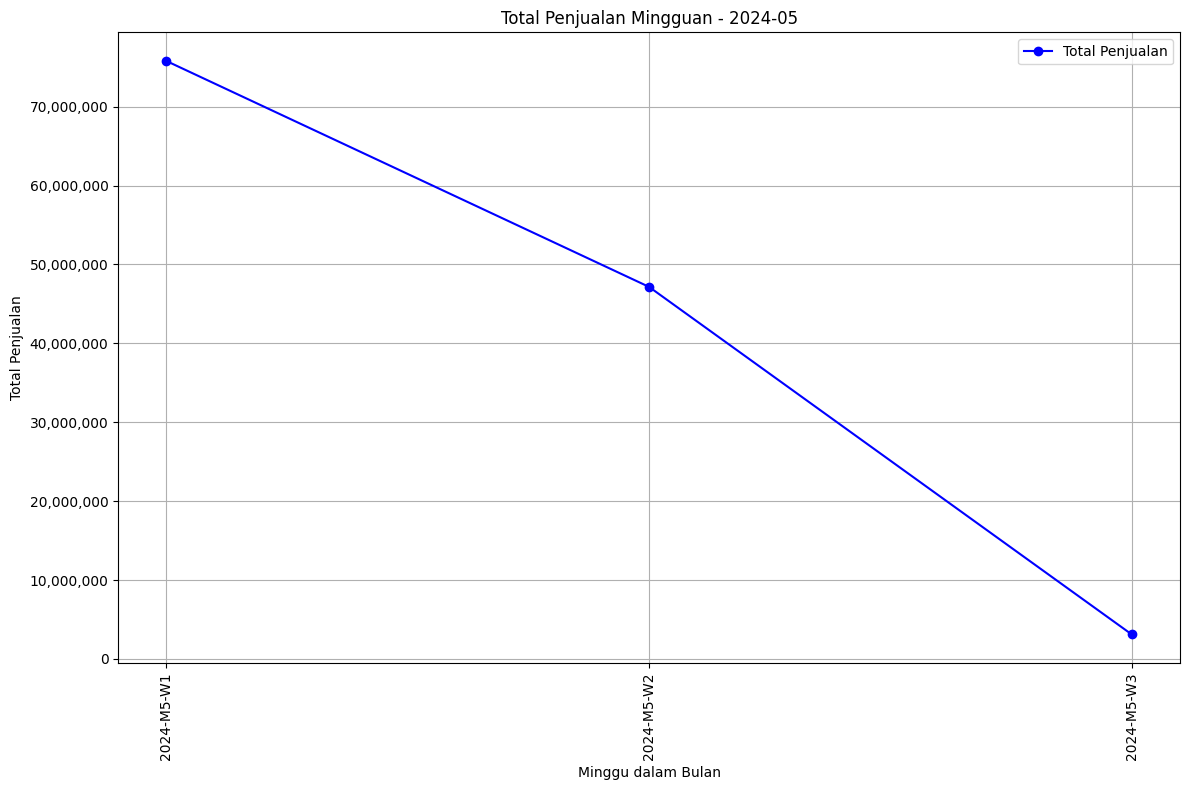

In [ ]:
# Membuat visualisasi gabungan untuk setiap bulan
for month in range(2, 6):  # Loop dari bulan Februari hingga Mei

    # Memfilter data untuk bulan tertentu
    month_data = df[df['Month'] == month]

    # Pengecekan apakah data tidak kosong
    if not month_data.empty:
        # Menentukan bulan dan tahun dari data
        month_year = month_data['Waktu Pembayaran'].dt.to_period('M').iloc[0]

        # Mengelompokkan data berdasarkan WeekofMonth dan menghitung total pendapatan per minggu
        weekly_sales = month_data.groupby('MonthWeekLabel')['Total'].sum()

        # Mengatur ukuran plot
        plt.figure(figsize=(12, 8))

        # Plotting line plot untuk total pendapatan per minggu
        plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='blue', label='Total Penjualan')

        # Mengatur judul dan label sumbu
        plt.title(f'Total Penjualan Mingguan - {month_year}')
        plt.xlabel('Minggu dalam Bulan')
        plt.ylabel('Total Penjualan')

        # Mengatur label sumbu x agar setiap tanggal tampil dengan sudut 90 derajat
        plt.xticks(rotation=90)

        # Mengatur format sumbu y agar lebih mudah dibaca
        plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

        # Menambahkan legenda
        plt.legend()

        # Menampilkan grid dan layout yang ketat
        plt.grid(True)
        plt.tight_layout()

        # Menampilkan plot
        plt.show()
    else:
        print(f"Tidak ada data untuk bulan {month}")

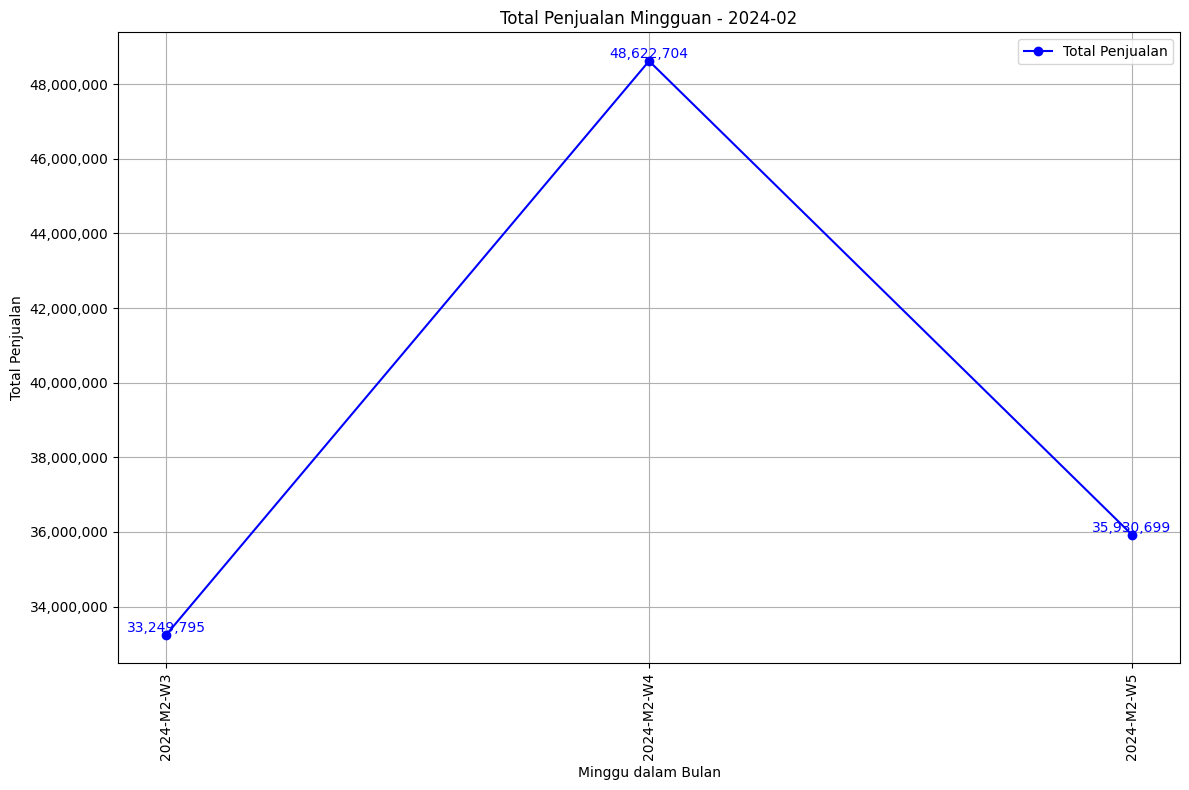

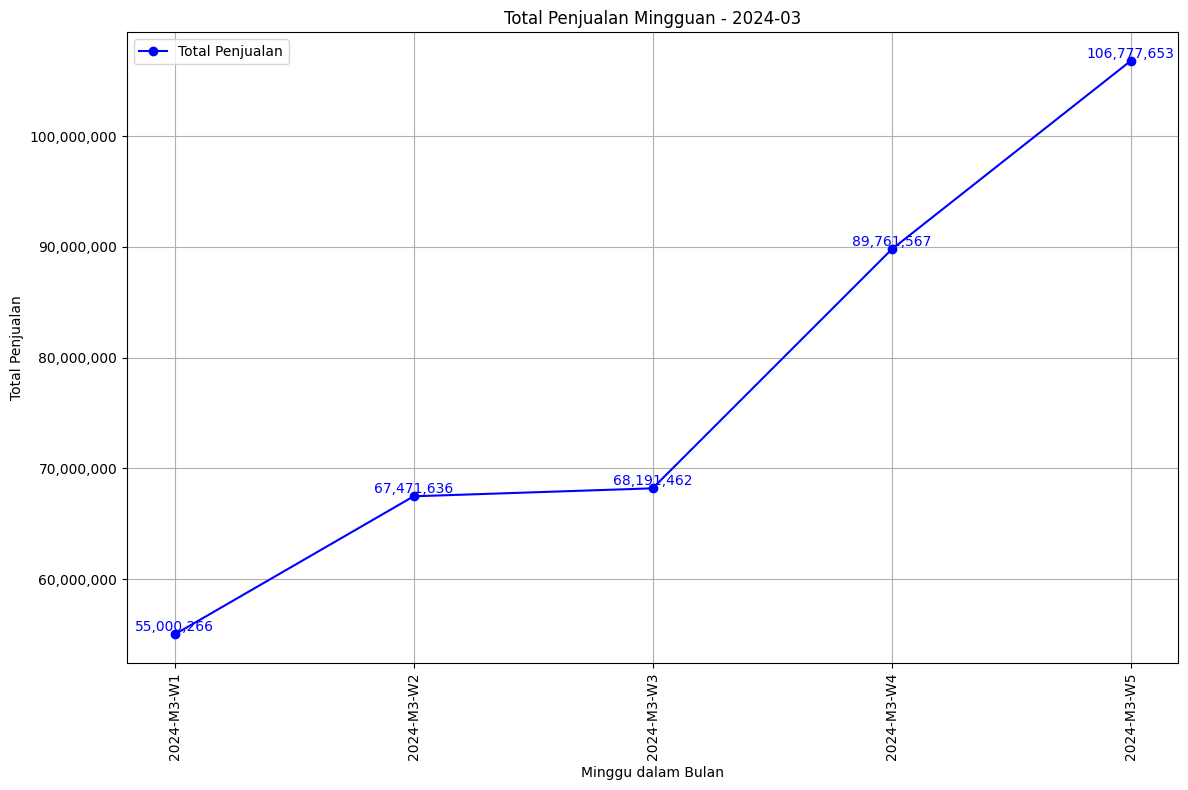

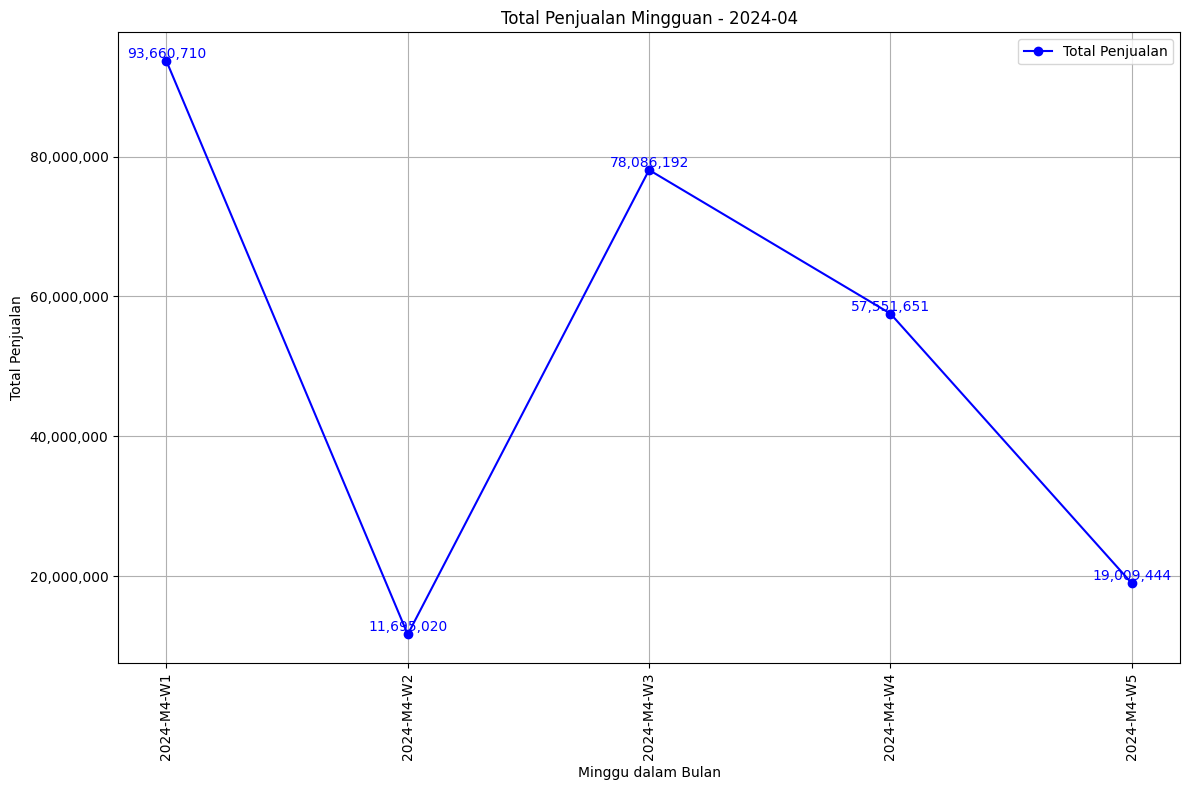

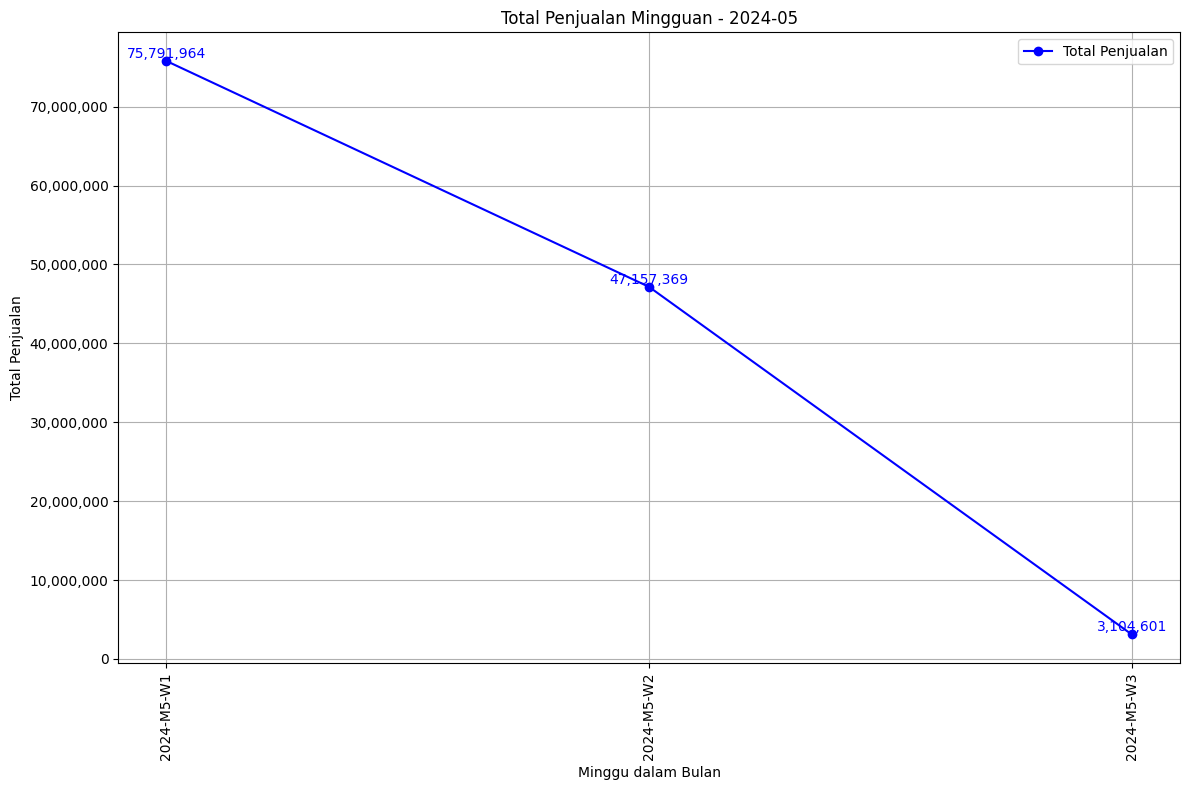

In [ ]:
for month in range(2, 6):  # Loop dari bulan Februari hingga Mei

    # Memfilter data untuk bulan tertentu
    month_data = df[df['Month'] == month]

    # Pengecekan apakah data tidak kosong
    if not month_data.empty:
        # Menentukan bulan dan tahun dari data
        month_year = month_data['Waktu Pembayaran'].dt.to_period('M').iloc[0]

        # Mengelompokkan data berdasarkan WeekofMonth dan menghitung total pendapatan per minggu
        weekly_sales = month_data.groupby('MonthWeekLabel')['Total'].sum()

        # Mengatur ukuran plot
        plt.figure(figsize=(12, 8))

        # Plotting line plot untuk total pendapatan per minggu
        plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='blue', label='Total Penjualan')

        # Menambahkan angka pasti pada setiap titik
        for i, total in enumerate(weekly_sales.values):
            plt.text(i, total, f'{int(total):,}', ha='center', va='bottom', color='blue')

        # Mengatur judul dan label sumbu
        plt.title(f'Total Penjualan Mingguan - {month_year}')
        plt.xlabel('Minggu dalam Bulan')
        plt.ylabel('Total Penjualan')

        # Mengatur label sumbu x agar setiap tanggal tampil dengan sudut 90 derajat
        plt.xticks(rotation=90)

        # Mengatur format sumbu y agar lebih mudah dibaca
        plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

        # Menambahkan legenda
        plt.legend()

        # Menampilkan grid dan layout yang ketat
        plt.grid(True)
        plt.tight_layout()

        # Menampilkan plot
        plt.show()
    else:
        print(f"Tidak ada data untuk bulan {month}")

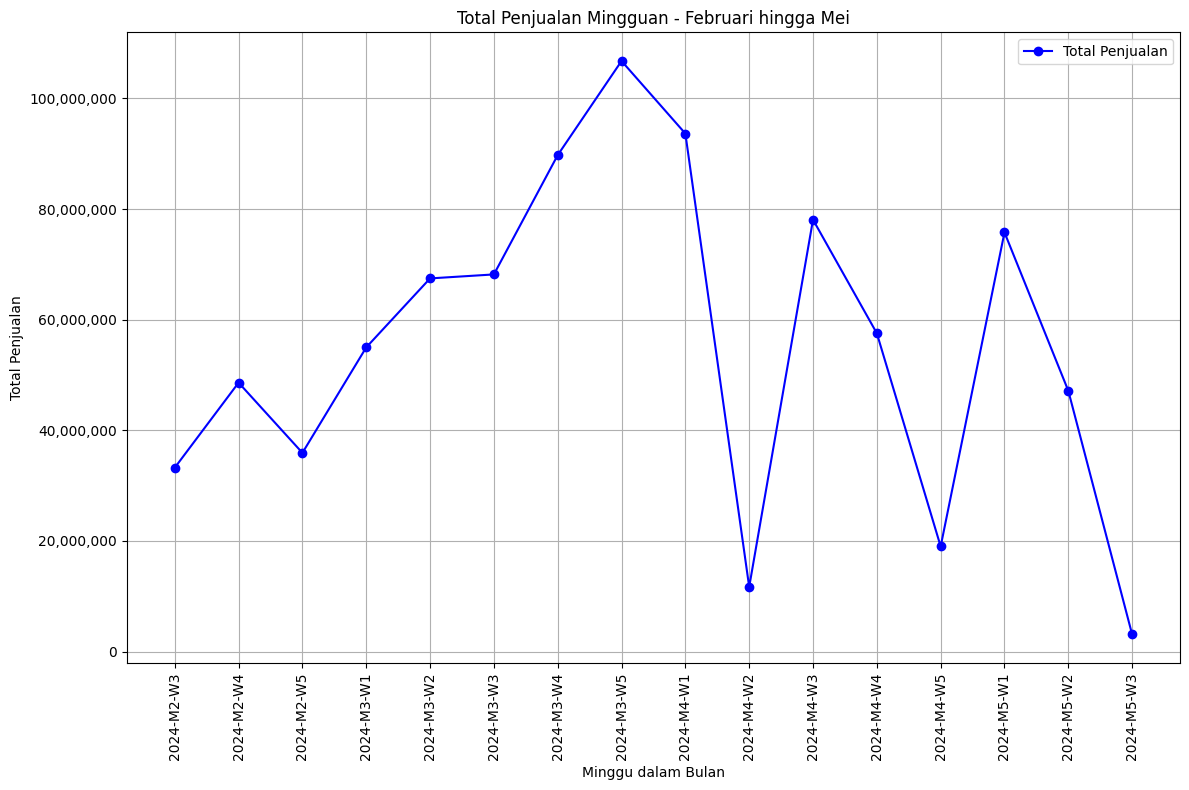

In [ ]:

# Filter data for the months February to May
filtered_df = df[(df['Month'] >= 2) & (df['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df.empty:
    # Group data by MonthWeekLabel and calculate total sales per week
    weekly_sales = filtered_df.groupby('MonthWeekLabel')['Total'].sum()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales
    plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='blue', label='Total Penjualan')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

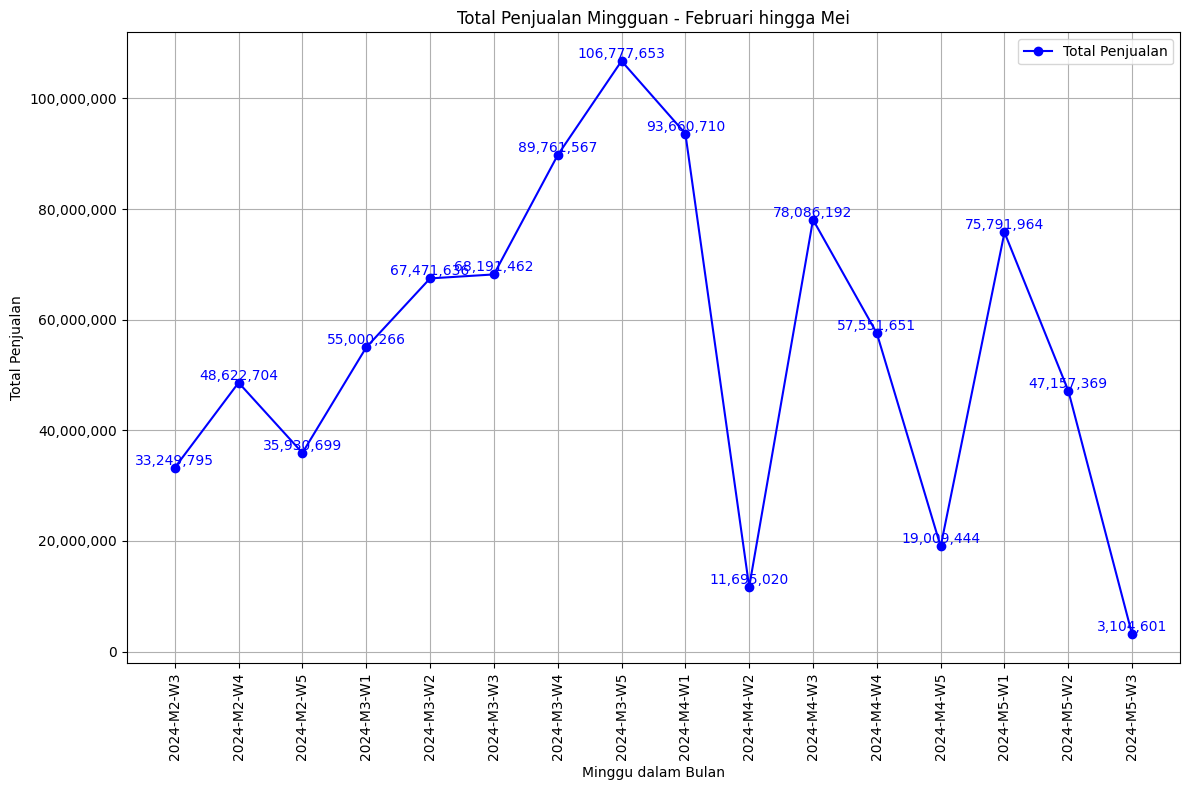

In [ ]:
# Filter data for the months February to May
filtered_df = df[(df['Month'] >= 2) & (df['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df.empty:
    # Group data by MonthWeekLabel and calculate total sales per week
    weekly_sales = filtered_df.groupby('MonthWeekLabel')['Total'].sum()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales
    plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='blue', label='Total Penjualan')

    # Menambahkan angka pasti pada setiap titik
    for i, total in enumerate(weekly_sales.values):
        plt.text(i, total, f'{int(total):,}', ha='center', va='bottom', color='blue')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

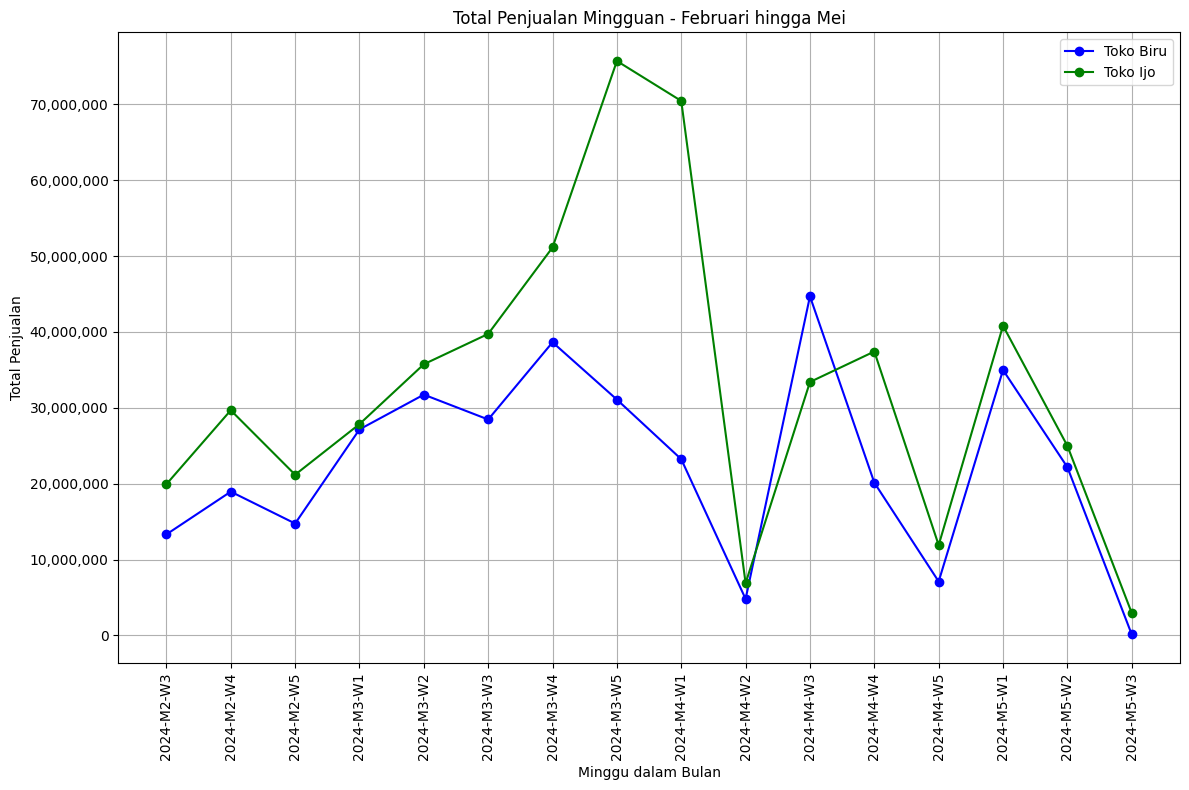

In [ ]:
# Filter data for the months February to May
filtered_df = df[(df['Month'] >= 2) & (df['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df.empty:
    # Group data by MonthWeekLabel and Channel, then calculate total sales per week
    weekly_sales = filtered_df.groupby(['MonthWeekLabel', 'Channel'])['Total'].sum().unstack()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales for each channel
    plt.plot(weekly_sales.index, weekly_sales['Toko Biru'], marker='o', color='blue', label='Toko Biru')
    plt.plot(weekly_sales.index, weekly_sales['Toko Ijo'], marker='o', color='green', label='Toko Ijo')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

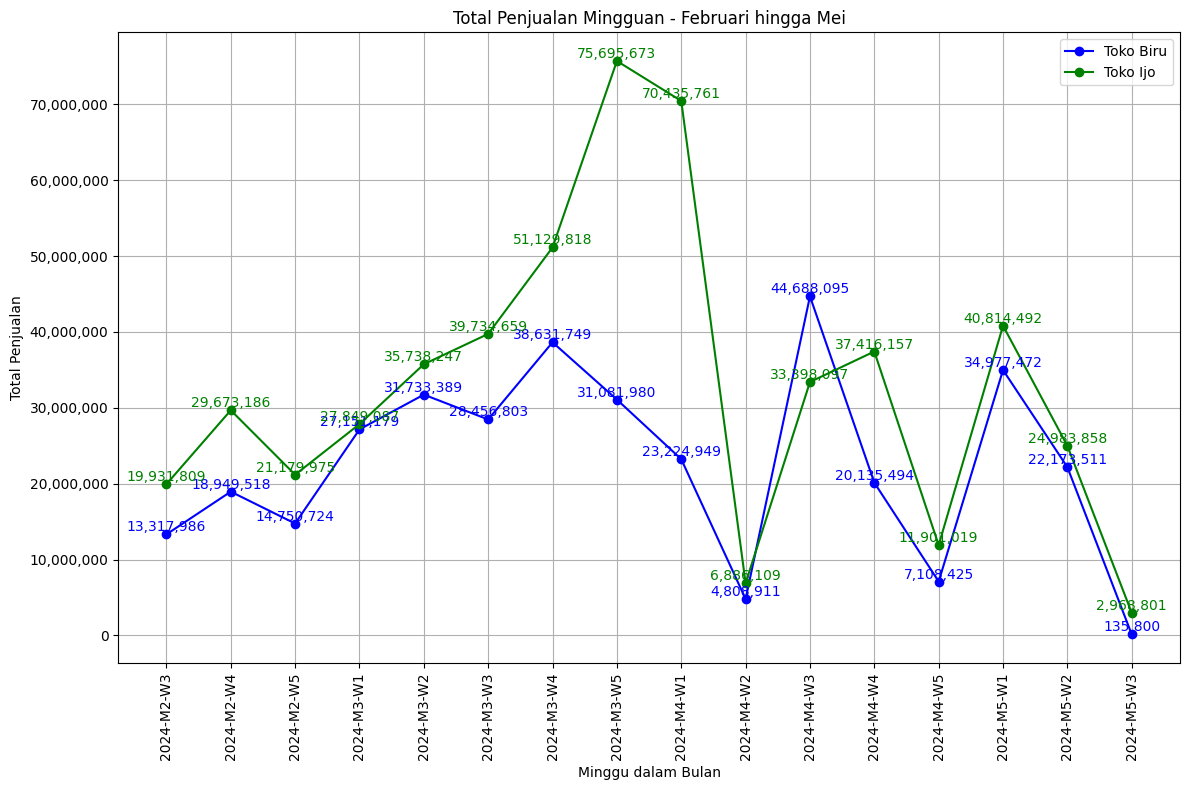

In [ ]:
# Filter data for the months February to May
filtered_df = df[(df['Month'] >= 2) & (df['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df.empty:
    # Group data by MonthWeekLabel and Channel, then calculate total sales per week
    weekly_sales = filtered_df.groupby(['MonthWeekLabel', 'Channel'])['Total'].sum().unstack()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales for each channel
    plt.plot(weekly_sales.index, weekly_sales['Toko Biru'], marker='o', color='blue', label='Toko Biru')
    plt.plot(weekly_sales.index, weekly_sales['Toko Ijo'], marker='o', color='green', label='Toko Ijo')

    # Menambahkan angka pasti pada setiap titik
    for channel in ['Toko Biru', 'Toko Ijo']:
        for i, total in enumerate(weekly_sales[channel]):
            plt.text(i, total, f'{int(total):,}', ha='center', va='bottom', color='blue' if channel == 'Toko Biru' else 'green')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")


In [ ]:
# df[df['MonthWeekLabel'] == '2024-M3-W4'].value_counts()

## BY Mingguan/3 Bulan Merge

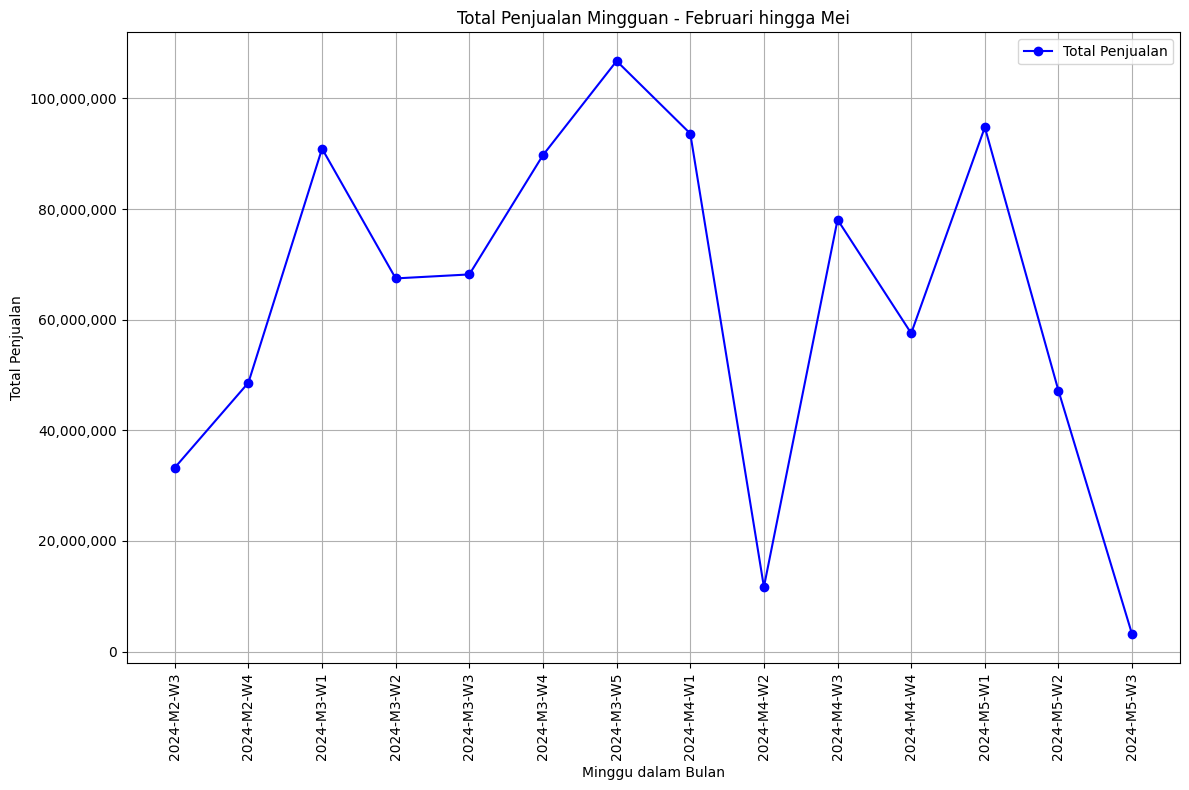

In [ ]:
# Filter data for the months February to May
filtered_df = df[(df['Month'] >= 2) & (df['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df.empty:
    # Identify weeks to be merged
    merge_weeks = {
        '2024-M2-W5': '2024-M3-W1',
        '2024-M4-W5': '2024-M5-W1'
    }

    # Create a new column for merged week labels
    filtered_df['MergedWeekLabel'] = filtered_df['MonthWeekLabel'].replace(merge_weeks)

    # Group data by the merged week labels and calculate total sales per week for all channels
    weekly_sales = filtered_df.groupby('MergedWeekLabel')['Total'].sum()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales
    plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='blue', label='Total Penjualan')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

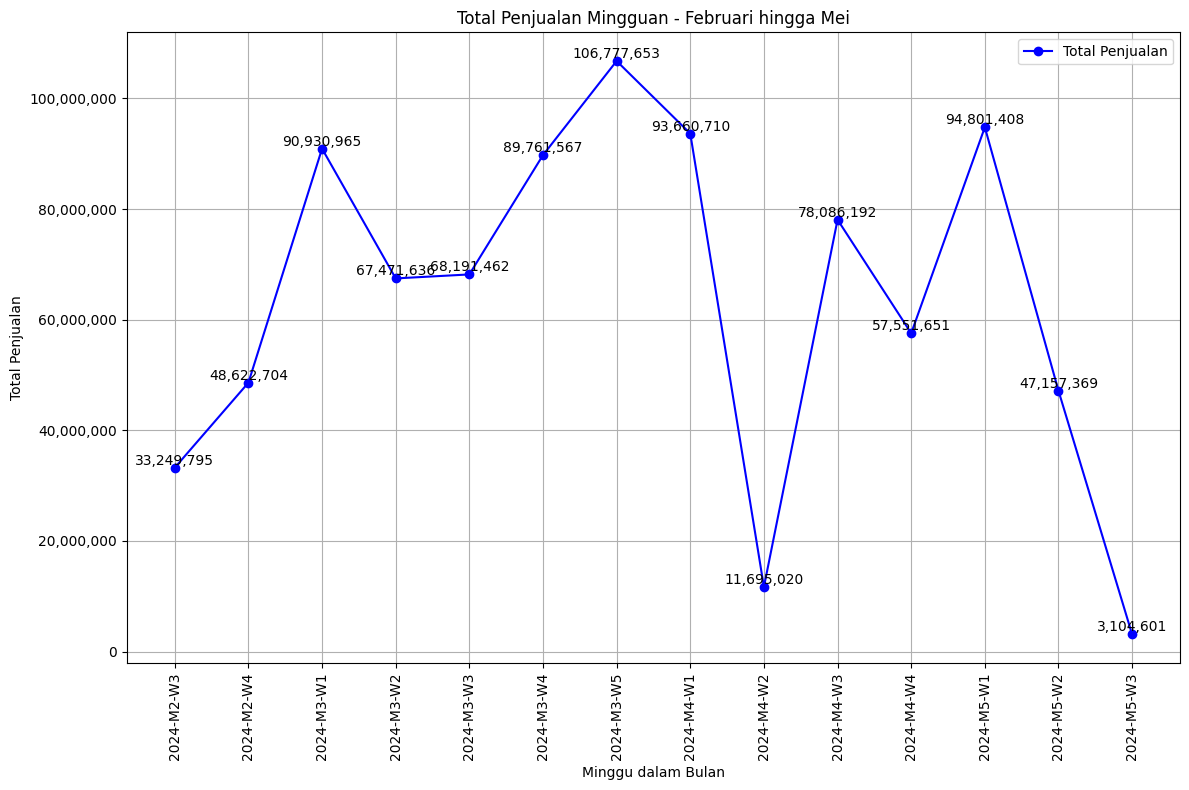

In [ ]:
# Fungsi format y-axis agar lebih mudah dibaca
def y_formatter(x, pos):
    return f'{int(x):,}'

# Filter data for the months February to May
filtered_df = df[(df['Month'] >= 2) & (df['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df.empty:
    # Identify weeks to be merged
    merge_weeks = {
        '2024-M2-W5': '2024-M3-W1',
        '2024-M4-W5': '2024-M5-W1'
    }

    # Create a new column for merged week labels
    filtered_df['MergedWeekLabel'] = filtered_df['MonthWeekLabel'].replace(merge_weeks)

    # Group data by the merged week labels and calculate total sales per week for all channels
    weekly_sales = filtered_df.groupby('MergedWeekLabel')['Total'].sum()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales
    plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='blue', label='Total Penjualan')

    # Menambahkan angka pasti pada setiap titik
    for i, (label, total) in enumerate(weekly_sales.items()):
        plt.text(i, total, f'{int(total):,}', ha='center', va='bottom')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")


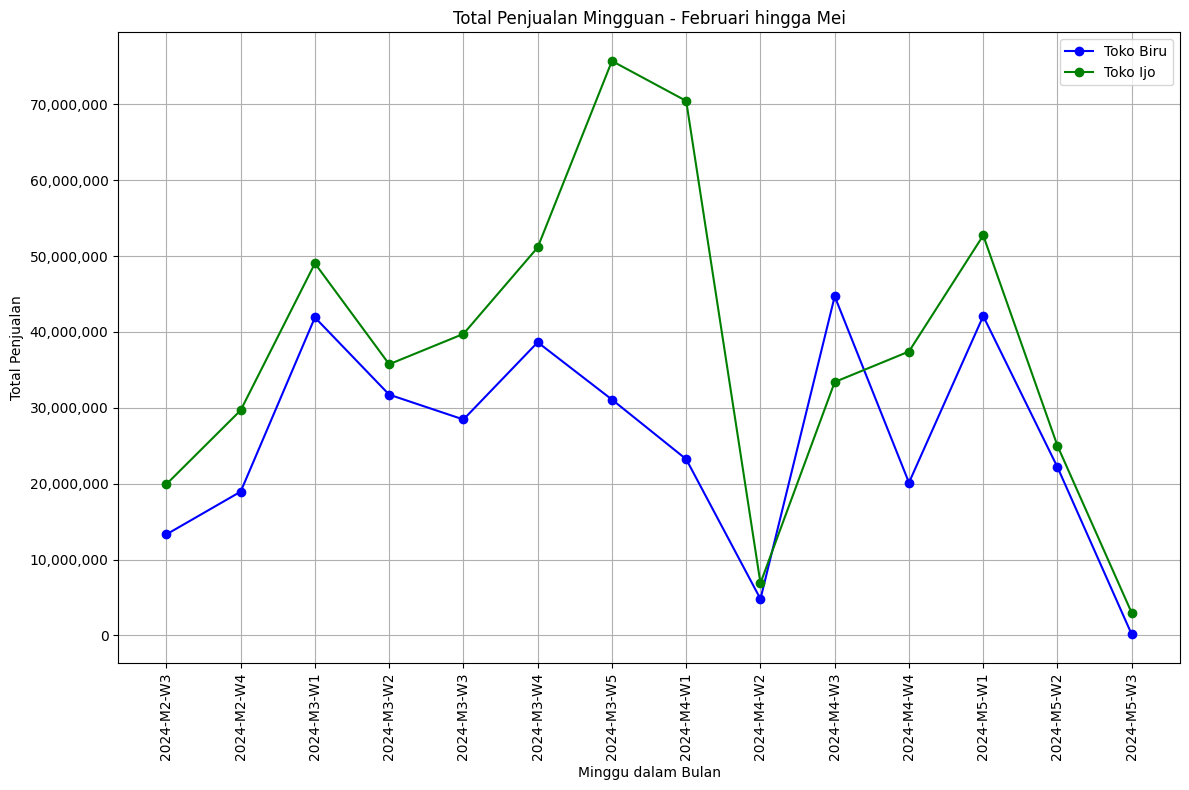

In [ ]:
# Filter data for the months February to May
filtered_df = df[(df['Month'] >= 2) & (df['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df.empty:
    # Identify weeks to be merged
    merge_weeks = {
        '2024-M2-W5': '2024-M3-W1',
        '2024-M4-W5': '2024-M5-W1'
    }

    # Create a new column for merged week labels
    filtered_df['MergedWeekLabel'] = filtered_df['MonthWeekLabel'].replace(merge_weeks)

    # Group data by the merged week labels and channels, then calculate total sales per week
    weekly_sales = filtered_df.groupby(['MergedWeekLabel', 'Channel'])['Total'].sum().unstack()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales for each channel
    plt.plot(weekly_sales.index, weekly_sales['Toko Biru'], marker='o', color='blue', label='Toko Biru')
    plt.plot(weekly_sales.index, weekly_sales['Toko Ijo'], marker='o', color='green', label='Toko Ijo')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

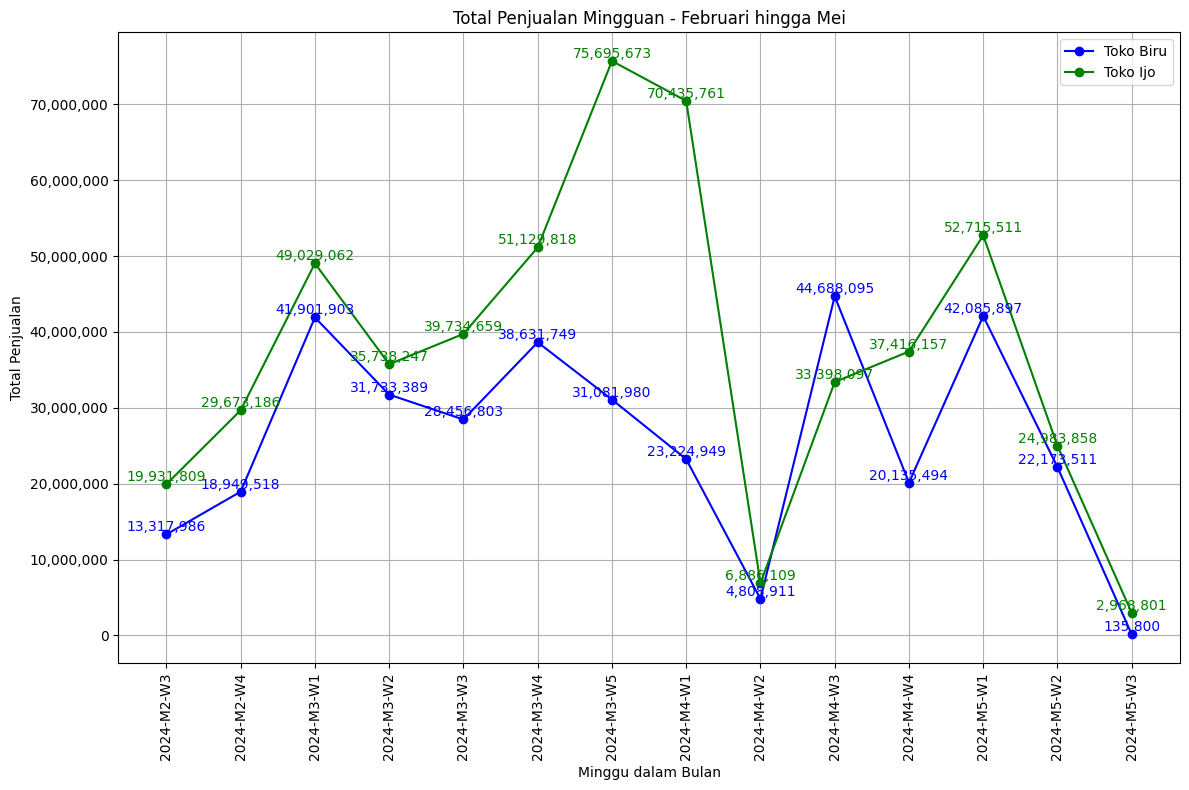

In [ ]:
def y_formatter(x, pos):
    return f'{int(x):,}'

# Filter data for the months February to May
filtered_df = df[(df['Month'] >= 2) & (df['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df.empty:
    # Identify weeks to be merged
    merge_weeks = {
        '2024-M2-W5': '2024-M3-W1',
        '2024-M4-W5': '2024-M5-W1'
    }

    # Create a new column for merged week labels
    filtered_df['MergedWeekLabel'] = filtered_df['MonthWeekLabel'].replace(merge_weeks)

    # Group data by the merged week labels and channels, then calculate total sales per week
    weekly_sales = filtered_df.groupby(['MergedWeekLabel', 'Channel'])['Total'].sum().unstack()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales for each channel
    plt.plot(weekly_sales.index, weekly_sales['Toko Biru'], marker='o', color='blue', label='Toko Biru')
    plt.plot(weekly_sales.index, weekly_sales['Toko Ijo'], marker='o', color='green', label='Toko Ijo')

    # Menambahkan angka pasti pada setiap titik untuk Toko Biru
    for i, total in enumerate(weekly_sales['Toko Biru']):
        plt.text(i, total, f'{int(total):,}', ha='center', va='bottom', color='blue')

    # Menambahkan angka pasti pada setiap titik untuk Toko Ijo
    for i, total in enumerate(weekly_sales['Toko Ijo']):
        plt.text(i, total, f'{int(total):,}', ha='center', va='bottom', color='green')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

## BY Bulan/4 Bulan

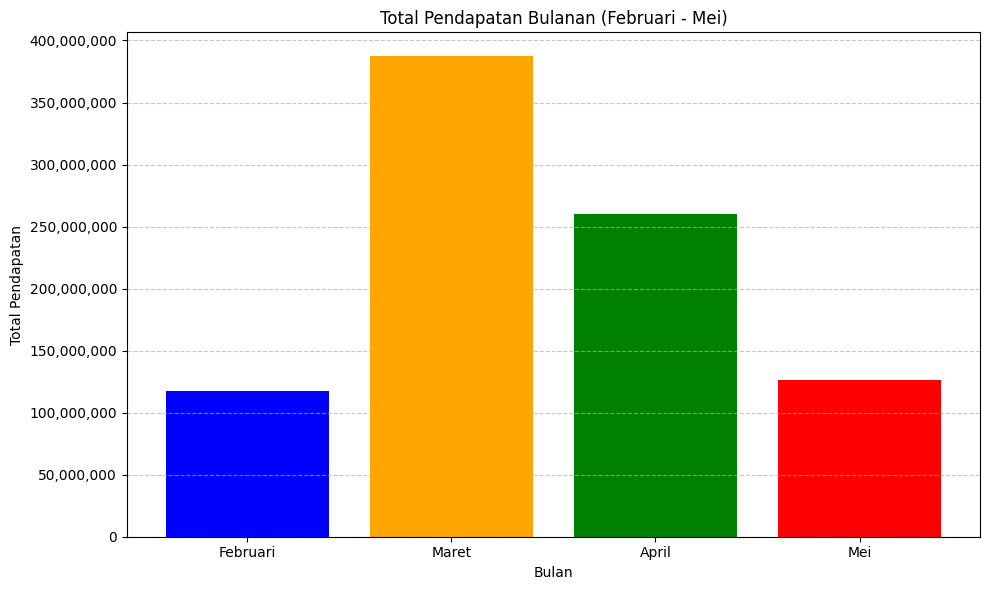

In [ ]:
# Mengelompokkan data berdasarkan bulan untuk menghitung total pendapatan bulanan
monthly_sales = df[df['Month'].isin([2, 3, 4, 5])].groupby('Month')['Total'].sum().reset_index()

# Mapping nama bulan untuk mempermudah pemahaman di plot
month_mapping = {2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei'}
monthly_sales['Month'] = monthly_sales['Month'].map(month_mapping)

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Total'], color=['blue', 'orange', 'green', 'red'])

# Mengatur title dan label sumbu
plt.title('Total Pendapatan Bulanan (Februari - Mei)')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan')

# Format sumbu Y agar lebih mudah dibaca
def y_formatter(x, pos):
    return f'{int(x):,}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_formatter))

# Menambahkan grid dan layout yang ketat
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

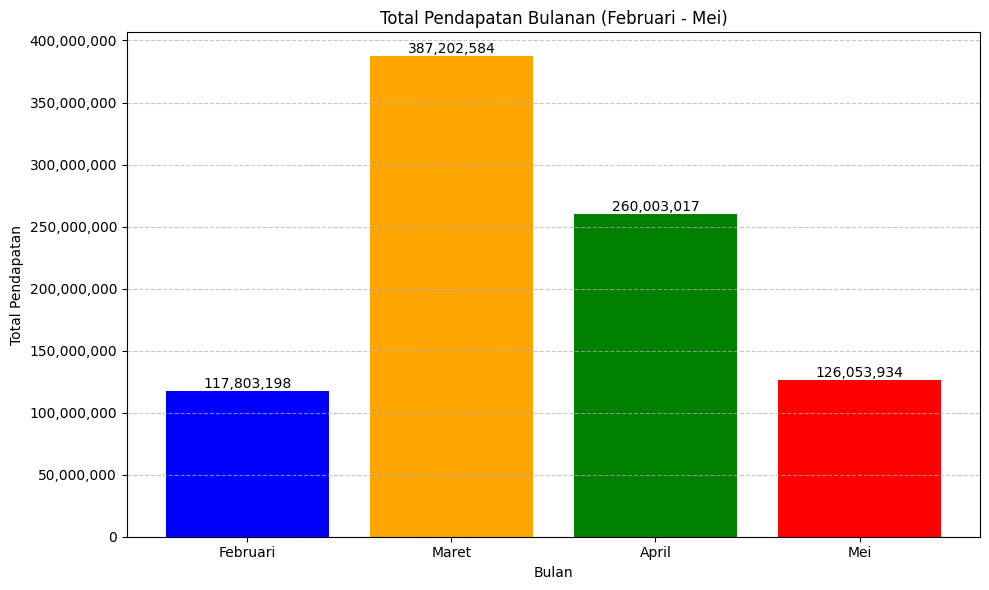

In [ ]:
# Mengelompokkan data berdasarkan bulan untuk menghitung total pendapatan bulanan
monthly_sales = df[df['Month'].isin([2, 3, 4, 5])].groupby('Month')['Total'].sum().reset_index()

# Mapping nama bulan untuk mempermudah pemahaman di plot
month_mapping = {2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei'}
monthly_sales['Month'] = monthly_sales['Month'].map(month_mapping)

# Membuat visualisasi
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_sales['Month'], monthly_sales['Total'], color=['blue', 'orange', 'green', 'red'])

# Mengatur title dan label sumbu
plt.title('Total Pendapatan Bulanan (Februari - Mei)')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan')

# Format sumbu Y agar lebih mudah dibaca
def y_formatter(x, pos):
    return f'{int(x):,}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_formatter))

# Menambahkan angka pasti di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

# Menambahkan grid dan layout yang ketat
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

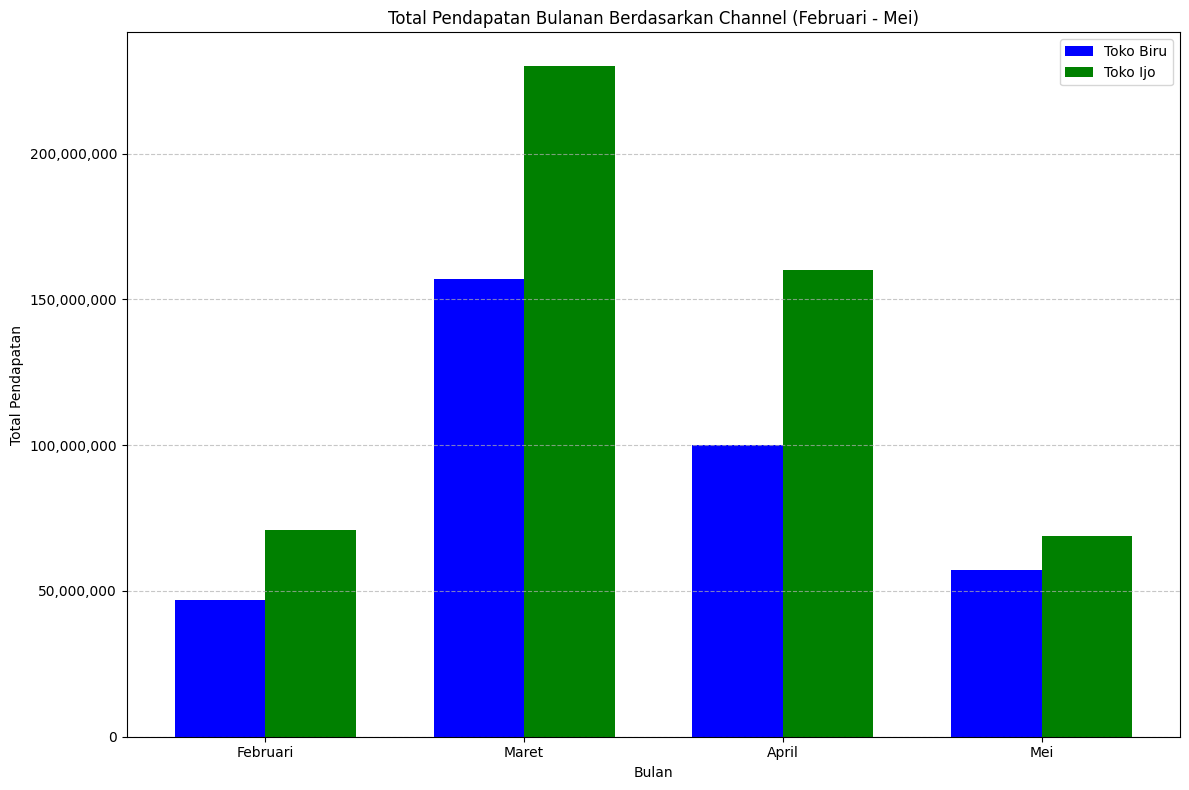

In [ ]:
# Mengelompokkan data berdasarkan bulan dan channel untuk menghitung total pendapatan
monthly_channel_sales = df[df['Month'].isin([2, 3, 4, 5])].groupby(['Month', 'Channel'])['Total'].sum().reset_index()

# Mapping nama bulan untuk mempermudah pemahaman di plot
month_mapping = {2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei'}
monthly_channel_sales['Month'] = monthly_channel_sales['Month'].map(month_mapping)

# Menentukan posisi X untuk setiap bar
months = ['Februari', 'Maret', 'April', 'Mei']
x = np.arange(len(months))

# Lebar bar
bar_width = 0.35

# Membuat sub-bar untuk setiap channel
bar1 = monthly_channel_sales[monthly_channel_sales['Channel'] == 'Toko Biru']['Total']
bar2 = monthly_channel_sales[monthly_channel_sales['Channel'] == 'Toko Ijo']['Total']

# Plotting barplot
plt.figure(figsize=(12, 8))
plt.bar(x - bar_width/2, bar1, width=bar_width, label='Toko Biru', color='blue')
plt.bar(x + bar_width/2, bar2, width=bar_width, label='Toko Ijo', color='green')

# Menambahkan title dan label sumbu
plt.title('Total Pendapatan Bulanan Berdasarkan Channel (Februari - Mei)')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan')
plt.xticks(x, months)

# Format sumbu Y agar lebih mudah dibaca
def y_formatter(x, pos):
    return f'{int(x):,}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_formatter))

# Menambahkan legenda
plt.legend()

# Menambahkan grid dan layout yang ketat
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

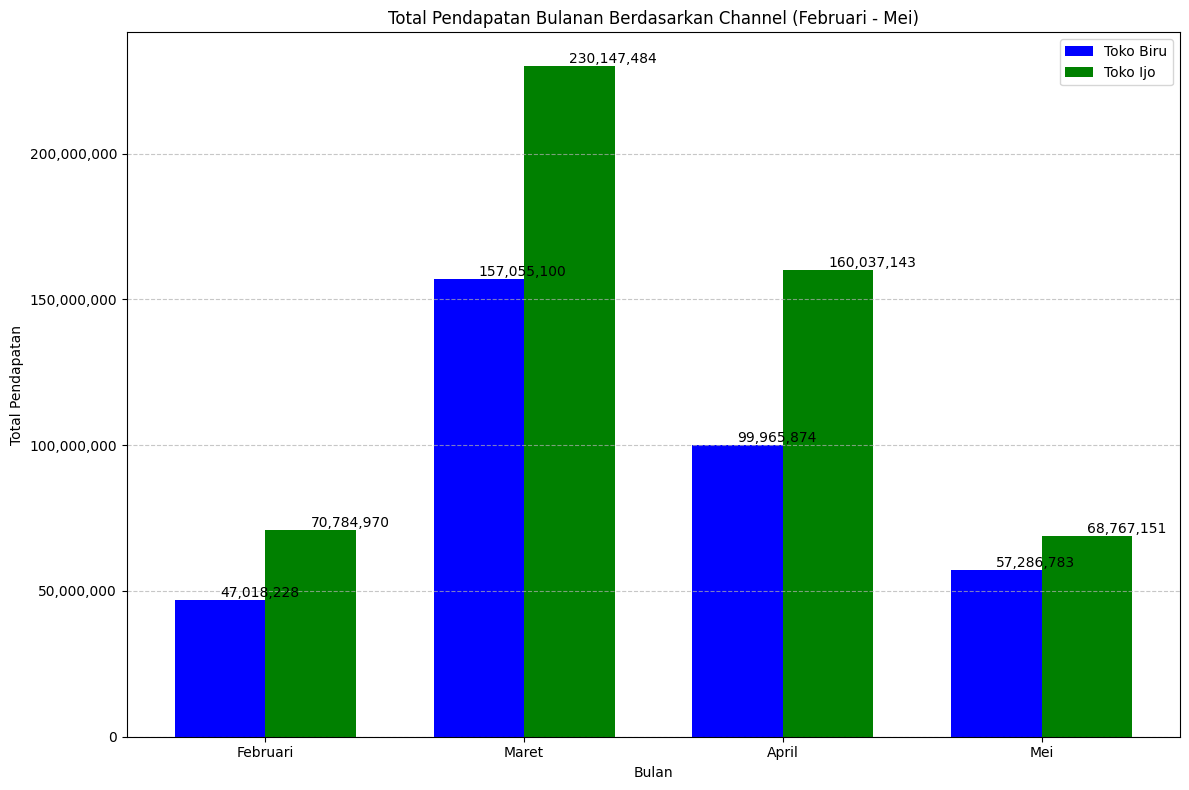

In [ ]:
# Mengelompokkan data berdasarkan bulan dan channel untuk menghitung total pendapatan
monthly_channel_sales = df[df['Month'].isin([2, 3, 4, 5])].groupby(['Month', 'Channel'])['Total'].sum().reset_index()

# Mapping nama bulan untuk mempermudah pemahaman di plot
month_mapping = {2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei'}
monthly_channel_sales['Month'] = monthly_channel_sales['Month'].map(month_mapping)

# Menentukan posisi X untuk setiap bar
months = ['Februari', 'Maret', 'April', 'Mei']
x = np.arange(len(months))

# Lebar bar
bar_width = 0.35

# Membuat sub-bar untuk setiap channel
bar1 = monthly_channel_sales[monthly_channel_sales['Channel'] == 'Toko Biru']['Total']
bar2 = monthly_channel_sales[monthly_channel_sales['Channel'] == 'Toko Ijo']['Total']

# Plotting barplot
plt.figure(figsize=(12, 8))
bars1 = plt.bar(x - bar_width/2, bar1, width=bar_width, label='Toko Biru', color='blue')
bars2 = plt.bar(x + bar_width/2, bar2, width=bar_width, label='Toko Ijo', color='green')

# Menambahkan title dan label sumbu
plt.title('Total Pendapatan Bulanan Berdasarkan Channel (Februari - Mei)')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan')
plt.xticks(x, months)

# Format sumbu Y agar lebih mudah dibaca
def y_formatter(x, pos):
    return f'{int(x):,}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_formatter))

# Menambahkan angka pasti di atas setiap bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom')  # va: vertical alignment

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom')  # va: vertical alignment

# Menambahkan legenda
plt.legend()

# Menambahkan grid dan layout yang ketat
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()


## SAVE DATASET

In [ ]:
df.to_csv('Data_Feature_Add_Column.csv', index=False)